Exploratory Data Analysis: 

Main objective: gather preliminary insights form data. More specifically, this part aims to: 
- Explore the dataset and examine relationships between tables in this dataset. 
- Find important correlations between target and other variables.
- Look into patterns between variables.
- Find and address any sources or risks of data leakage.
- Find and address missing values, outliers, or duplicates. 

These insights will help with variable selection later on, and gaining a deeper understanding of the dataset in this way before modelling will help with feature engineering as well as model selection and interpretation in later sections. 

In total, there are 8 tables in this data set: 
- application_train.csv,  application_test.csv: training and test static data.
- bureau.csv: information from the Credit Bureau about client's previous credits from other institutions. 
- bureau_balance.csv: information from the Credit Bureau regarding client's previous monthly credit balances. 
- POS_CASH_balance.csv: Point of sales and cash loan monthly balance information from a customer's previous Home Credit loans. 
- credit_card_balance.csv: a customer's previous Home Credit montly credit card balances. 
- previous_application.csv: information about a Home Credit customer's previous loan applications. 
- installments_payments.csv: information about a Home Credit customer's repayment history. 
- HomeCredit_columns_description.csv: description of features in the full dataset. 

In this notebook, the application_train/test data is examined alone.

Importing necessary packages: 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, kstest, ks_2samp
import phik
import sys
import os

sys.path.append(os.path.abspath('../functions'))
from functions import (
    print_df_info, get_missing_df_info,
    plot_categorical_distribution, explore_numerical, explore_category, plot_numerical,
    plot_category, chi_squared_test, mann_whitney_test, mann_whitney_alt_greater, evaluate_vif,
    plot_multiple_qq, plot_cdf_by_target, percent_dist
)
%matplotlib inline

Now, the main dataset (application_train and application_test) can be loaded: 


# Initial dataset exploration: 

Loading the main datasets (application_train and application_test):
- Main tables with binary target.
- Loan application and individual information

In [11]:
train = pd.read_csv('../tables/application_train.csv', sep=',')
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Looking at the basic information about this table: 

In [3]:
print_df_info(train)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Size of dataframe (rows, columns): (307511, 122)


The training dataset has 122 features and a little over 307 thousand entries. 65 of these features are of type float64, 41 are of type int64, and 15 are of type object. 

In [ ]:
test = pd.read_csv('../tables/application_test.csv', sep=',')
test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

Looking at the basic information about this table: 

In [5]:
print_df_info(test)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None

Size of dataframe (rows, columns): (48744, 121)


The test dataset has 121 features (as the target feature is missing) and close to 49 thousand entries. There are 65 features of type float64, 40 features of type int64, and 16 features of type object. 

For both the test and train tables, the SK_ID_CURR indicates a loan's ID. 

## Duplicate values: 

Are there any duplicated rows in the initial data? 

In [6]:
data = pd.concat([train, test], axis=0, ignore_index=True)
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Are there any duplicated rows in the train or test set? 

In [7]:
print('Duplicated rows in training data:', train.duplicated(keep=False).sum())
print('Duplicated rows in test data:', test.duplicated(keep=False).sum())
print('Duplicated rows in combined data:', data.duplicated(keep=False).sum())

Duplicated rows in training data: 0
Duplicated rows in test data: 0
Duplicated rows in combined data: 0


No rows in the original data are completely duplicated. 

Do any rows have the same ID? 

In [8]:
print('Duplicated ID in training data:', train.duplicated(subset=['SK_ID_CURR']).sum())
print('Duplicated ID in test data:', test.duplicated(subset=['SK_ID_CURR']).sum())
print('Duplicated ID in combined data:', data.duplicated(subset=['SK_ID_CURR']).sum())

Duplicated ID in training data: 0
Duplicated ID in test data: 0
Duplicated ID in combined data: 0


No duplicated ID values are present. If the ID and target columns are excluded, will this make a difference? 

In [9]:
print('Duplicate values present in training data excluding target and ID:', train.drop(['TARGET', 'SK_ID_CURR'], axis=1).duplicated(keep=False).any())
print('Duplicate values present in test data excluding ID:', test.drop(['SK_ID_CURR'], axis=1).duplicated(keep=False).any())
print('Duplicate values present in combined data excluding target and ID:', data.drop(['TARGET', 'SK_ID_CURR'], axis=1).duplicated(keep=False).any())


Duplicate values present in training data excluding target and ID: False
Duplicate values present in test data excluding ID: False
Duplicate values present in combined data excluding target and ID: False


It seems that no duplicate values are present in this dataset. 

## Missing values: 

Now, missing values can be explored in the dataset: 

In [10]:
missing_train, no_missing_train = get_missing_df_info(train)
is_missing = pd.concat([missing_train, no_missing_train], axis=0, ignore_index=False)
is_missing.fillna(0, inplace=True)
missing_train

Empty strings: (array([], dtype=int64), array([], dtype=int64))
XNA strings: (array([     8,     11,     23, ..., 307487, 307505, 307507],
      shape=(55378,)), array([40, 40, 40, ..., 40, 40, 40], shape=(55378,)))
Percentage of total rows with missing values: 97.202701691972


Missing number  Missing percentage
COMMONAREA_MEDI                   214865           69.872297
COMMONAREA_AVG                    214865           69.872297
COMMONAREA_MODE                   214865           69.872297
NONLIVINGAPARTMENTS_MODE          213514           69.432963
NONLIVINGAPARTMENTS_AVG           213514           69.432963
...                                  ...                 ...
EXT_SOURCE_2                         660            0.214626
AMT_GOODS_PRICE                      278            0.090403
AMT_ANNUITY                           12            0.003902
CNT_FAM_MEMBERS                        2            0.000650
DAYS_LAST_PHONE_CHANGE                 1            0.000325

[67 rows x 2 columns]

67 features in the training set have missing values, and quite a few of them are missing a lot of data. No empty strings are present, but over 55 000 strings have value: 'XNA'. These will be set to NaN values for visualization purposes: 


In [11]:
train.replace('XNA', np.nan, inplace=True)

Now, no 'XNA' strings are present. 

How many features are missing over half of their data? 

In [12]:
missing_train_over_50 = missing_train[missing_train['Missing percentage'] > 50].sort_values(by='Missing percentage', ascending=False)
len(missing_train_over_50) * 100/len(train.columns)

33.60655737704918

In total, 33% of these features in this dataset are missing over half of its data. 

Missing data can be examined in the same way with the test data, to ensure that it follows the same approximate tendencies as the training data: 

In [13]:
missing_test, no_missing_test = get_missing_df_info(test)
missing_test.head(15)

Empty strings: (array([], dtype=int64), array([], dtype=int64))
XNA strings: (array([   10,    17,    22, ..., 48731, 48735, 48736], shape=(9274,)), array([39, 39, 39, ..., 39, 39, 39], shape=(9274,)))
Percentage of total rows with missing values: 96.43238142130313


Missing number  Missing percentage
COMMONAREA_AVG                     33495           68.716150
COMMONAREA_MODE                    33495           68.716150
COMMONAREA_MEDI                    33495           68.716150
NONLIVINGAPARTMENTS_AVG            33347           68.412523
NONLIVINGAPARTMENTS_MODE           33347           68.412523
NONLIVINGAPARTMENTS_MEDI           33347           68.412523
FONDKAPREMONT_MODE                 32797           67.284179
LIVINGAPARTMENTS_AVG               32780           67.249302
LIVINGAPARTMENTS_MODE              32780           67.249302
LIVINGAPARTMENTS_MEDI              32780           67.249302
FLOORSMIN_MEDI                     32466           66.605121
FLOORSMIN_AVG                      32466           66.605121
FLOORSMIN_MODE                     32466           66.605121
OWN_CAR_AGE                        32312           66.289184
YEARS_BUILD_AVG                    31818           65.275726

Most rows in the test data are missing values, and over 9000 'XNA' strings are present. Replacing these with NaN for visualization purposes: 

In [14]:
test.replace('XNA', np.nan, inplace=True)

How many features in the test set are missing over half their data? 

In [15]:
missing_test_over_50 = missing_test[missing_test['Missing percentage'] > 50].sort_values(by='Missing percentage', ascending=False)
len(missing_test_over_50) * 100/len(test.columns)

23.96694214876033

Now, only 24% of test features are missing over half their data. This is smaller than the amount of training features missing over their data, perhaps because the test dataset is smaller. 

Is is also important to know if these missing values are missing completely at random or not. Looking at the distribution of the missing values for the training and test data can help visualize any clear trends. Only columns with null values are shown here, as the dataset is too large to view all at once. For the training data: 

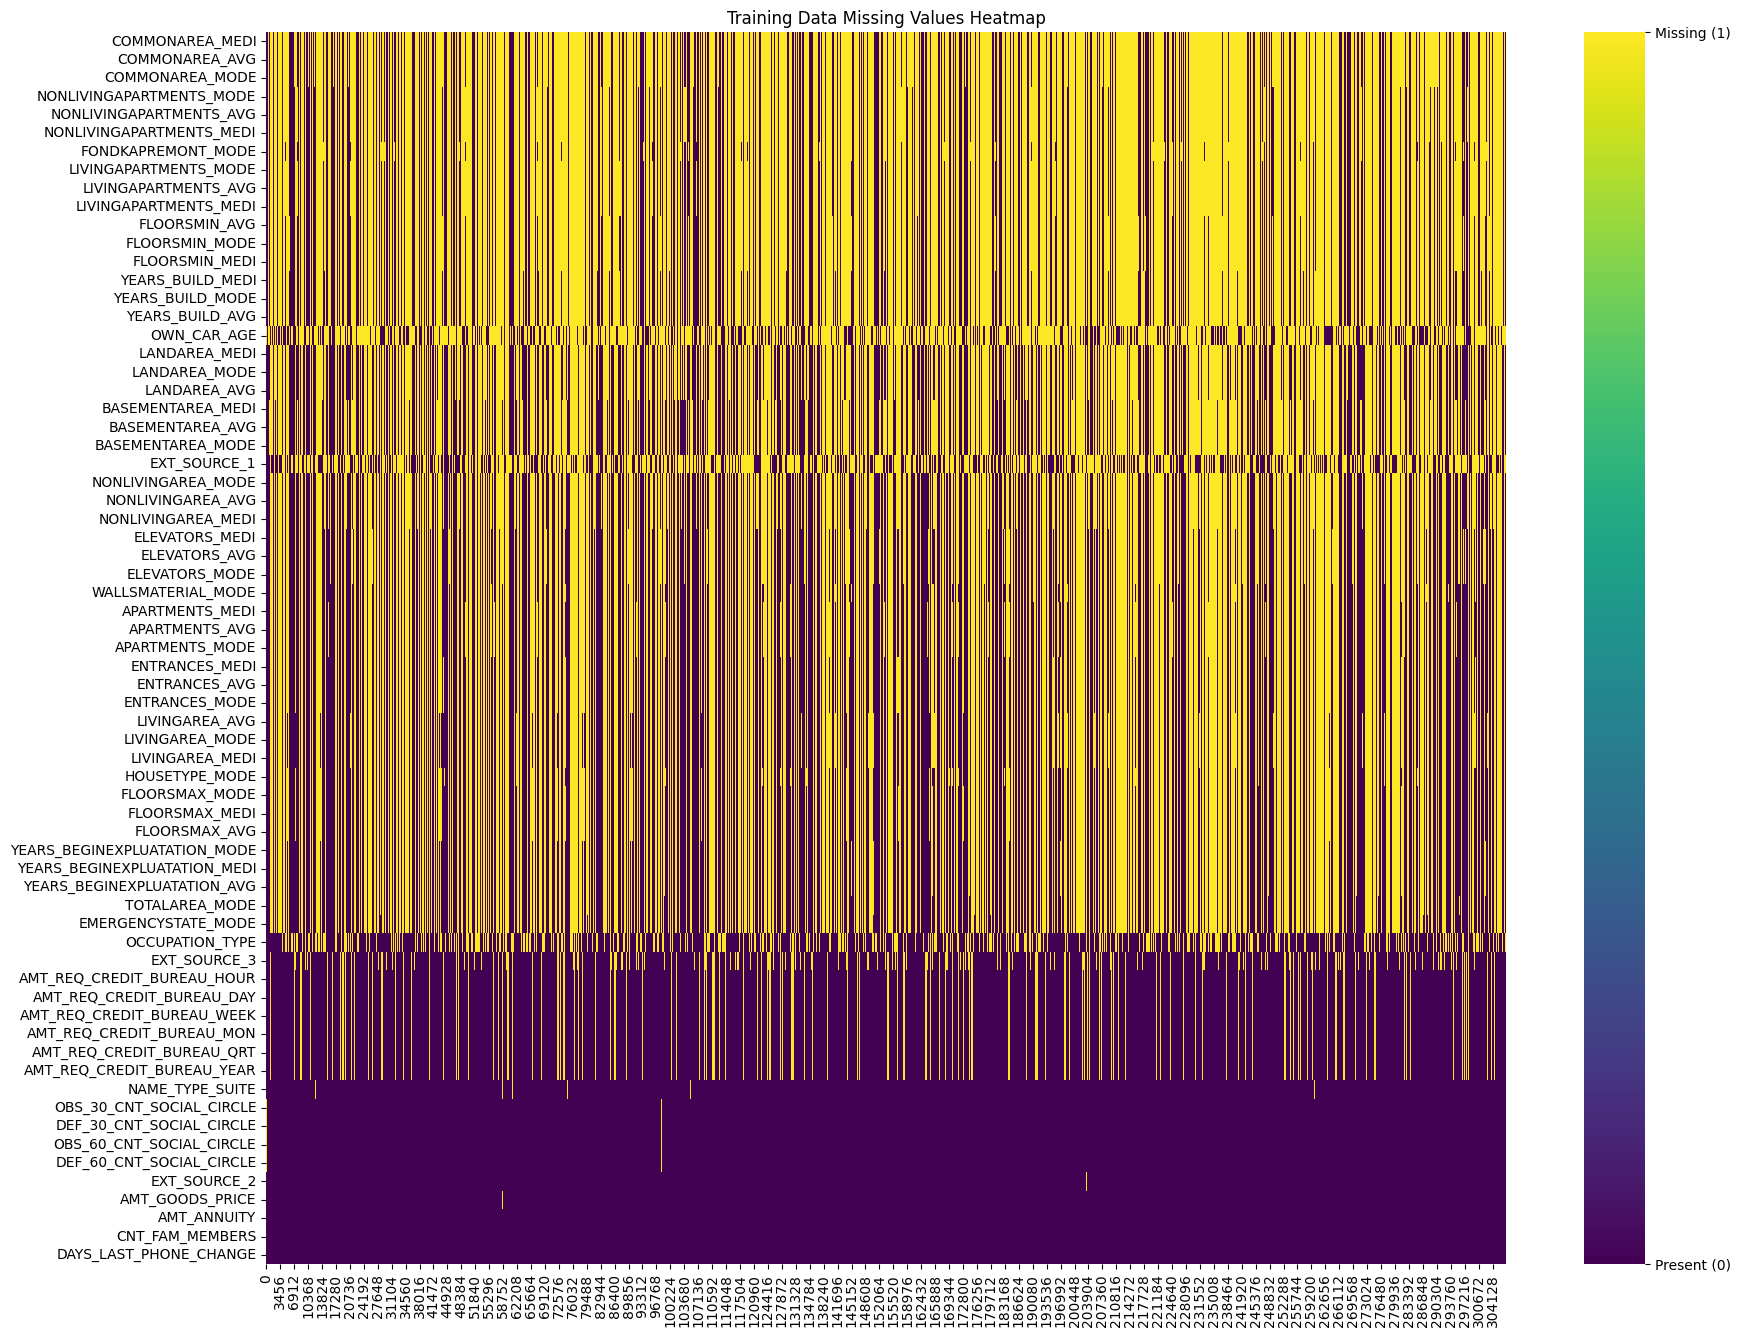

In [16]:
plt.figure(figsize=(20,16))
ax = sns.heatmap(train[missing_train.index].isnull().T, cbar=True, cmap="viridis", vmin=0, vmax=1)
colorbar = ax.collections[0].colorbar

colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Present (0)', 'Missing (1)'])
plt.title("Training Data Missing Values Heatmap")
plt.show()

Now, for the test data: 

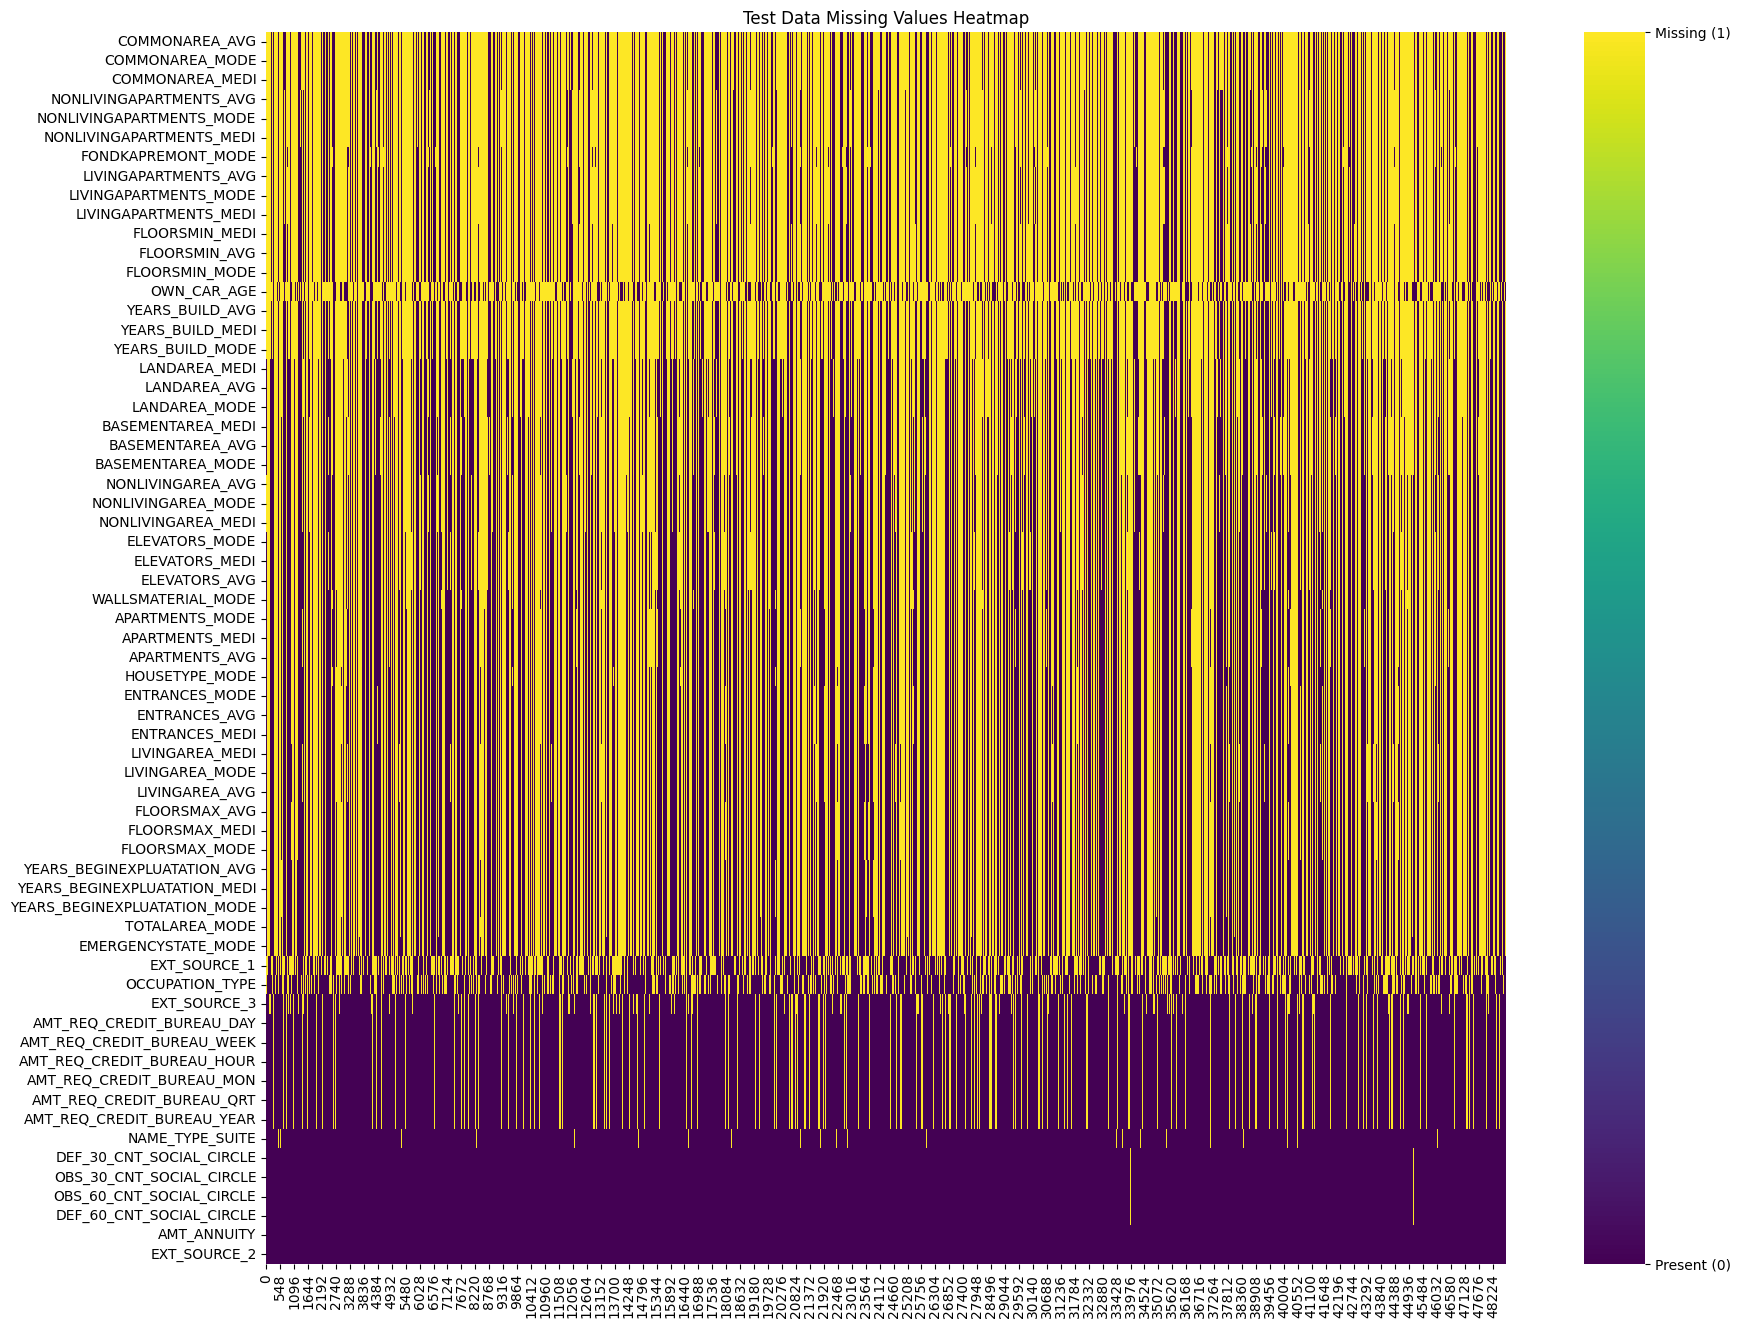

In [17]:
plt.figure(figsize=(20, 16))
ax = sns.heatmap(test[missing_test.index].isnull().T, cbar=True, cmap="viridis", vmin=0, vmax=1)
colorbar = ax.collections[0].colorbar

colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Present (0)', 'Missing (1)'])
plt.title("Test Data Missing Values Heatmap")
plt.show()

From these charts, it is clear that the variables with the most missing values are related to the building where a client lives. In general, no patterns are seen with these missing values. Performing a chi-squared test with null values from each category compared to the TARGET variable will tell if a correlation is present or not in the training data. 

Here the **null hypothesis** is that there is no relationship between the TARGET variable and whether a value is missing or not in a given feature. 

The **alternate hypothesis** is that there is a statistically significant relationship between the TARGET variable and a feature's absence of values. 

In addition, if a relationship is found between the presence of missing values and the TARGET, an indicator column is added to a modified dataset (train_). The chi-squared tests are done at the 95% confidence level: 

In [18]:
indicator_columns = []
alpha = 0.05
train_ = train.copy()
for x in train.columns:
    contingency_table = pd.crosstab(train['TARGET'], train[f'{x}'].isnull())
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print('contingengy table \n', contingency_table)
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    if p < alpha:
        print(f"Reject the null hypothesis - There is a relationship between TARGET and missing {x} values.")
        train_[f'{x}_missing'] = train_[f'{x}'].isnull().astype(int)
        indicator_columns.append(f'{x}')
    else:
        print(f"Fail to reject the null hypothesis - There is no relationship between TARGET and missing {x} values.")
    print()


contingengy table 
 SK_ID_CURR   False
TARGET            
0           282686
1            24825
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_CURR values.

contingengy table 
 TARGET   False
TARGET        
0       282686
1        24825
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing TARGET values.

contingengy table 
 NAME_CONTRACT_TYPE   False
TARGET                    
0                   282686
1                    24825
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing NAME_CONTRACT_TYPE values.

contingengy table 
 CODE_GENDER   False  True 
TARGET                    
0            282682      4
1             24825      0
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of 

Quite a few of the variables with missing values seem to be correlated with the TARGET variable. An indicator variable for these relationships is added to the train_ dataset where this relationship is present. The missing values will be analyzed in detail when looking at selected variables one by one. 

Looking at the modified training data: 

In [19]:
train_.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  OBS_30_CNT_SOCIAL_CIRCLE_missing DEF_30_CNT_SOCIAL_CIRCLE_missing  \
0  ...                                 0                                0   
1  ...                                 0                                0   
2  ...                                 0                                0   
3  ...                                 0                                0   
4  ...                                 0                                0   

  OBS_60_CNT_SOCIAL_CIRCLE_missing DEF_60_CNT_SOCIAL_CIRCLE_missing  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  AMT_REQ_CREDIT_BUREAU_HOUR_missing AMT_REQ_CREDIT_BUREAU_DAY_missing  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  1                                 1   
4                                  0                                 0   

   AMT_REQ_CREDIT_BUREAU_WEEK_missing  AMT_REQ_CREDIT_BUREAU_MON_missing  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   1                                  1   
4                                   0                                  0   

   AMT_REQ_CREDIT_BUREAU_QRT_missing  AMT_REQ_CREDIT_BUREAU_YEAR_missing  
0                                  0                                   0  
1                                  0                                   0  
2                                  0                                   0  
3                                  1                                   1  
4                                  0                                   0  

[5 rows x 185 columns]

Looking at the variables with indicator columns added: 

In [20]:
indicator_columns

['NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 

In [21]:
len(train_.columns) - len(train.columns)

63

In total, chi-squared tests showed a relationship between the TARGET variable and 63 training features with missing values.

# Target variable distribution

Looking at the distribution of the target variable: 

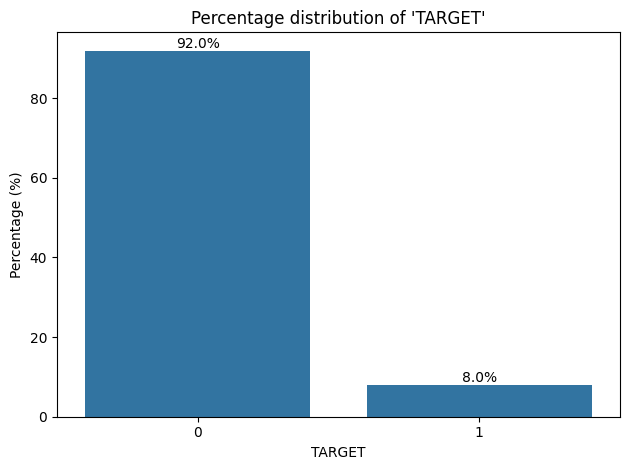

In [22]:
percent_dist(train, 'TARGET')

This is an imbalanced dataset, with only 8% of customers that have payment difficulties with their Home Credit loan. 

# Correlations

## Phi-k correlations

Correlations will now be examined, so as to identify important relationships with the target variable. Initially, phi-k correlation is used to look at correlation strength between variables. The loan identifier (SK_ID_CURR) is excluded from the phi-k correlation. 

In [23]:
train_phik = train.drop(['SK_ID_CURR'], axis=1)

Next, column types are defined to facilitate analysis and to properly define interval columns: 

In [24]:
cat_features = train_phik.select_dtypes(include=['object']).columns
float_features = train_phik.select_dtypes(include=['float64']).columns
integer_features = train_phik.select_dtypes(include=['int64']).columns
integer_features

Index(['TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

Some features of type integer are interval variables: 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH'.

In [25]:
interval_features = float_features.union(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH'])
integer_features = integer_features.difference(interval_features)


Now, the phi-k correlation matrix can be calculated: 

In [26]:
phik_overview = train_phik.phik_matrix(interval_cols=interval_features)


Looking at the top 30 relationships between features and the TARGET variable: 

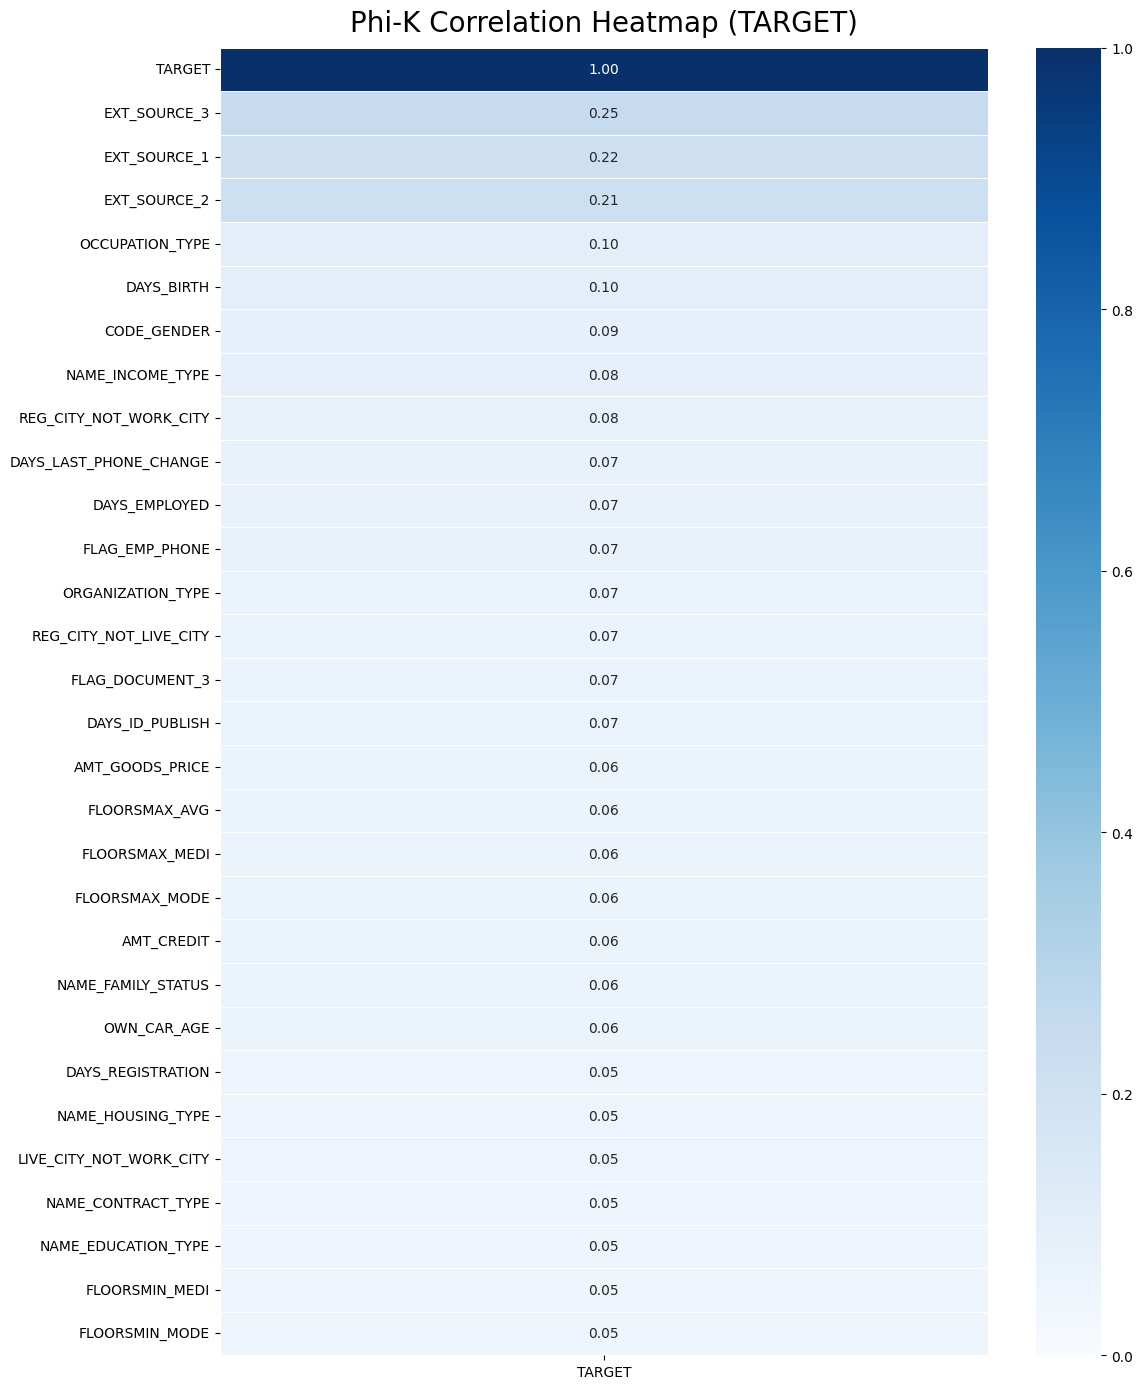

In [27]:
plt.figure(figsize=(12,14))

heatmap = sns.heatmap(phik_overview[['TARGET']].sort_values(by='TARGET', ascending=False).head(30), annot=True, cmap='Blues', vmin=0, vmax=1, cbar=True, fmt=".2f", linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_title('Phi-K Correlation Heatmap (TARGET)', fontdict={'fontsize':20}, pad=12)
plt.tight_layout()
plt.show()

No raw features seem to be strongly correlated with the TARGET. The top correlations are from EXT_SOURCE_3 (phi-k correlation coefficient of 0.25), EXT_SOURCE_1, and EXT_SOURCE_2, which are normalized external scores for a loan application. Other features that are correlated slightly with the TARGET variable include sociodemographic features such as OCCUPATION_TYPE, DAYS_BIRTH, CODE_GENDER, or NAME_INCOME_TYPE. 

This list of features is a good indication of important features to examine more closely, and is saved as a dataframe: 

In [28]:
top_30_phik = phik_overview[['TARGET']].sort_values(by='TARGET', ascending=False).head(30)

The opportunity presents itself to examine relationships between these identified variables. This gives an indication of multicollinearity in the dataset, in case linear models are used later on. Looking at the correlation matrix for the top 20 features correlated with the TARGET: 

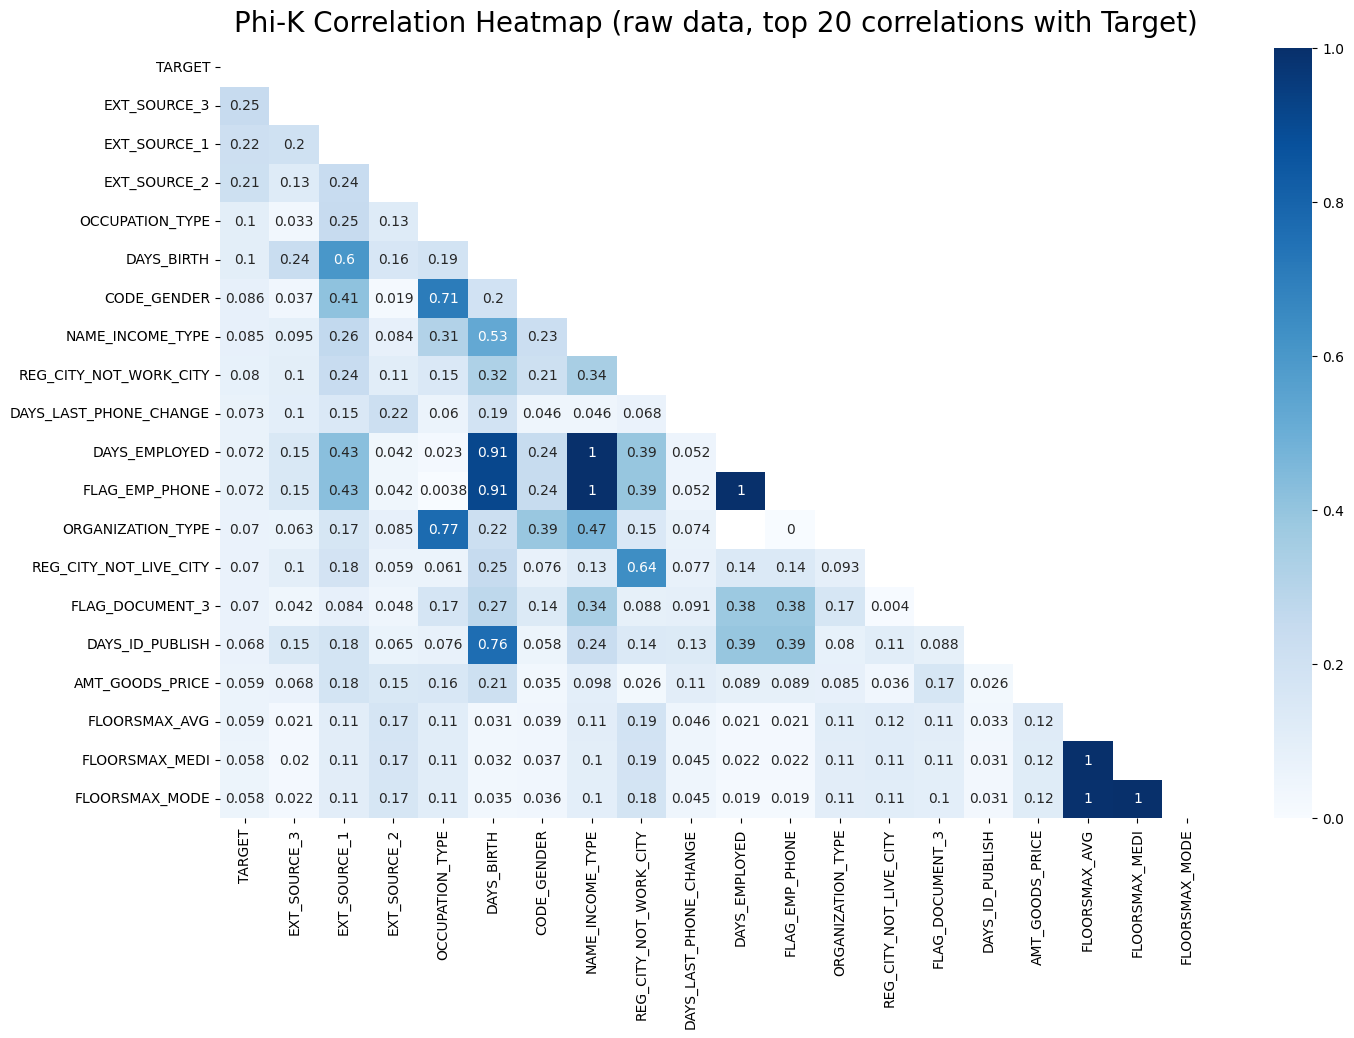

In [29]:
phik_top_20 = phik_overview[['TARGET']].sort_values(by='TARGET', ascending=False).head(20)

plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(phik_overview.loc[phik_top_20.index, phik_top_20.index], dtype=bool))
heatmap = sns.heatmap(phik_overview.loc[phik_top_20.index, phik_top_20.index], annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data, top 20 correlations with Target)', fontdict={'fontsize':20}, pad=12)
plt.show()

With this, interesting correlations between features (over 0.35) are: 
- FLOORS_MAX_AVG, _MEDI, AND _MODE are all perfectly correlated with each other (1). Possibly only one of these features needs to be present. 
- DAYS_EMPLOYED and DAYS_ID_PUBLISH (0.39) as well as DAYS_EMPLOYED and FLAG_DOCUMENT_3 (0.38), 
- FLAG_EMP_PHONE and DAYS_ID_PUBLISH (0.39) as well as FLAG_EMP_PHONE and FLAG_DOCUMENT_3 (0.38), 
- In addition, the DAYS_EMPLOYED variable is perfectly correlated (1) with FLAG_EMP_PHONE, and the phi-k correlation coefficient was not calculated for DAYS_EMPLOYED and ORGANIZATION_TYPE. This will be looked into more carefully. 
- REG_CITY_NOT_WORK_CITY and REG_CITY_NOT_LIVE_CITY (0.64), 
- REG_CITY_NOT_WORK_CITY and FLAG_EMP_PHONE (0.39), 
- REG_CITY_NOT_WORK_CITY and DAYS_EMPLOYED (0.39), 
- NAME_INCOME_TYPE is perfectly correlated with FLAG_EMP_PHONE and DAYS_EMPLOYED (1) 
- ORGANIZATION_TYPE and CODE_GENDER have correlation of 0.39. 
- DAYS_BIRTH is correlated with DAYS_ID_PUBLISH (0.76), FLAG_EMP_PHONE, (0.91) DAYS_EMPLOYED (0.91), and NAME_INCOME_TYPE (0.53)
- OCCUPATION_TYPE and ORGANIZATION_TYPE (0.77) and OCCUPATION_TYPE and CODE_GENDER (0.71)
- EXT_SOURCE_1 and DAYS_EMPLOYED, FLAG_EMP_PHONE (0.43), CODE_GENDER (0.41), DAYS_BIRTH (0.6) 

These correlations can be visually examined when exploring variables, and can be explanations for feature selection or indications for feature engineering to ultimately build the best model possible. 

Relationships between all raw categorical variables can also be examined with phi-k correlation:

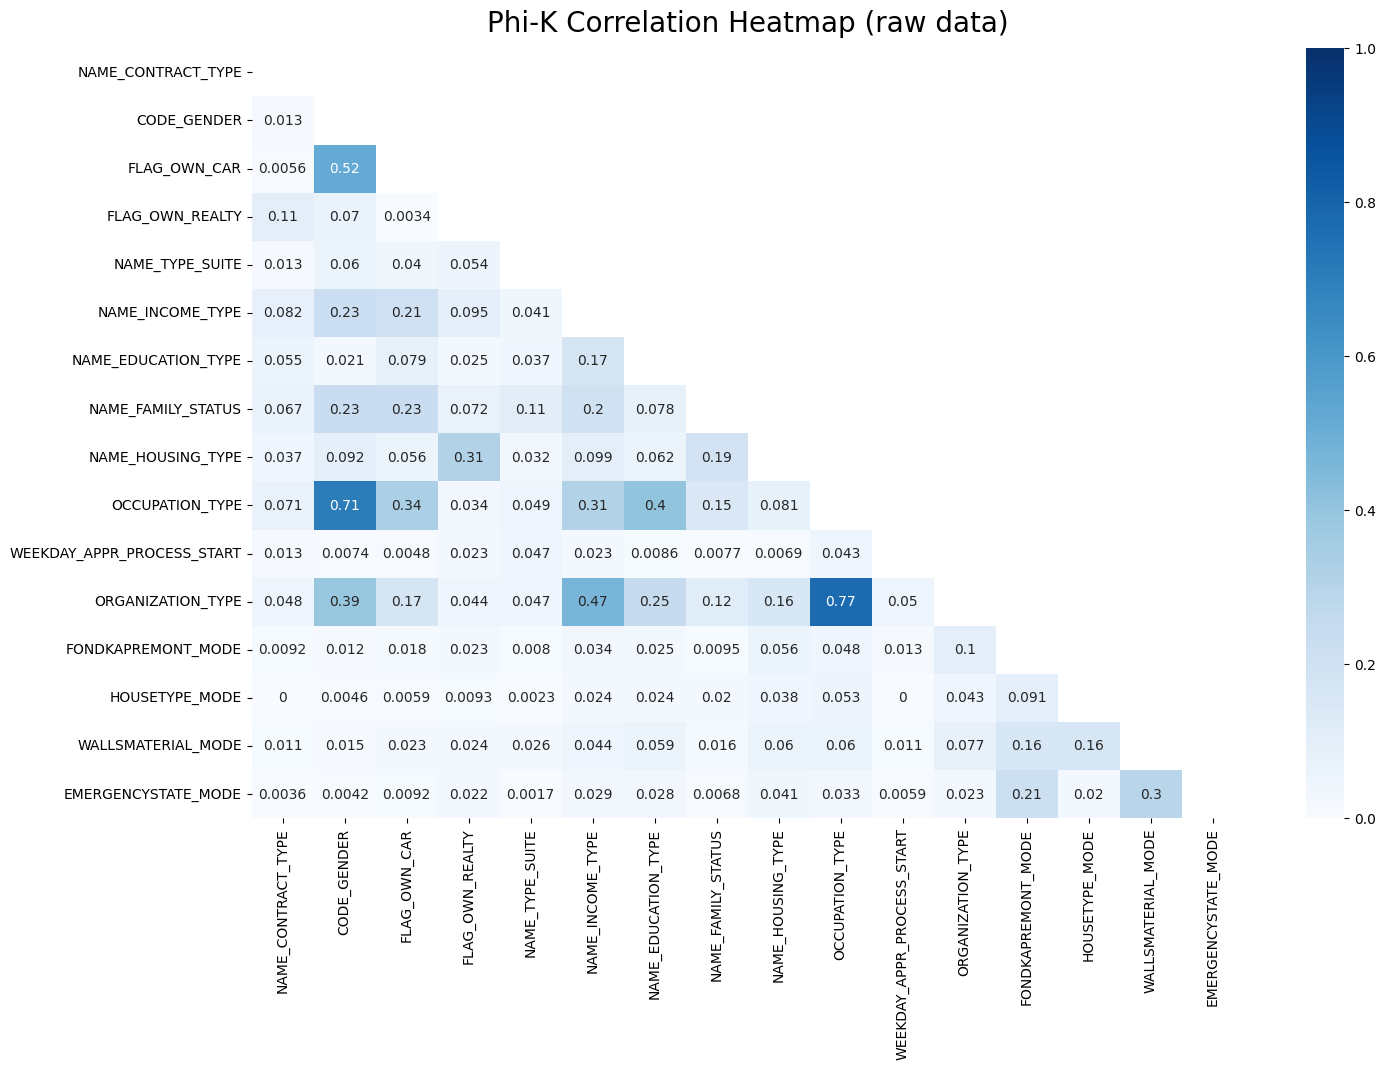

In [30]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(phik_overview.loc[cat_features, cat_features], dtype=bool))
heatmap = sns.heatmap(phik_overview.loc[cat_features, cat_features], annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

A few features stand out for looking at categorical relationships: 
- OCCUPATION_TYPE and ORGANIZATION_TYPE (0.77)
- NAME_EDUCATION_TYPE and OCCUPATION_TYPE (0.4)
- NAME_INCOME_TYPE and ORGANIZATION_TYPE (0.47)
- ORGANIZATION_TYPE and CODE_GENDER, OCCUPATION_TYPE and CODE_GENDER (0.71), FLAG_OWN_CAR and CODE_GENDER (0.52)

## Spearman correlations: 

For numerical features, it is possible to look at strength and direction of the correlations. As nothing is known yet about feature distributions, Spearman correlation is used.

In [31]:
spearman_corr = train.corr(method='spearman', numeric_only=True)

Visualizing the top 15 positive and negative correlations gives:

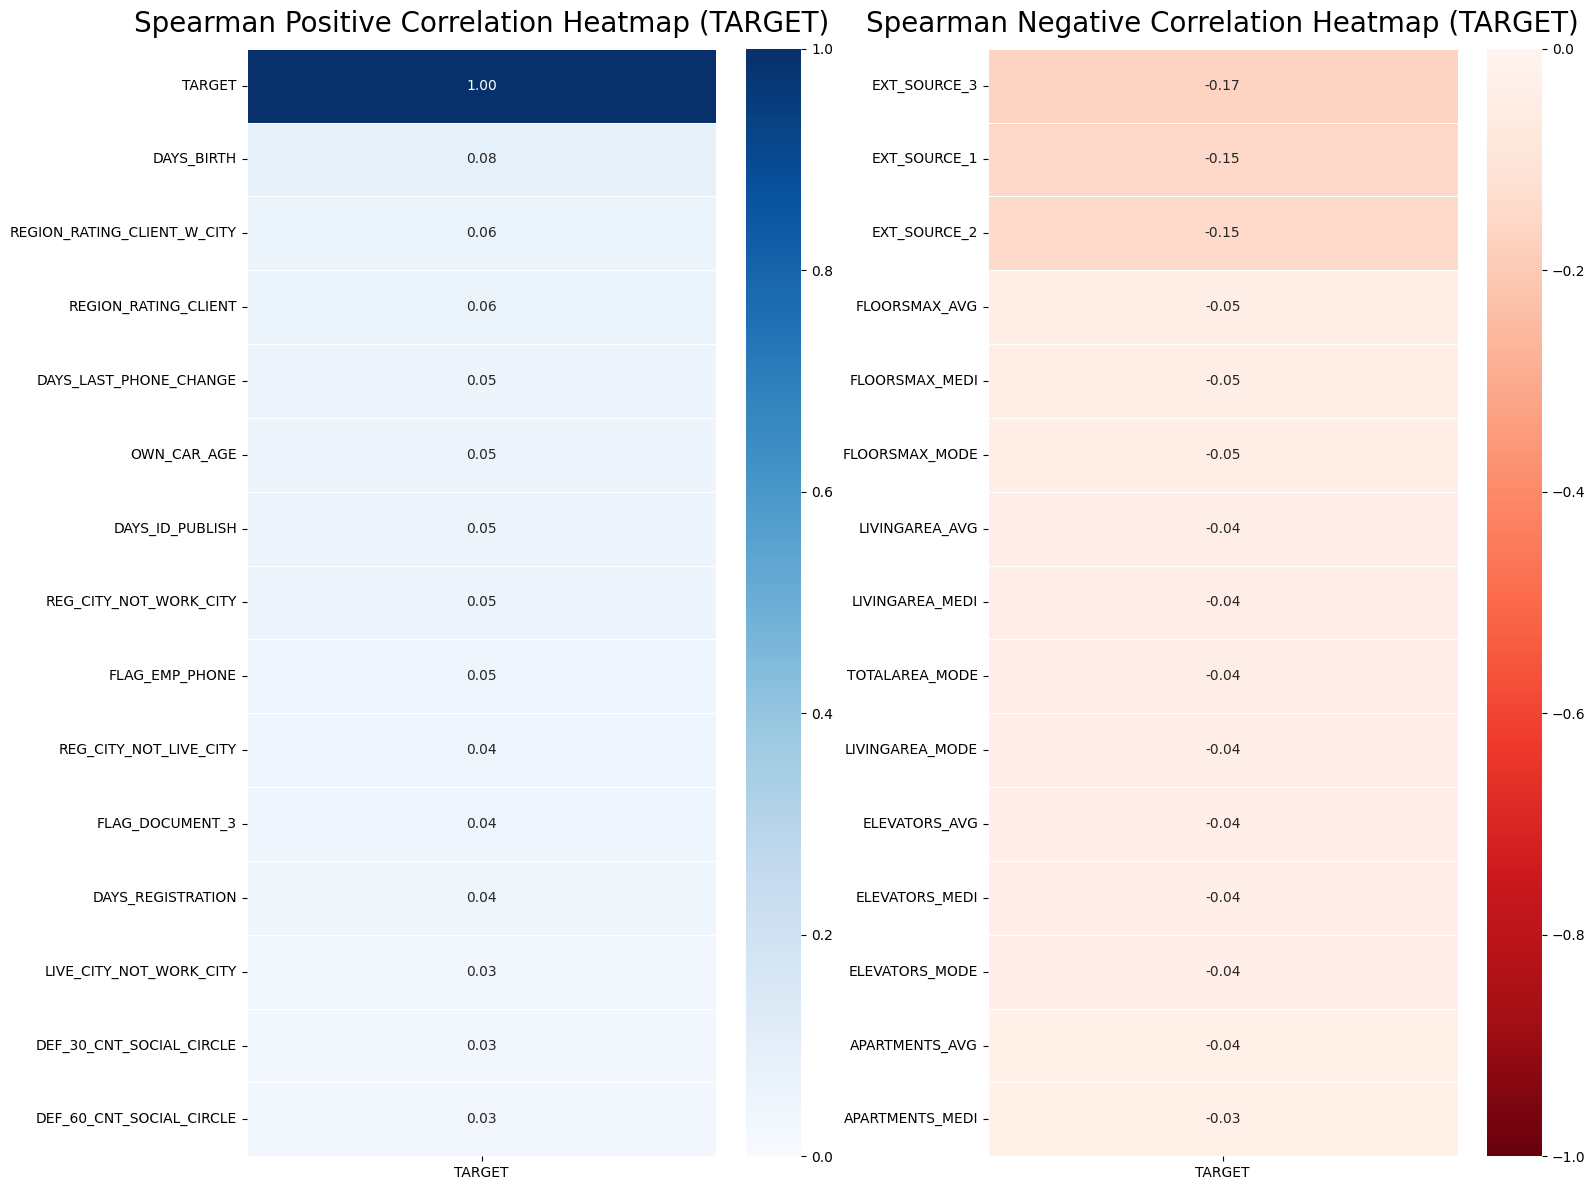

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 12))

heatmap = sns.heatmap(spearman_corr[['TARGET']].sort_values(by='TARGET', ascending=False).head(15), annot=True, cmap='Blues', vmin=0, vmax=1, cbar=True, fmt=".2f", linewidths=0.5, ax=ax[0])
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_title('Spearman Positive Correlation Heatmap (TARGET)', fontdict={'fontsize':20}, pad=12)

heatmap = sns.heatmap(spearman_corr[['TARGET']].sort_values(by='TARGET', ascending=True).head(15), annot=True, cmap='Reds_r', vmin=-1, vmax=0, cbar=True, fmt=".2f", linewidths=0.5, ax=ax[1])
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_title('Spearman Negative Correlation Heatmap (TARGET)', fontdict={'fontsize':20}, pad=12)
plt.tight_layout()
plt.show()

Few features have a positive correlation with the target. The highest one is DAYS_BIRTH (0.08). Most interesting Spearman correlations with the target are negative, where the strongest negative correlations are the EXT_SOURCE_ variables (-0.17 and -0.15), which matches findings in the phi-k correlation calculation. This means that lower scores lead to the EXT_SOURCE_variables lead to a higher chance of a customer defaulting on a loan, or higher values for the EXT_SOURCE_variables lead to an decrease in likelihood of defaulting on a loan. The next strongest negative correlations are all to do with the building that the client lives in.

Relationships between variables can also be examined with Spearman correlations. To do this, all Spearman correlations are ranked by strength (absolute value), and the top 20 features are selected for visualization: 

In [33]:
spearman_abs = spearman_corr.abs()
top_30_spearman = spearman_abs['TARGET'].sort_values(ascending=False).head(30)
top_20_spearman = spearman_abs['TARGET'].sort_values(ascending=False).head(20)

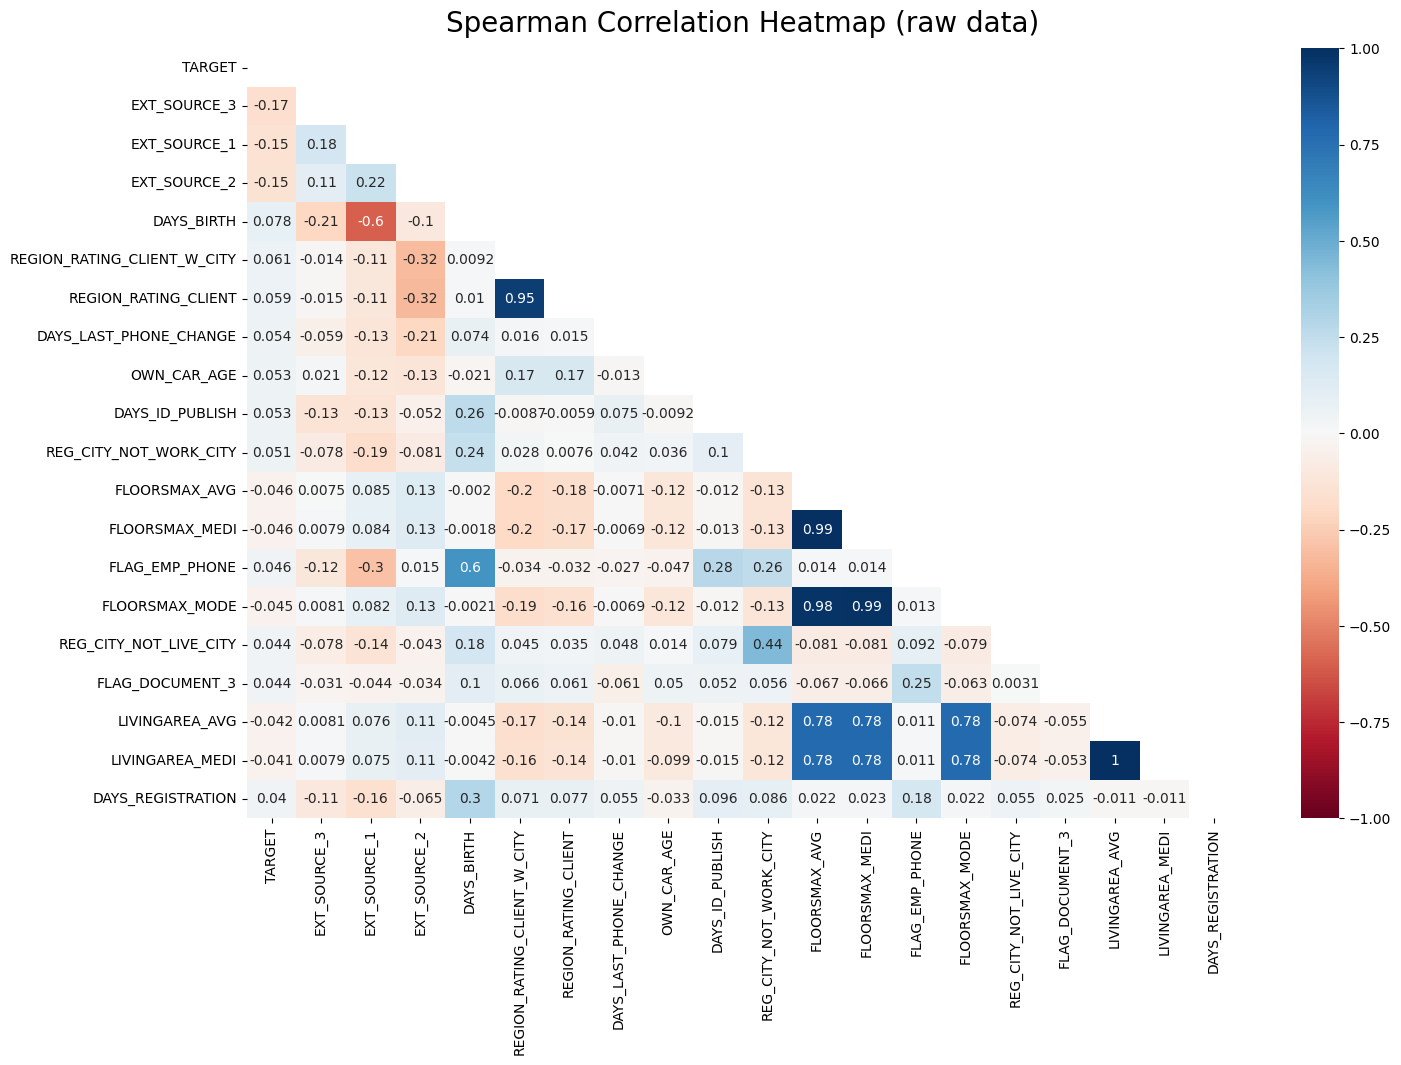

In [34]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(spearman_corr.loc[top_20_spearman.index, top_20_spearman.index], dtype=bool))
heatmap = sns.heatmap(spearman_corr.loc[top_20_spearman.index, top_20_spearman.index], annot=True, mask=mask, cmap='RdBu', vmin=-1, vmax=1)
heatmap.set_title('Spearman Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

 Looking at the full heat map of these correlations, it is clear to see that the building information variables are all highly correlated with each other (0.74-1). In addition to this, 
- EXT_SOURCE_1 is negatively correlated with FLAG_EMP_PHONE (-0.3) as seen before, 
- REG_CITY_NOT_WORK_CITY is positively correlated with REG_CITY_NOT_LIVE_CIT (0.44), 
- REGION_RATING_CLIENT is almost perfectly positively correlated with REGION_RATING_CLIENT_W_CITY (0.95), 
- DAYS_BIRTH is negatively correlated with EXT_SOURCE_1 (-0.6), and with FLAG_EMP_PHONE (0.6), as seen before. 



# Variable selection for examination

From the Phi-k and Spearman top correlations with the TARGET variable, a set of between 20-30 features can be selected for a more in-depth analysis. To do this, the common values between the top 30 correlations in each case is found: 

In [35]:
common_features = list(set(top_30_spearman.index.to_list()) & set(top_30_phik.index.to_list()))
common_features

['EXT_SOURCE_1',
 'DAYS_REGISTRATION',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLOORSMAX_MODE',
 'OWN_CAR_AGE',
 'DAYS_BIRTH',
 'FLOORSMAX_MEDI',
 'DAYS_LAST_PHONE_CHANGE',
 'FLOORSMAX_AVG',
 'FLAG_DOCUMENT_3',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'TARGET']

As no categorical variables are selected here, the following variables are also added to provide a more in depth examination for a typical Home Credit customer: 
- Gender (CODE_GENDER),
- Family status (NAME_FAMILY_STATUS), 
- Number of family members (CNT_FAM_MEMBERS),
- Number of children (CNT_CHILDREN), 
- Income type (NAME_INCOME_TYPE), 
- Total income (AMT_INCOME_TOTAL), 
- Occupation type (OCCUPATION_TYPE), 
- Organization type (ORGANIZATION_TYPE), 
- Days employed (DAYS_EMPLOYED), 
- Education type (NAME_EDUCATION_TYPE),
- Relative population in client's region (REGION_POPULATION_RELATIVE),
- If the client owns a car (FLAG_OWN_CAR),
- If the client owns realty (FLAG_OWN_REALTY). 

In addition, exploring some financial data, and information about the loan they took with Home Credit could be useful for this analysis. These variables include: 
- The price of goods the loan was used for (AMT_GOODS_PRICE), 
- The credit amount of the loan (AMT_CREDIT), 
- The loan's annuity (AMT_ANNUITY)
- The number of inquiries to the Credit Bureau one year before a client's application (AMT_REQ_CREDIT_BUREAU_YEAR), 
- Home Credit's rating of the region where the client lives (REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY).

Combining these features with the common features list gives: 


In [36]:
top_features = common_features + ['CODE_GENDER', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

Now, these selected features can be explored briefly one by one.

# Variable exploration:

From these correlations, important features to examine individually include: 
- Sociodemographic features, 
- Employment type and status,
- Financial information,
- External risk sources, 
- Information about client's building. 

Features in each of these categories will now be examined: 

### Sociodemographic features: 

These features include personal and demographic information about a typical client who applies for a loan at Home Credit: 

* Age (DAYS_BIRTH),
* Gender (CODE_GENDER), 
* Family status (NAME_FAMILY_STATUS),
* Number of family members (CNT_FAM_MEMBERS),
* Number of children (CNT_CHILDREN),
* If the client owns a car with its age (FLAG_OWN_CAR, OWN_CAR_AGE),
* If the client owns realty (FLAG_OWN_REALTY),
* Education type (NAME_EDUCATION_TYPE),
* Relative population in client's region (REGION_POPULATION_RELATIVE),


#### DAYS_BIRTH

In [37]:
print(is_missing.loc['DAYS_BIRTH'], '\n')
print(train['DAYS_BIRTH'].describe())

Missing number        0.0
Missing percentage    0.0
Name: DAYS_BIRTH, dtype: float64 

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


No missing values are present here. This variable needs to be modified so that the units are in years and not negative days: 

In [38]:
train['AGE'] = train['DAYS_BIRTH'] / -365

Now, the distribution of customer's ages can be examined: 

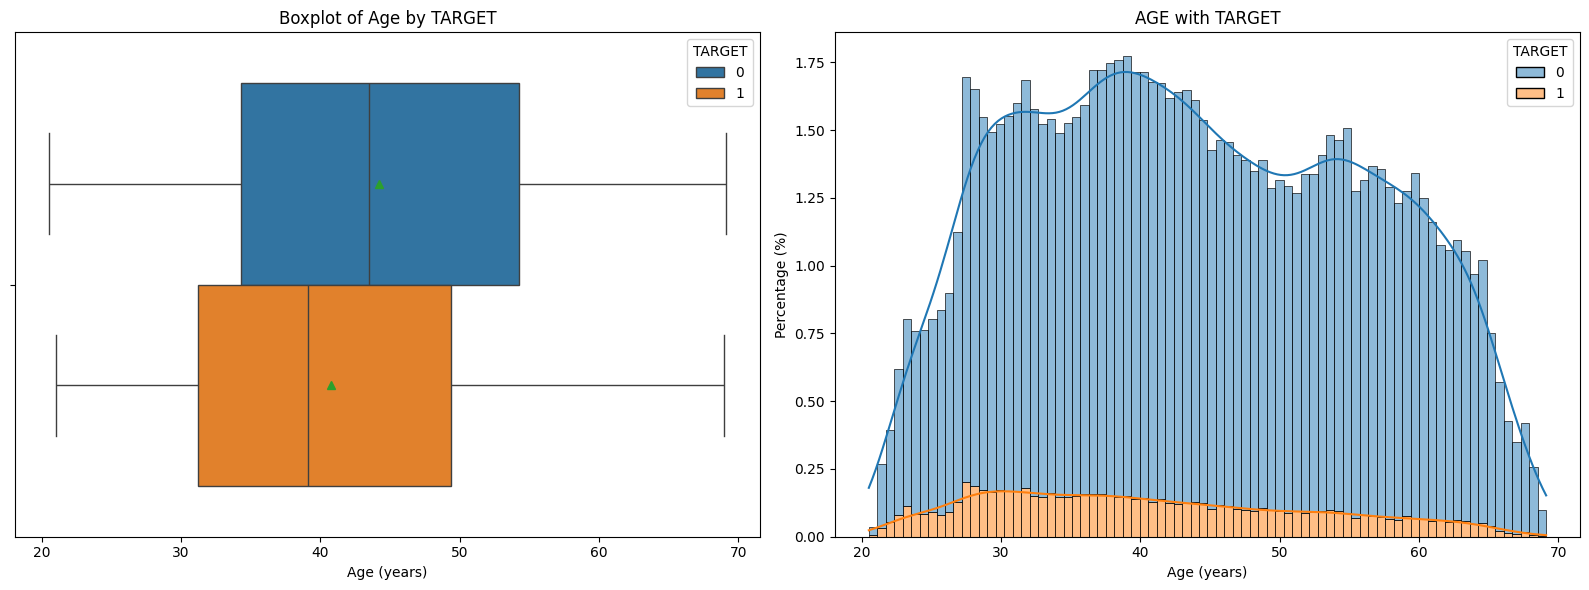

In [39]:
fix, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=train, x='AGE', hue='TARGET', showmeans=True, ax=axes[0]).set(title=f'Boxplot of Age by TARGET', xlabel=f'Age (years)');
plot_numerical(train, 'AGE', 80, axes[1], 'Age (years)')
plt.tight_layout()
plt.show()


50% of customers are aged between about 35-55 years old (non-defaulters) or 30-50 years old(defaulters). Generally, the distribution of those who have not defaulted seems to tend towards slightly larger values for the middle 50% of loan applicants than for those who did default.

#### CODE_GENDER

Exploring CODE_GENDER
Missing number        0.0
Missing percentage    0.0
Name: CODE_GENDER, dtype: float64 



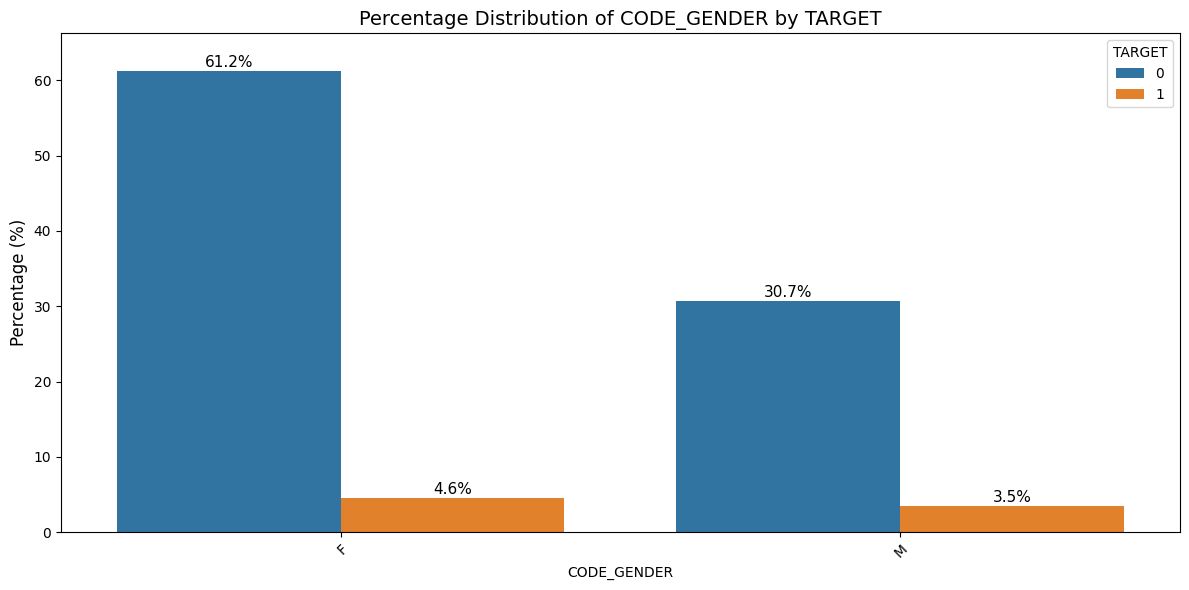

In [40]:
explore_category('CODE_GENDER', is_missing, train)

Most loan seekers are females, and it is hard to tell if the default rate differs by gender. It looks like slightly more men than women default on a loan. Only four people's gender is unknown.

Less than 1% of data is missing for this variable. Generally in this section, no imputation will be done with missing values, as gradient boosted models can handle missing values on their own. 

#### NAME_FAMILY_STATUS

Exploring NAME_FAMILY_STATUS
Missing number        0.0
Missing percentage    0.0
Name: NAME_FAMILY_STATUS, dtype: float64 



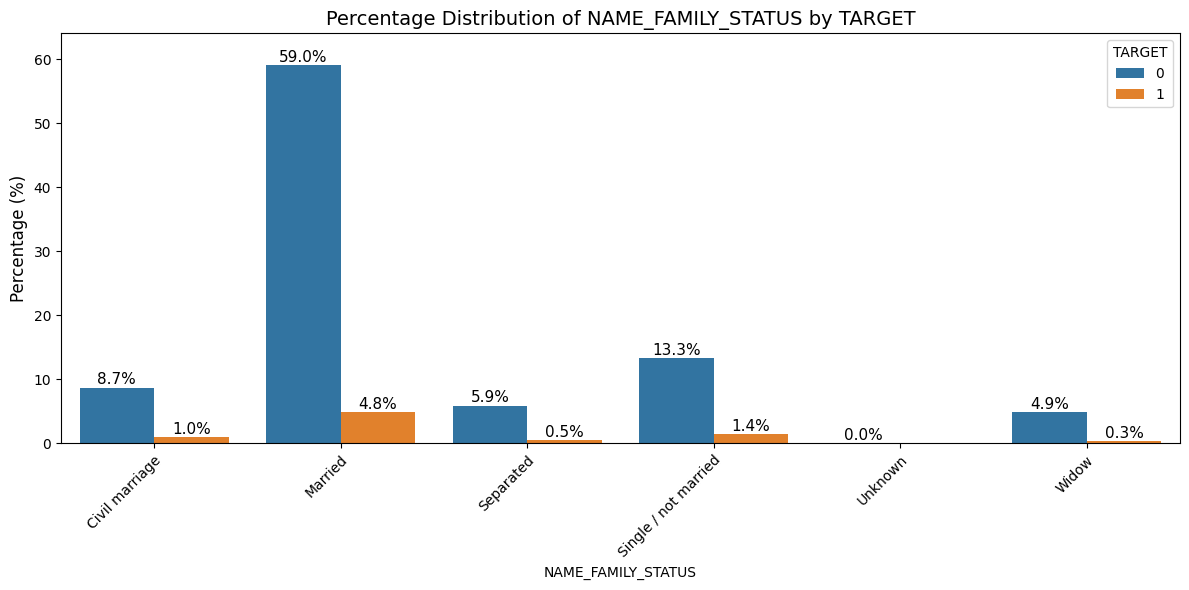

In [41]:
explore_category('NAME_FAMILY_STATUS', is_missing, train)

No missing values are present for this variable. Most people applying for a loan are married, and only 2 applicants have unknown status.

#### CNT_CHILDREN

Exploring CNT_CHILDREN
Missing number        0.0
Missing percentage    0.0
Name: CNT_CHILDREN, dtype: float64 



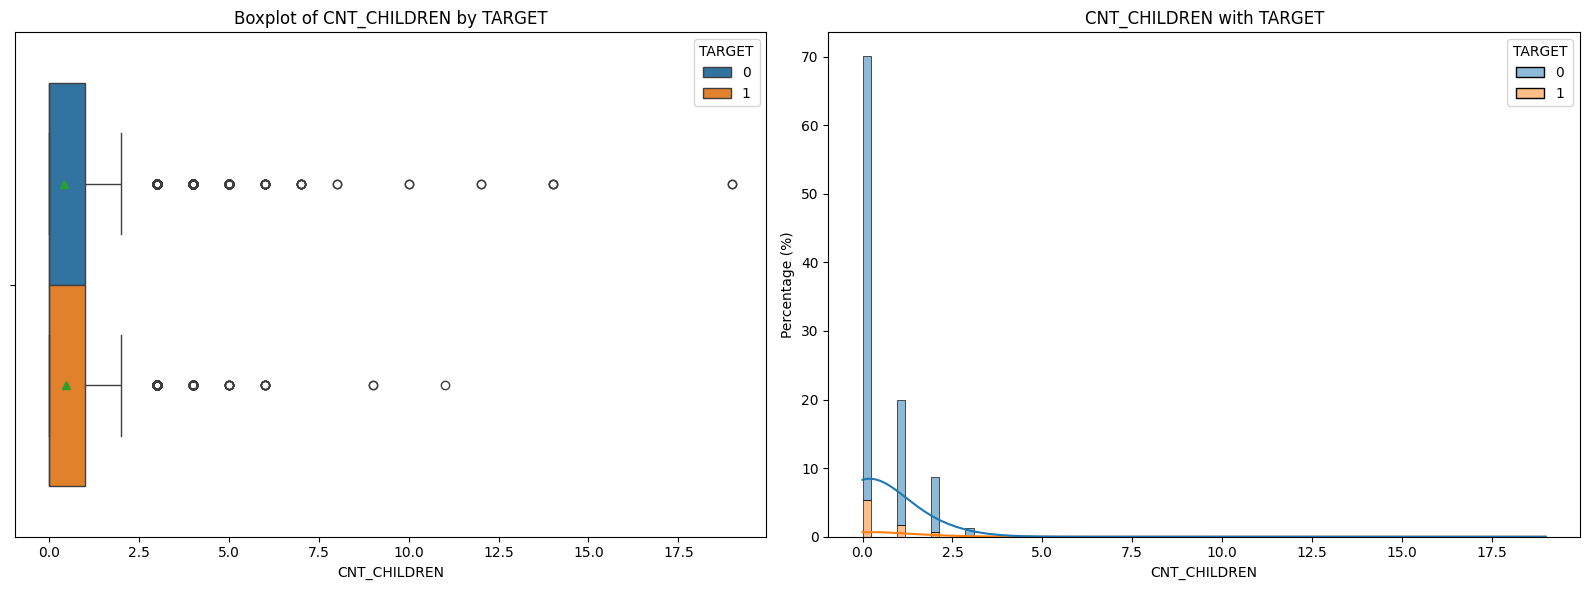

In [42]:
explore_numerical('CNT_CHILDREN', is_missing, train)

Over half of applicants have no children, and only one quarter of applicants have between 2-19 children. No missing values are present here.

#### CNT_FAM_MEMBERS

Exploring CNT_FAM_MEMBERS
Missing number        2.00000
Missing percentage    0.00065
Name: CNT_FAM_MEMBERS, dtype: float64 



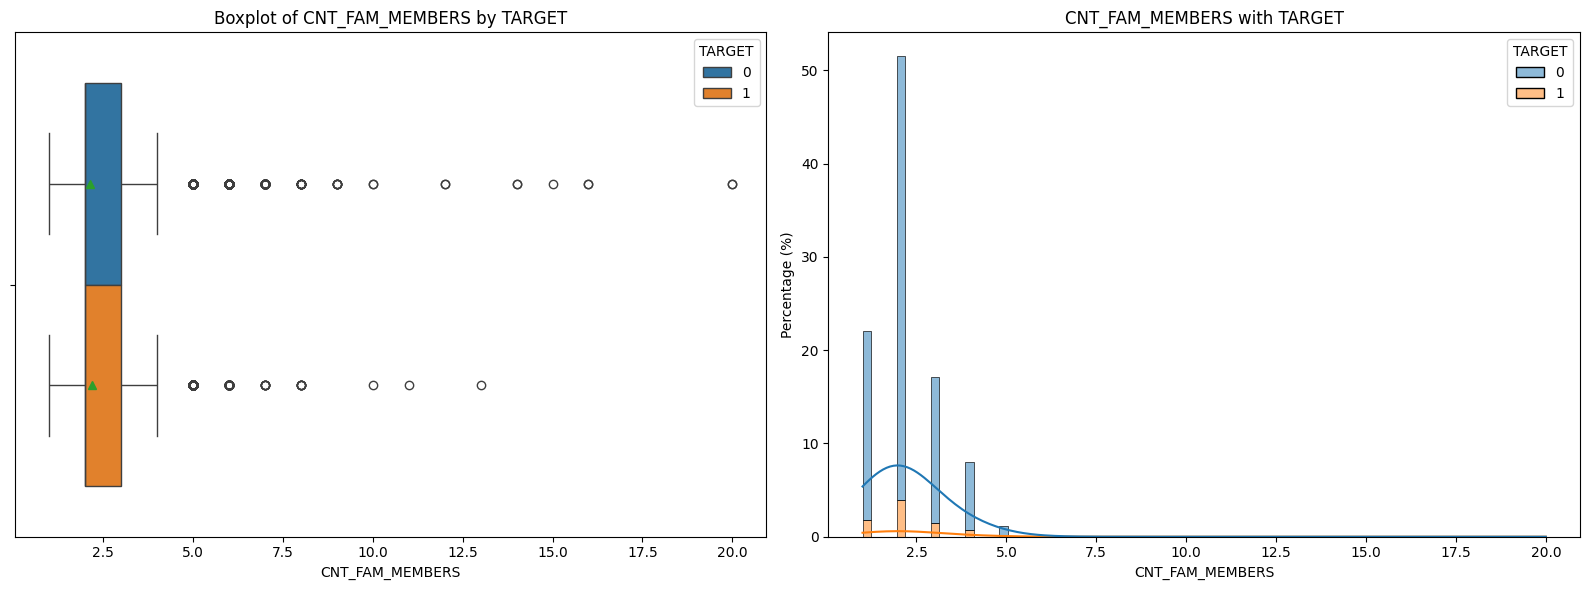

In [43]:
explore_numerical('CNT_FAM_MEMBERS', is_missing, train)

Only two of these are null values. If either of these null values has a positive value for CNT_CHILDREN, this could indicate a family of at least one. 

In [44]:
train[train['CNT_FAM_MEMBERS'].isnull()]['CNT_CHILDREN']

41982     0
187348    0
Name: CNT_CHILDREN, dtype: int64

Neither unnown value has children. Most loan applicants have a family size of 2, and only a quarter of applicants have a family size of over 3 people.

#### FLAG_OWN_CAR

Exploring FLAG_OWN_CAR
Missing number        0.0
Missing percentage    0.0
Name: FLAG_OWN_CAR, dtype: float64 



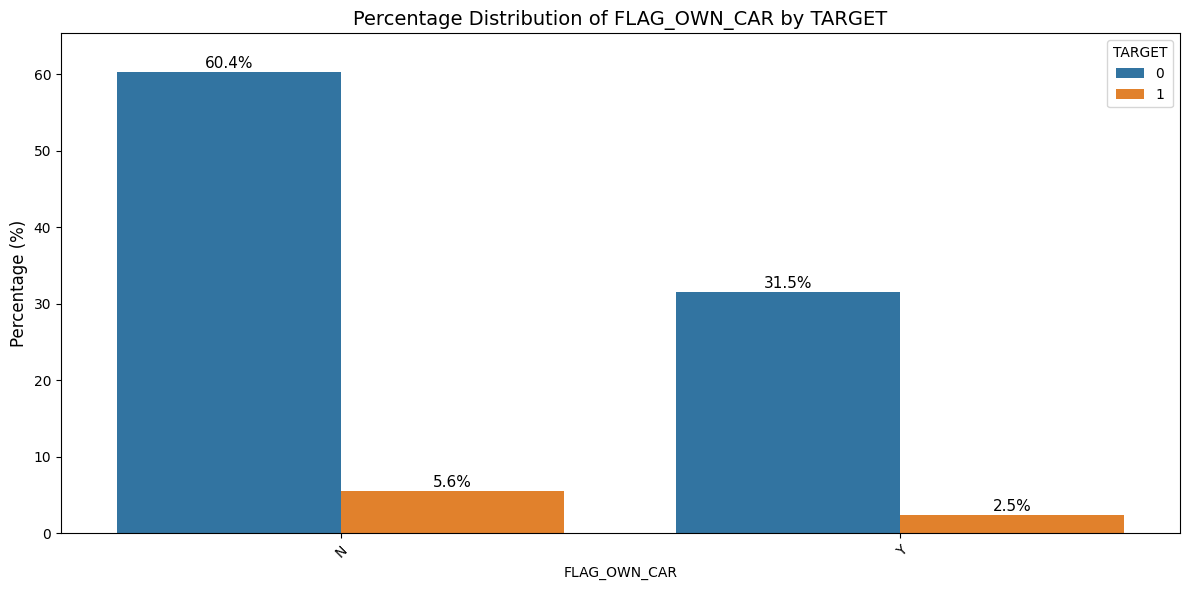

In [45]:
explore_category('FLAG_OWN_CAR', is_missing, train)

No values are missing for this variable. Most customers do not own a car.

#### OWN_CAR_AGE

Exploring OWN_CAR_AGE
Missing number        202929.00000
Missing percentage        65.99081
Name: OWN_CAR_AGE, dtype: float64 



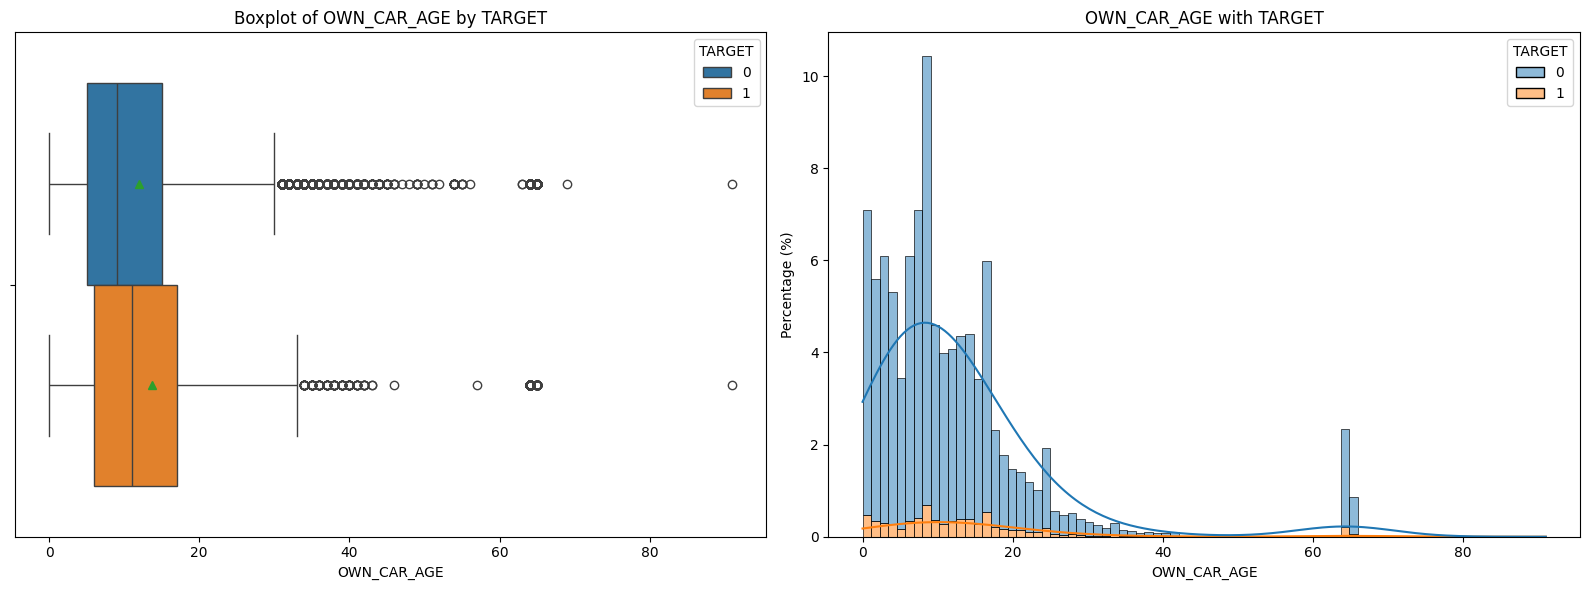

In [46]:
explore_numerical('OWN_CAR_AGE', is_missing, train)

66% of this variable is missing, and 50% cars are aged under 9 years. Very few cars are quite old (over 60 years old, which is possible).

If a customer does not own a car, this OWN_CAR_AGE variable can be set to 0: 

In [47]:
train[train['OWN_CAR_AGE'].isnull()]['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y         5
Name: count, dtype: int64

In [48]:
train.loc[(train['OWN_CAR_AGE'].isnull()) & (train['FLAG_OWN_CAR'] == 'N'), 'OWN_CAR_AGE'] = 0
train[train['OWN_CAR_AGE'].isnull()]['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
Y    5
Name: count, dtype: int64

Only 5 of the null values for car age do own a car, and will be left as null values for now.

#### FLAG_OWN_REALTY

Exploring FLAG_OWN_REALTY
Missing number        0.0
Missing percentage    0.0
Name: FLAG_OWN_REALTY, dtype: float64 



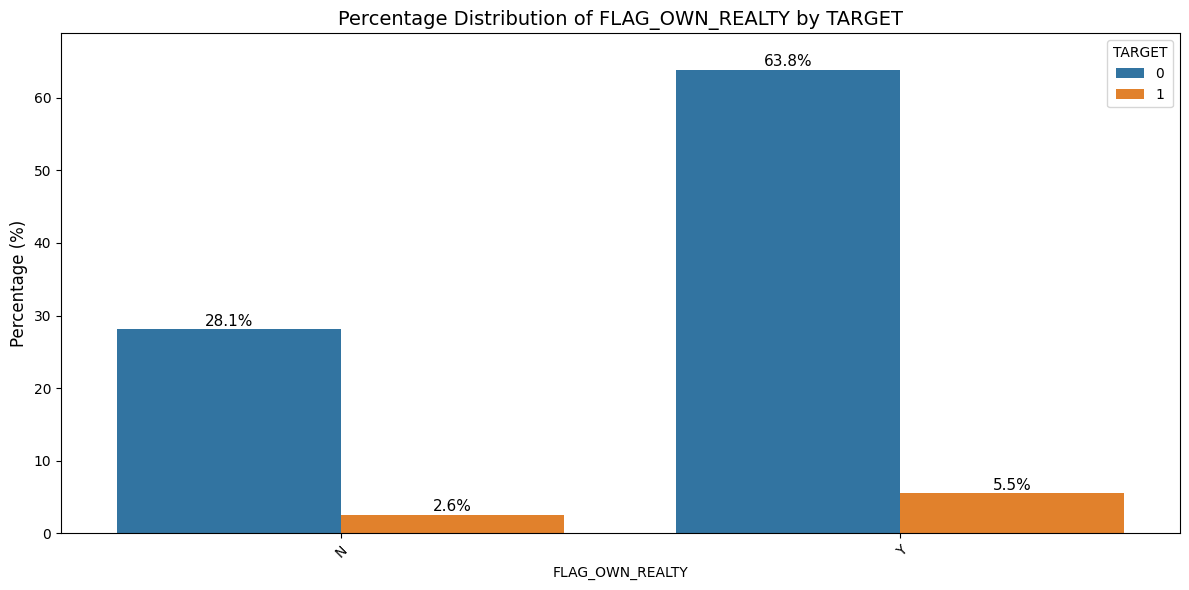

In [49]:
explore_category('FLAG_OWN_REALTY', is_missing, train)

No values are missing for this variable, and most customers do own realty.

#### NAME_EDUCATION_TYPE

Exploring NAME_EDUCATION_TYPE
Missing number        0.0
Missing percentage    0.0
Name: NAME_EDUCATION_TYPE, dtype: float64 



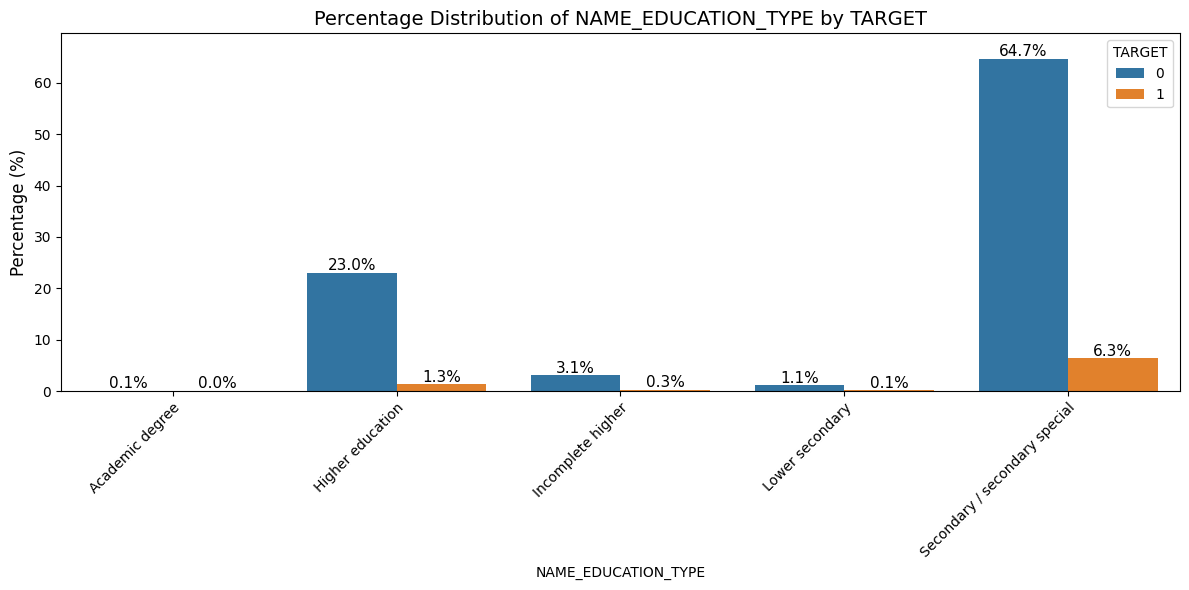

In [50]:
explore_category('NAME_EDUCATION_TYPE', is_missing, train)

Most customers have completed secondary or secondary special school, and barely any have an academic degree, incomplete higher education or lower secondary school. No missing  values are present here.

#### REGION_POPULATION_RELATIVE

This variable represents the normalized population of a client's region.

Exploring REGION_POPULATION_RELATIVE
Missing number        0.0
Missing percentage    0.0
Name: REGION_POPULATION_RELATIVE, dtype: float64 



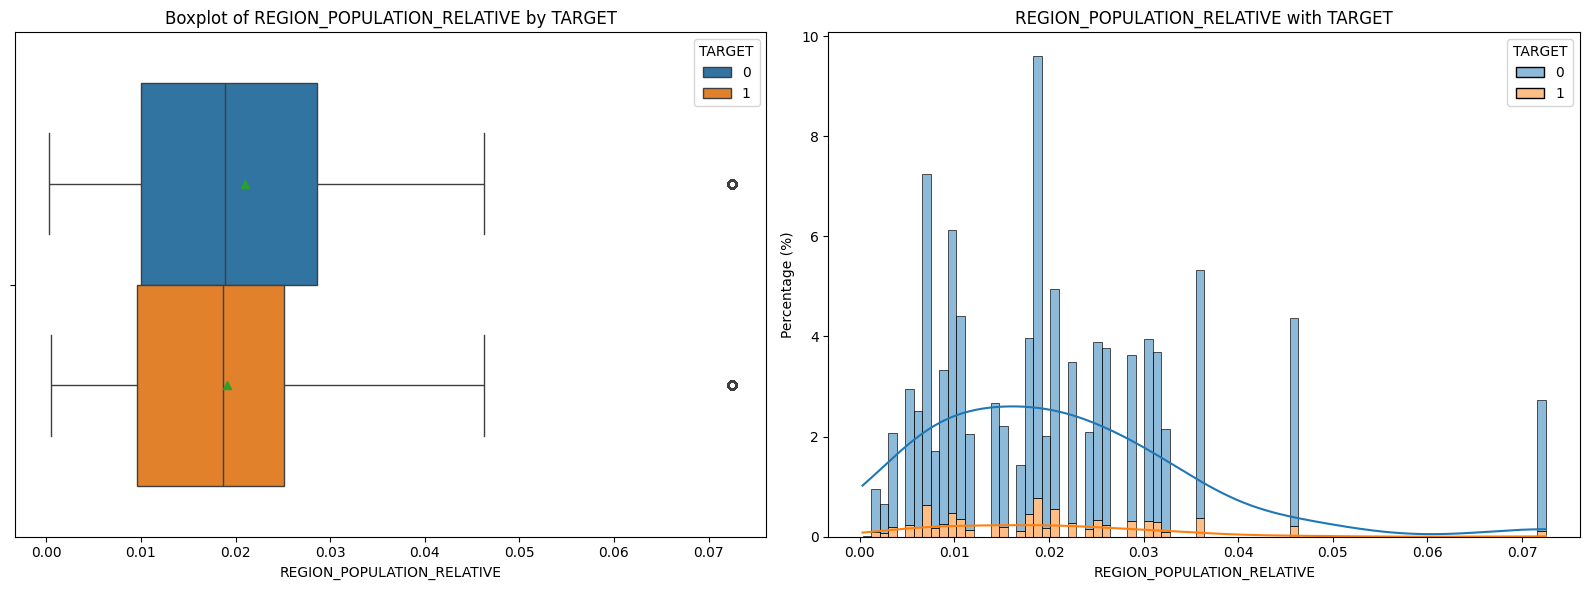

In [51]:
explore_numerical('REGION_POPULATION_RELATIVE', is_missing, train)

In both the defaulting and non defaulting cases, some outliers are present with relative normalized population of about 0.072. As the mean is further from the median in the non-defaulting case, this suggests that slightly more customers do not default on their loan when they live in more densely populated regions.

### Employment status and type:

Variables relating to a customer's employment status and type include: 
* Occupation type, 
* Income type, 
* Organization type, and
* Time employed. 


#### OCCUPATION_TYPE

Exploring OCCUPATION_TYPE
Missing number        96391.000000
Missing percentage       31.345545
Name: OCCUPATION_TYPE, dtype: float64 



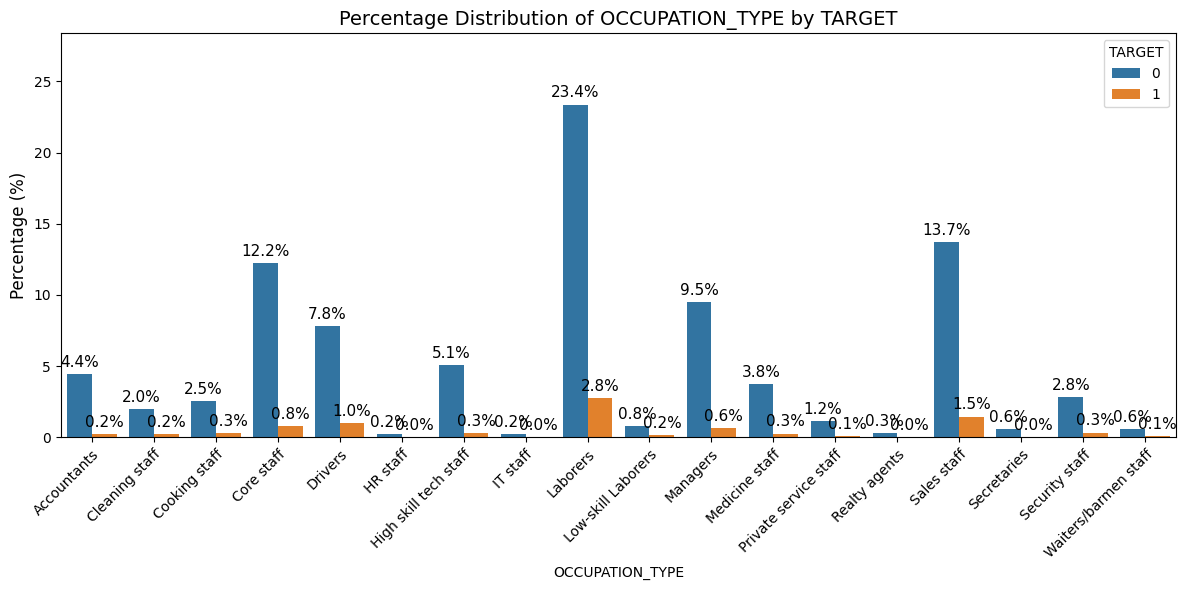

In [52]:
explore_category('OCCUPATION_TYPE', is_missing, train)

About a third of this data is missing. This feature has quite a few categories, and most people are laborers, sales staff, or core staff. For easier visualization purposes, some of the uncommon categories can be grouped together: 

In [53]:
group_map = {
    'Accountants': 'Accountants',
    'Cleaning staff': 'Service',
    'Cooking staff': 'Service',
    'Core staff': 'Core staff',
    'Drivers': 'Drivers', 
    'HR staff': 'Other',
    'High skill tech staff': 'Tech',
    'IT staff': 'Tech',
    'Laborers': 'Laborers', 
    'Low-skil Laborers': 'Laborers',
    'Managers': 'Managers',
    'Medicine staff': 'Medicine',
    'Private service staff': 'Other',
    'Realty agents': 'Other',
    'Sales staff': 'Sales',
    'Secretaries': 'Other',
    'Security staff': 'Other', 
    'Waiters/barmen staff': 'Service'

    
}
    
train['OCCUPATION_TYPE_GROUPED'] = train['OCCUPATION_TYPE'].map(group_map)


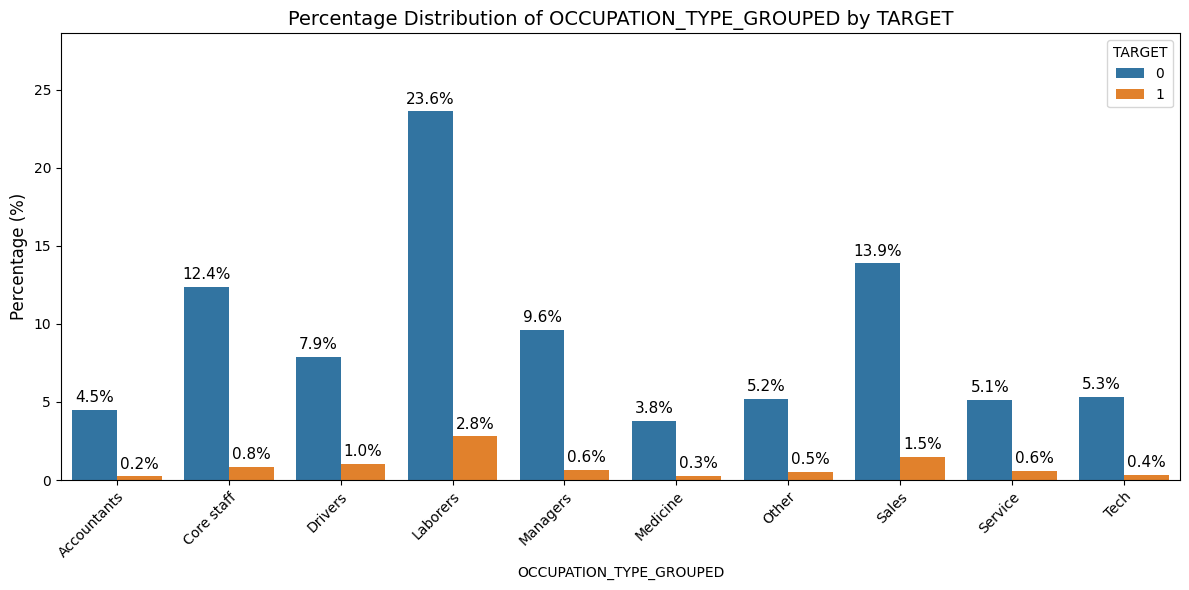

In [54]:
plot_category(train, 'OCCUPATION_TYPE_GROUPED')

Now, this graph is a little easier to read, and it is seen that few Home Credit customers are in medicine or are accountants. 

#### NAME_INCOME_TYPE

Exploring NAME_INCOME_TYPE
Missing number        0.0
Missing percentage    0.0
Name: NAME_INCOME_TYPE, dtype: float64 



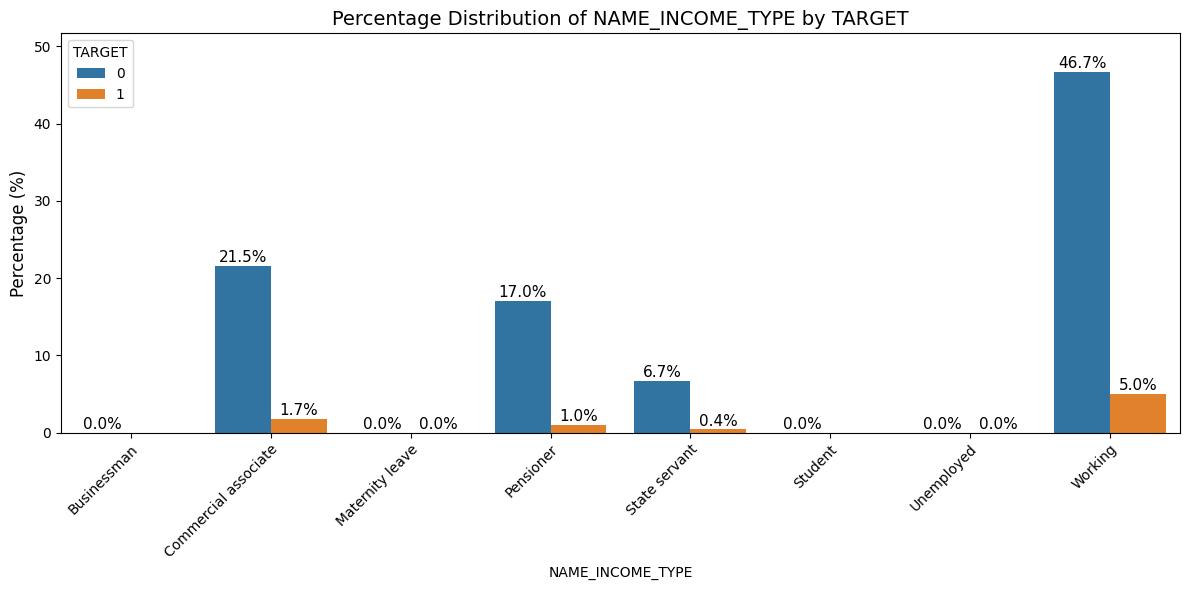

In [55]:
explore_category('NAME_INCOME_TYPE', is_missing, train)

No missing values are present in this variable. Most applicants are working, and some categories have barely any values (such as Maternity leave, student, or unemployed). These categories could be grouped together: 

In [56]:
group_map = {
    'Businessman': 'Other',
    'Commercial associate': 'Commercial associate',
    'Pensioner': 'Pensioner',
    'State servant': 'State servant',
    'Student': 'Other', 
    'Unemployed': 'Other',
    'Working': 'Working',
}
    
train['NAME_INCOME_TYPE_GROUPED'] = train['NAME_INCOME_TYPE'].map(group_map)

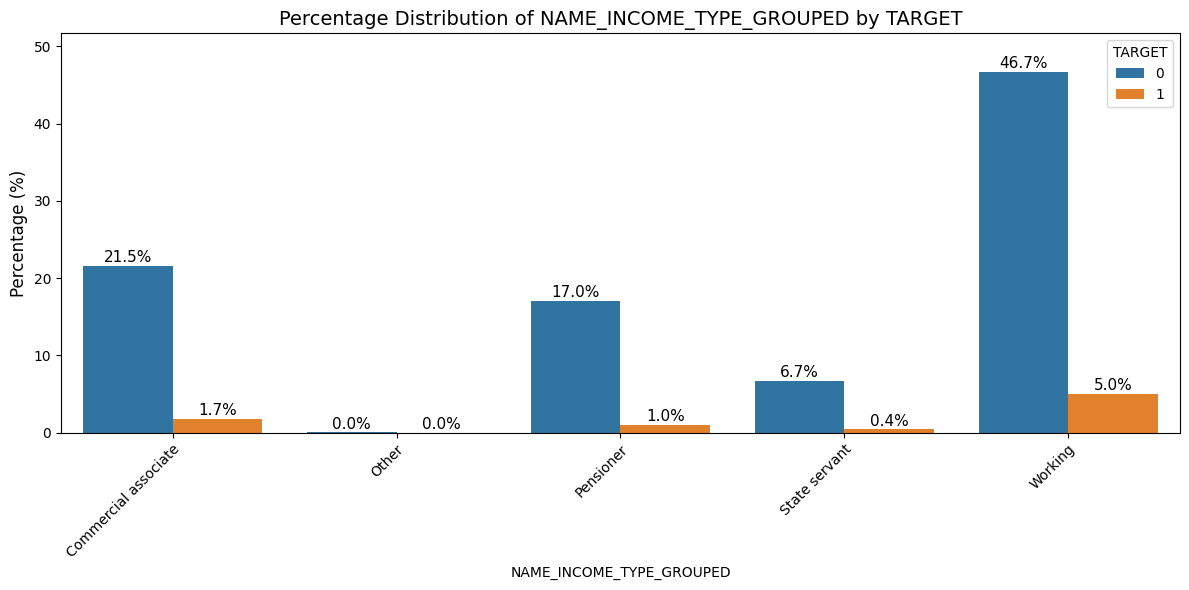

In [57]:
plot_category(train, 'NAME_INCOME_TYPE_GROUPED')

#### ORGANIZATION_TYPE

Exploring ORGANIZATION_TYPE
Missing number        0.0
Missing percentage    0.0
Name: ORGANIZATION_TYPE, dtype: float64 



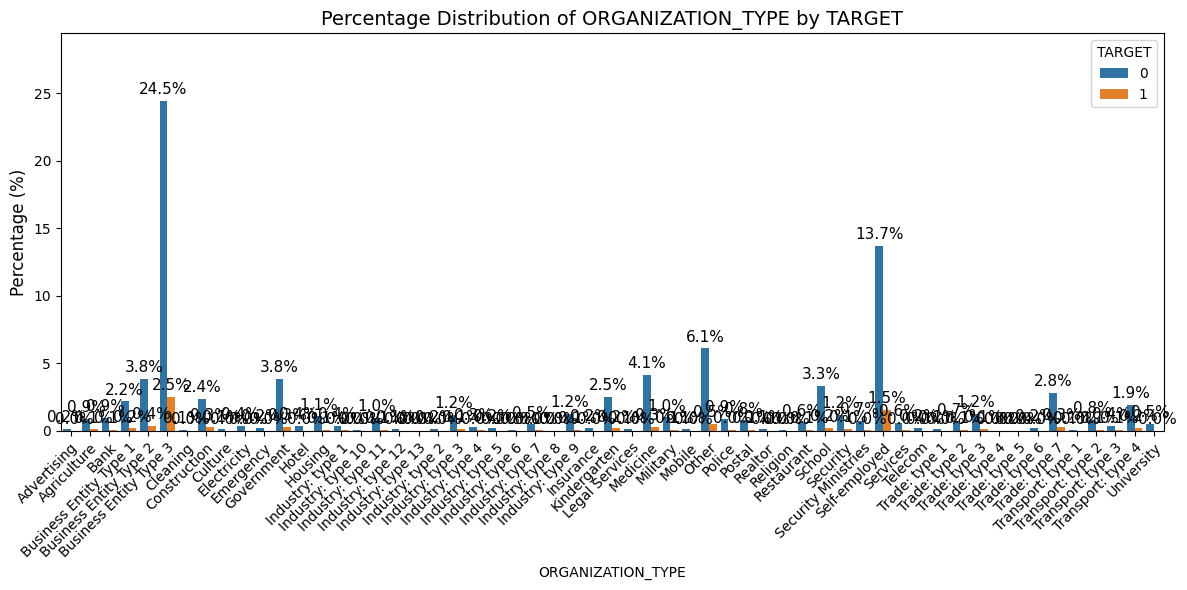

In [58]:
explore_category('ORGANIZATION_TYPE', is_missing, train)

This variable has about 18% missing values with many categories. To clean this up a bit, some of them can be grouped together:

In [59]:
group_map = {
    'Business Entity Type 3': 'Business',
    'Business Entity Type 2': 'Business',
    'Business Entity Type 1 ': 'Business',

    'XNA': 'Unknown', 
    'Self-employed': 'Self-employed',         
    'Other': 'Other',                  
    'Medicine': 'Public Sector',                
    'Government': 'Public Sector',                
    'School': 'Public Sector',  
    'Kindergarten': 'Public Sector',
    'Security Ministries': 'Public Sector',                  
    'Housing': 'Public Sector',
    'Military': 'Public Sector',
    'Police': 'Public Sector',
    'Postal': 'Public Sector',
    'Security Ministries': 'Public Sector',
    'University': 'Public Sector',
    'Emergency': 'Public Sector',

    'Trade: type 7': 'Trade',
    'Trade: type 6': 'Trade',
    'Trade: type 5': 'Trade',
    'Trade: type 4': 'Trade',
    'Trade: type 3': 'Trade',
    'Trade: type 2': 'Trade', 
    'Trade: type 1': 'Trade', 
    'Electricity ': 'Trade',        
    'Construction': 'Trade',              
  
    'Transport: type 4': 'Transport',
    'Transport: type 3': 'Transport',
    'Transport: type 2': 'Transport',
    'Transport: type 1': 'Transport',
    'Industry: type 13': 'Industry',
    'Industry: type 12 ': 'Industry',
    'Industry: type 10': 'Industry',
    'Industry: type 9': 'Industry',
    'Industry: type 8': 'Industry',
    'Industry: type 7': 'Industry', 
    'Industry: type 6': 'Industry',
    'Industry: type 5': 'Industry',
    'Industry: type 4 ': 'Industry',       
    'Industry: type 3': 'Industry', 
    'Industry: type 2 ': 'Industry',
    'Industry: type 1 ': 'Industry',      
    'Industry: type 11': 'Industry', 
    'Agriculture': 'Industry', 

    'Services ': 'Service',  
    'Hotel': 'Service',
    'Restaurant': 'Service',
    'Cleaning': 'Service',
    'Realtor': 'Service',
    'Legal Services': 'Service',
    'Advertising': 'Other',   
    'Religion': 'Other',
    'Culture': 'Other',
    'Bank': 'Finance',
    'Insurance': 'Finance',
    'Telecom': 'Other',
    'Mobile': 'Other'
}
    
train['ORGANIZATION_TYPE_GROUPED'] = train['ORGANIZATION_TYPE'].map(group_map)

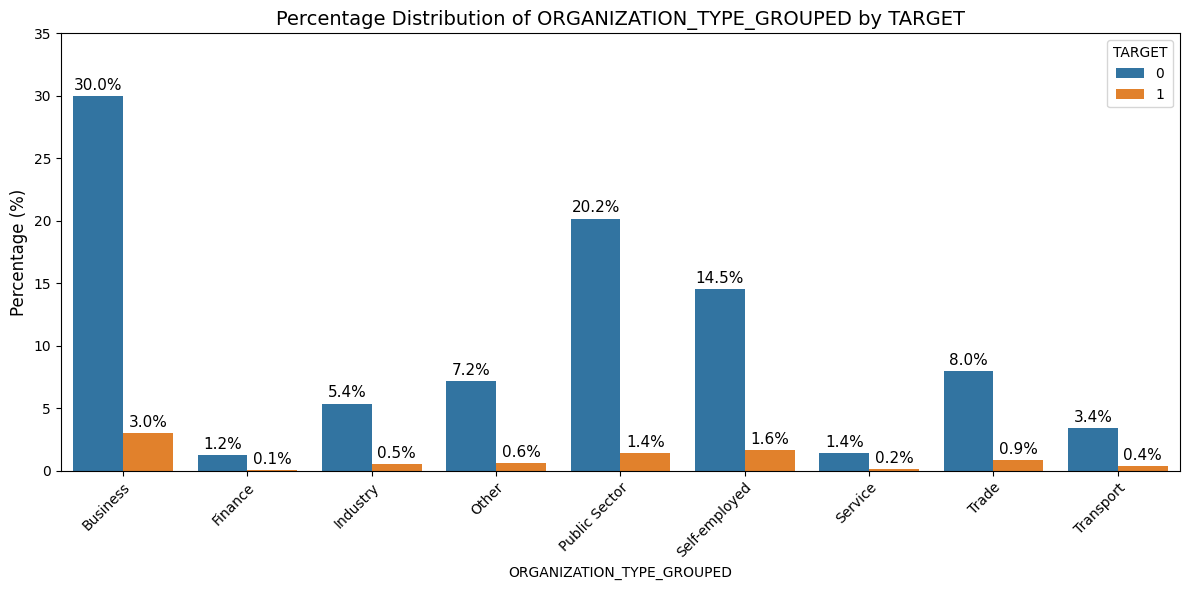

In [60]:
plot_category(train, 'ORGANIZATION_TYPE_GROUPED')

Most customers work in business, in the public sector, or are self-employed. Few customers work in finance, service, or transportation industries. No obvious patterns are seen for defaulting vs non-defaulting customers here.

#### DAYS_EMPLOYED

Exploring DAYS_EMPLOYED
Missing number        0.0
Missing percentage    0.0
Name: DAYS_EMPLOYED, dtype: float64 



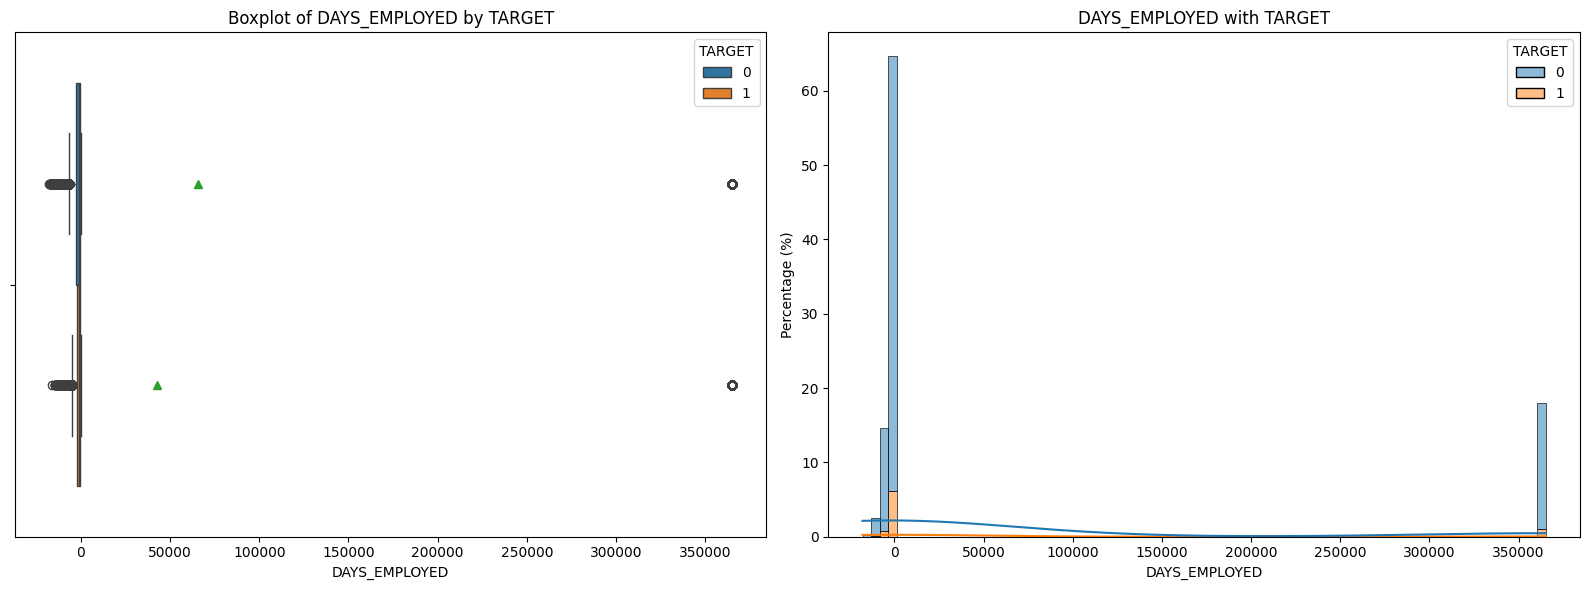

In [61]:
explore_numerical('DAYS_EMPLOYED', is_missing, train)

There are some outliers present (with a value of 365243, which is 1000 years and completely unrealistic). These will be replaced with NaN, as these extremely high values could be an indicator for missing data, and changed into years for more accessible visualizations: 

In [62]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace(365243, np.nan)
train['YEARS_EMPLOYED'] = train['DAYS_EMPLOYED'] / -365

Looking at missing values in this variable: 

In [63]:
print('Percentage of missing values in YEARS_EMPLOYED', train['YEARS_EMPLOYED'].isna().sum()/ train.shape[0] * 100)

Percentage of missing values in YEARS_EMPLOYED 18.00716071945394


About 18% of values are missing for this variable. Now, looking at the distribution of this variable: 

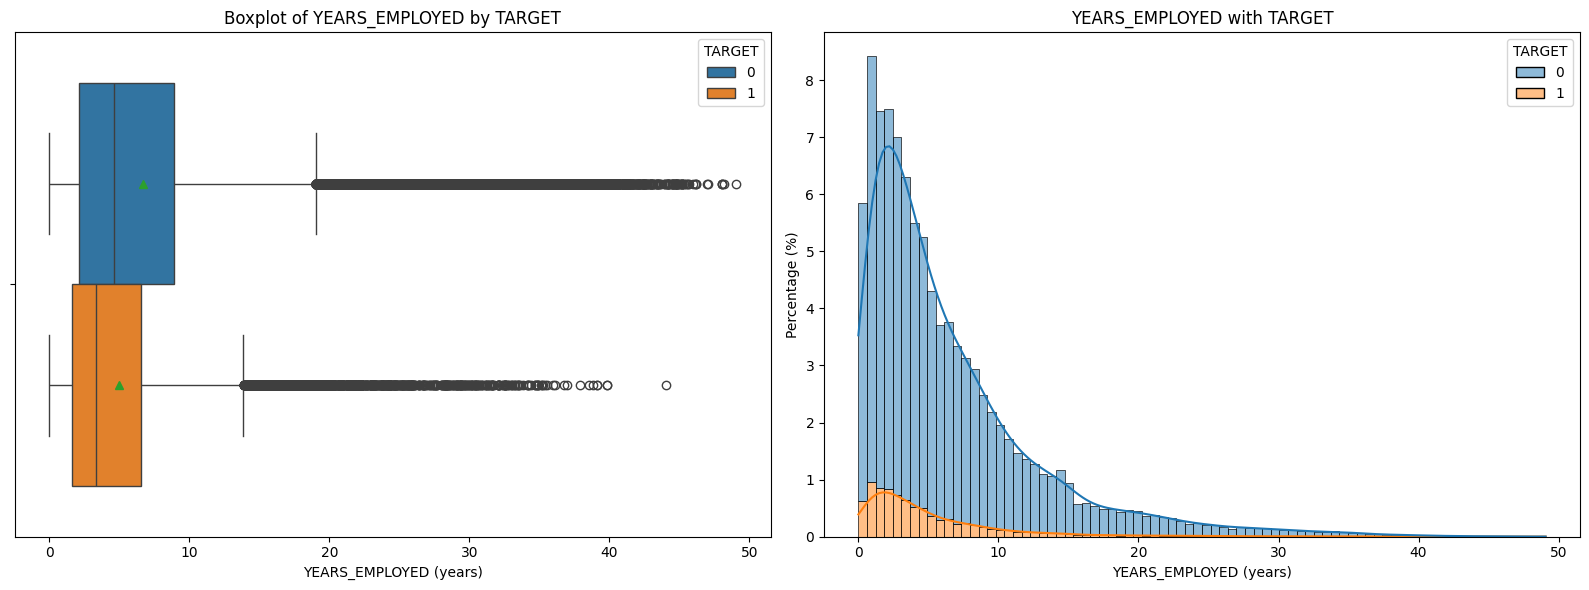

In [64]:
fix, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=train, x='YEARS_EMPLOYED', hue='TARGET', showmeans=True, ax=axes[0]).set(title=f'Boxplot of YEARS_EMPLOYED by TARGET', xlabel=f'YEARS_EMPLOYED (years)');
plot_numerical(train, 'YEARS_EMPLOYED', 80, axes[1], 'YEARS_EMPLOYED (years)')
plt.tight_layout()
plt.show()


This is a unimodal distribution, with a wider spread for those who have not defaulted on their loan. Most people have been employed for about 5-10 years, with quite a few outliers for people who have been employed for much longer.

### Stability features

A few variables describe a customer's similarity between work, permanent, and contact addresses: 

* If a client's contact and work address do not match (LIVE_CITY_NOT_WORK_CITY), 
* If a client's permanent address and work address do not match (REG_CITY_NOT_WORK_CITY), and
* If a client's permanent address does not match their contact address (REG_CITY_NOT_LIVE_CITY).

 In addition, some variables show the amount of time since the customer last changed certain documents: 
 - The time since they last changed their phone (DAYS_LAST_PHONE_CHANGE), 
 - The time since they last changed their registration (DAYS_REGISTRATION), and
 - The time since they last changed their ID (DAYS_ID_PUBLISH). 

 Finally, the FLAG_DOCUMENT_3 (if the client provided document 3) and FLAG_EMP_PHONE (if the client provided their work phone number or not) variables were flagged to have correlations with the TARGET variable during the correlation section, and will be examined.

 These variables could be an indication of stability for a customer.



#### LIVE_CITY_NOT_WORK_CITY

Exploring LIVE_CITY_NOT_WORK_CITY
Missing number        0.0
Missing percentage    0.0
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64 



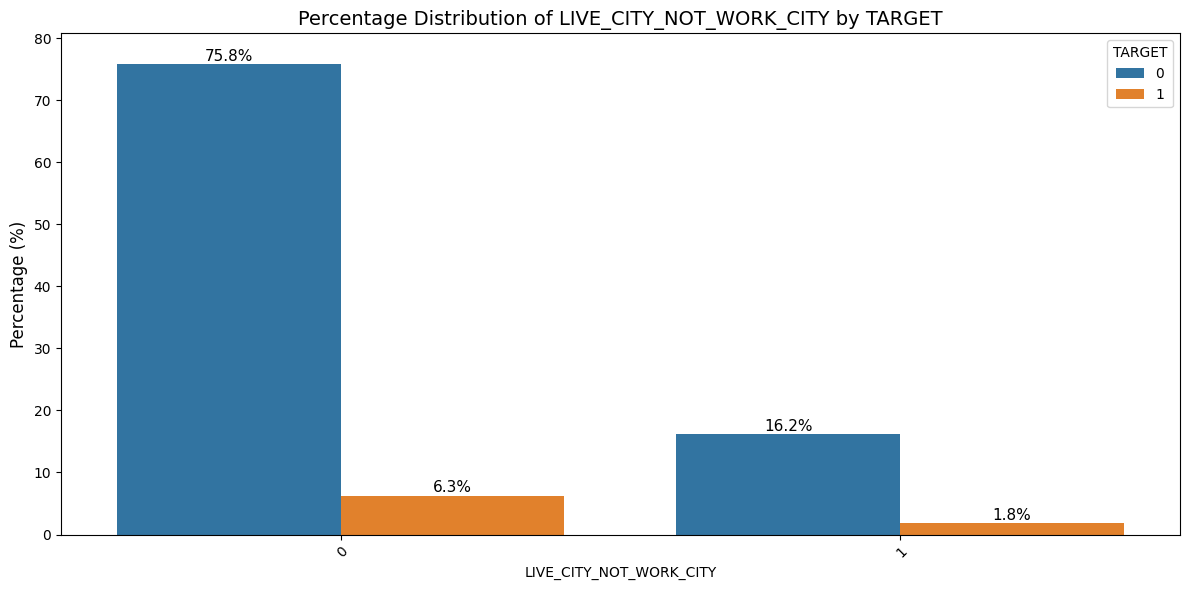

In [65]:
explore_category('LIVE_CITY_NOT_WORK_CITY', is_missing, train)

Over 80% of customer's contact address and work address are in the same city. 

#### REG_CITY_NOT_WORK_CITY

Exploring REG_CITY_NOT_WORK_CITY
Missing number        0.0
Missing percentage    0.0
Name: REG_CITY_NOT_WORK_CITY, dtype: float64 



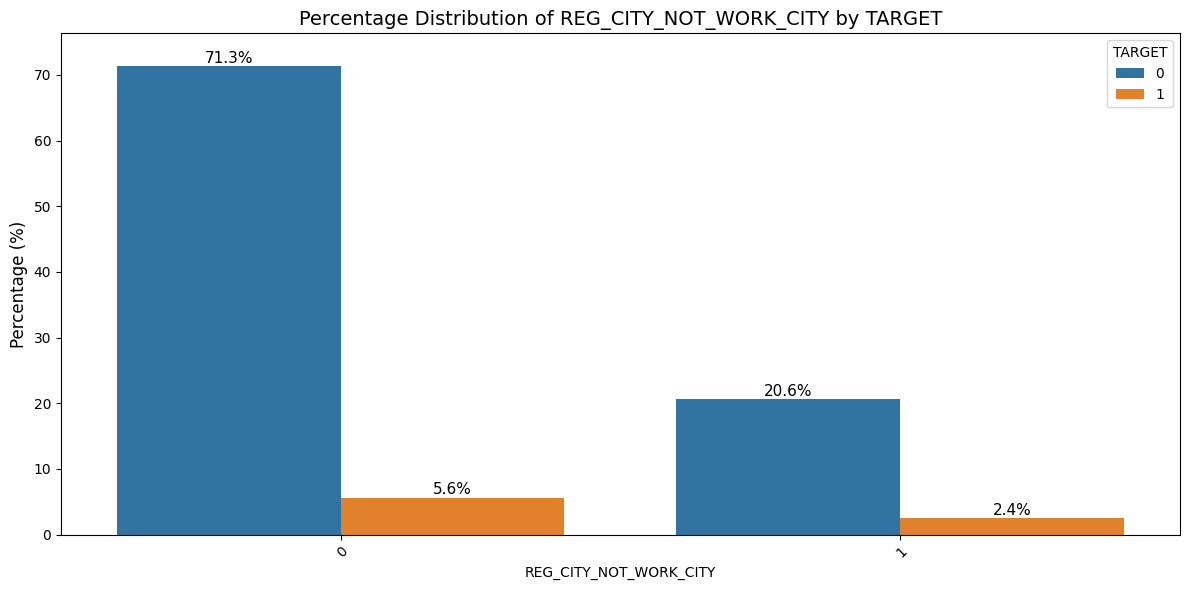

In [66]:
explore_category('REG_CITY_NOT_WORK_CITY', is_missing, train)

A little over three quarters of customers have the same city for their permanent address and work address. 

#### REG_CITY_NOT_LIVE_CITY

Exploring REG_CITY_NOT_LIVE_CITY
Missing number        0.0
Missing percentage    0.0
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64 



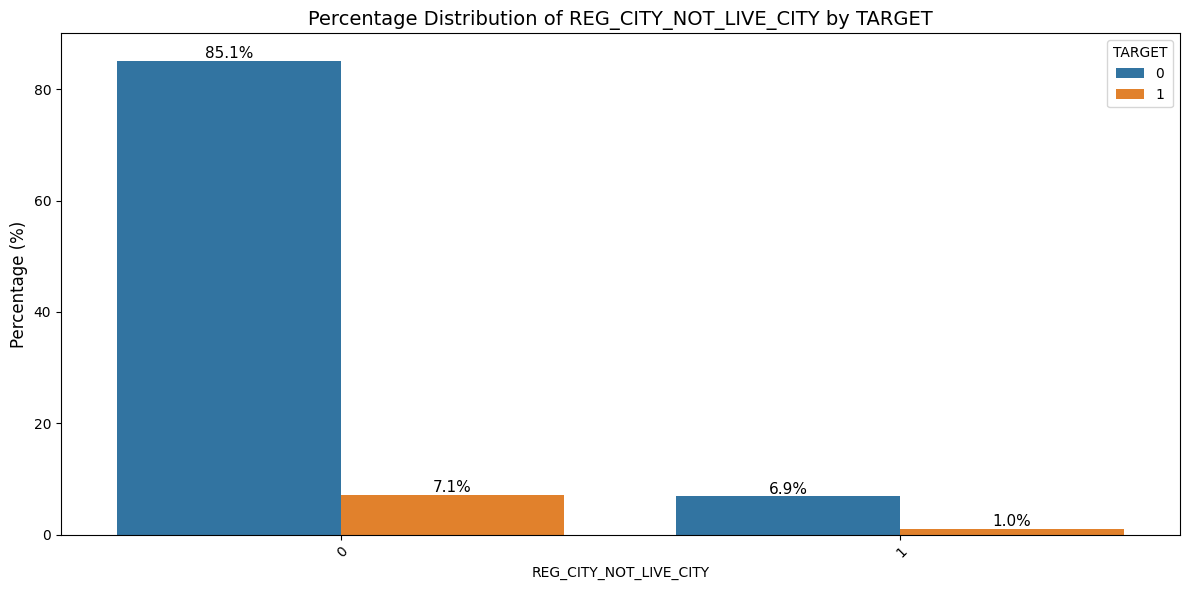

In [67]:
explore_category('REG_CITY_NOT_LIVE_CITY', is_missing, train)

Very few customers have their contact and permanent addresses in different cities.

#### DAYS_LAST_PHONE_CHANGE

Exploring DAYS_LAST_PHONE_CHANGE
Missing number        1.000000
Missing percentage    0.000325
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64 



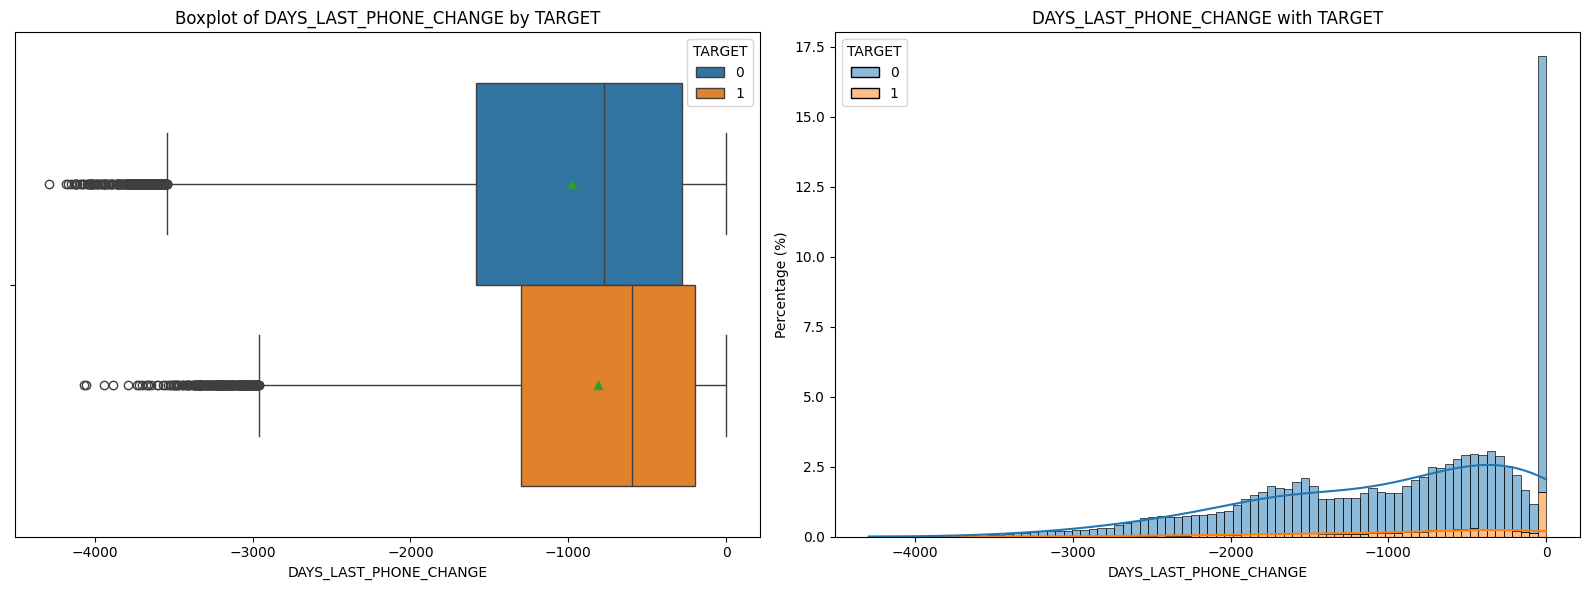

In [68]:
explore_numerical('DAYS_LAST_PHONE_CHANGE', is_missing, train)

This will be more easily understood in terms of years: 

In [69]:
train['YEARS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE'] / -365

Looking at missing values:

In [70]:
print('Percentage of missing values in YEARS_LAST_PHONE_CHANGE', train['YEARS_LAST_PHONE_CHANGE'].isna().sum()/ train.shape[0] * 100)

Percentage of missing values in YEARS_LAST_PHONE_CHANGE 0.00032519161916159093


Barely any missing values are present in this variable. Now, looking at this variable's distribution: 

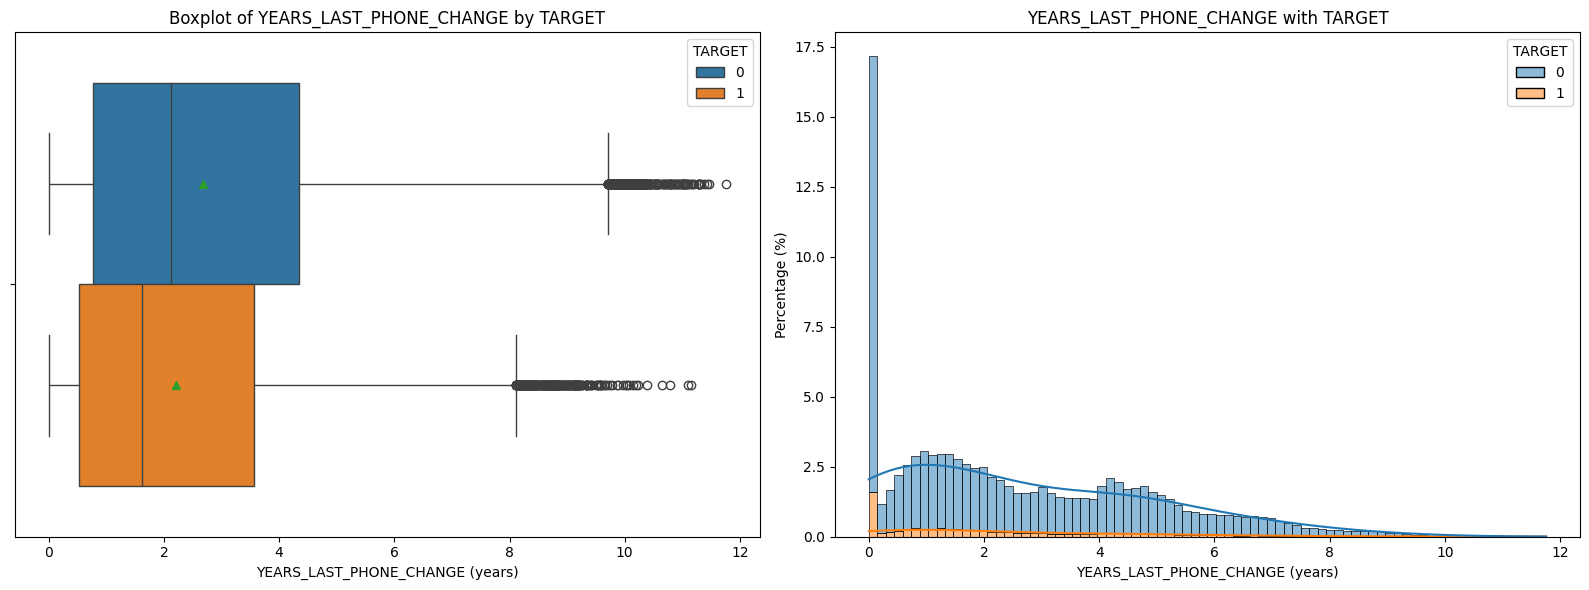

In [71]:
fix, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=train, x='YEARS_LAST_PHONE_CHANGE', hue='TARGET', showmeans=True, ax=axes[0]).set(title=f'Boxplot of YEARS_LAST_PHONE_CHANGE by TARGET', xlabel=f'YEARS_LAST_PHONE_CHANGE (years)');
plot_numerical(train, 'YEARS_LAST_PHONE_CHANGE', 80, axes[1], 'YEARS_LAST_PHONE_CHANGE (years)')
plt.tight_layout()
plt.show()

Most customers changed their phone in the year preceding their loan application. The distribution is right tailed, with a slightly lower 25-50th percentile for the customers who defaulted on their loan. 

#### DAYS_REGISTRATION

Exploring DAYS_REGISTRATION
Missing number        0.0
Missing percentage    0.0
Name: DAYS_REGISTRATION, dtype: float64 



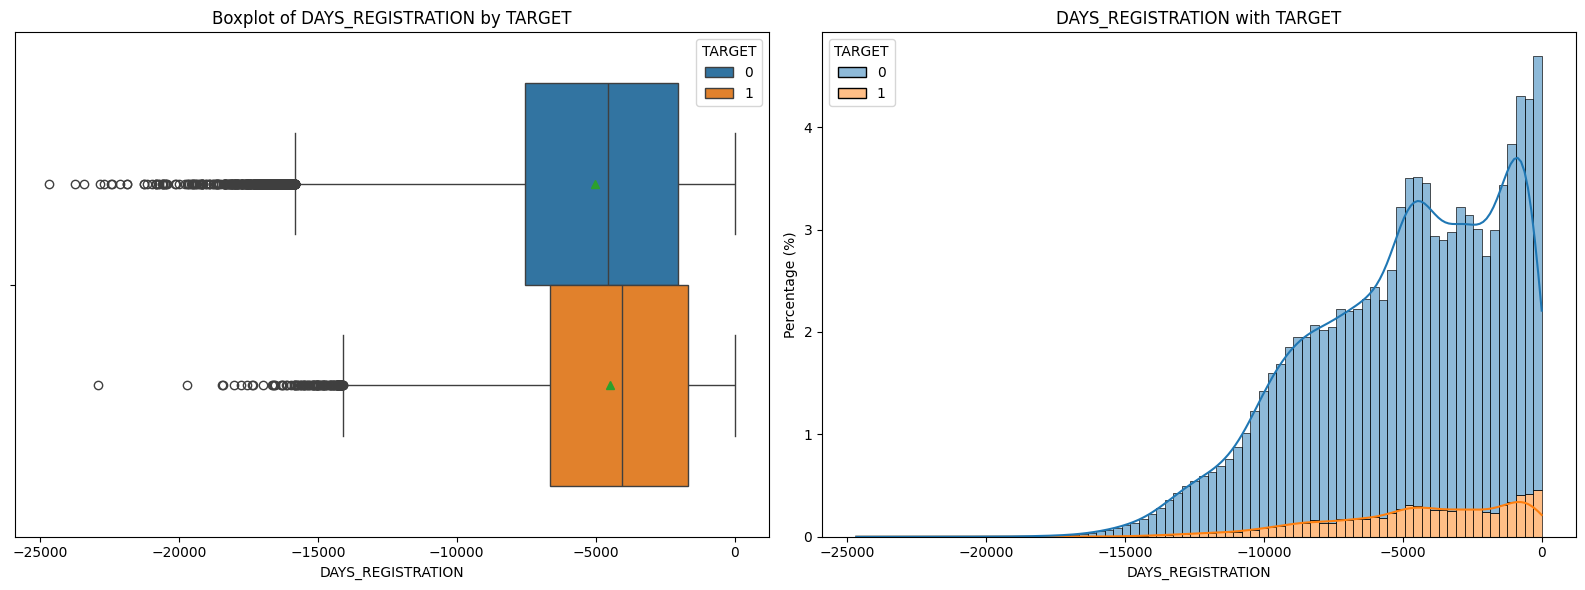

In [72]:
explore_numerical('DAYS_REGISTRATION', is_missing, train)

This will be more easily understood in terms of years: 

In [73]:
train['YEARS_REGISTRATION'] = train['DAYS_REGISTRATION'] / -365

Looking at missing values:

In [74]:
print('Percentage of missing values in YEARS_REGISTRATION', train['YEARS_REGISTRATION'].isna().sum()/ train.shape[0] * 100)

Percentage of missing values in YEARS_REGISTRATION 0.0


No missing values are present in this variable. Now, looking at this variable's distribution: 

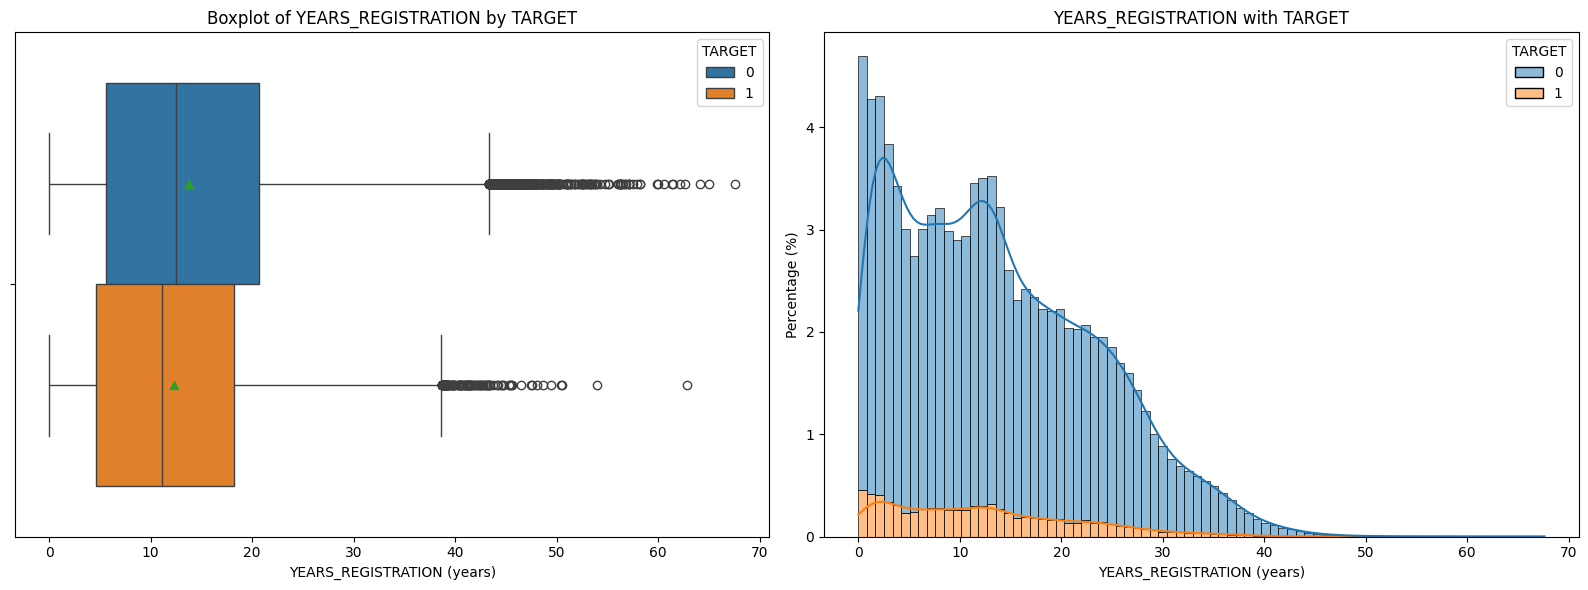

In [75]:
fix, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=train, x='YEARS_REGISTRATION', hue='TARGET', showmeans=True, ax=axes[0]).set(title=f'Boxplot of YEARS_REGISTRATION by TARGET', xlabel=f'YEARS_REGISTRATION (years)');
plot_numerical(train, 'YEARS_REGISTRATION', 80, axes[1], 'YEARS_REGISTRATION (years)')
plt.tight_layout()
plt.show()

The distribution for registration change date is bimodal and right tailed, with a slightly lower 25-50th percentile for the customers who defaulted on their loan. More outliers seem to be present for customers who did not default on their loan than for customers who did. 

#### DAYS_ID_PUBLISH

Exploring DAYS_ID_PUBLISH
Missing number        0.0
Missing percentage    0.0
Name: DAYS_ID_PUBLISH, dtype: float64 



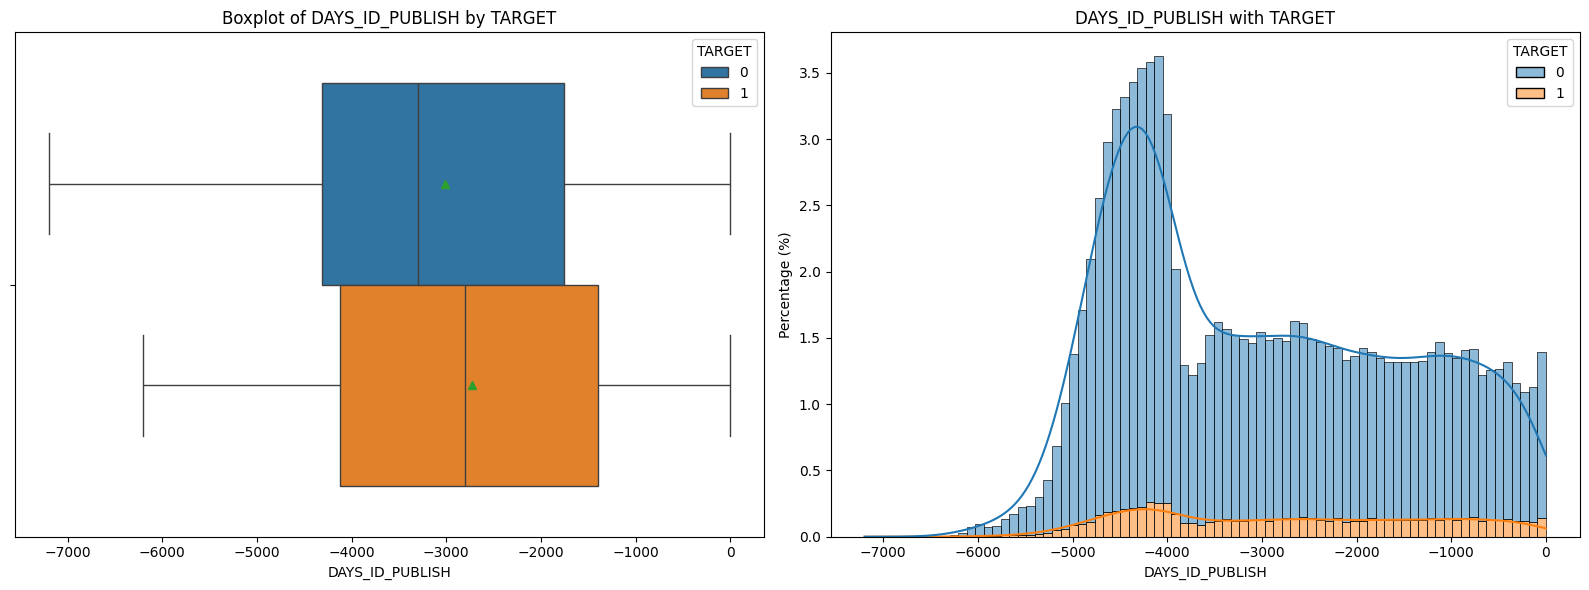

In [76]:
explore_numerical('DAYS_ID_PUBLISH', is_missing, train)

This will be more easily understood in terms of years: 

In [77]:
train['YEARS_ID_PUBLISH'] = train['DAYS_ID_PUBLISH'] / -365

Looking at missing values:

In [78]:
print('Percentage of missing values in YEARS_ID_PUBLISH', train['YEARS_ID_PUBLISH'].isna().sum()/ train.shape[0] * 100)

Percentage of missing values in YEARS_ID_PUBLISH 0.0


No missing values are present in this variable. Now, looking at this variable's distribution: 

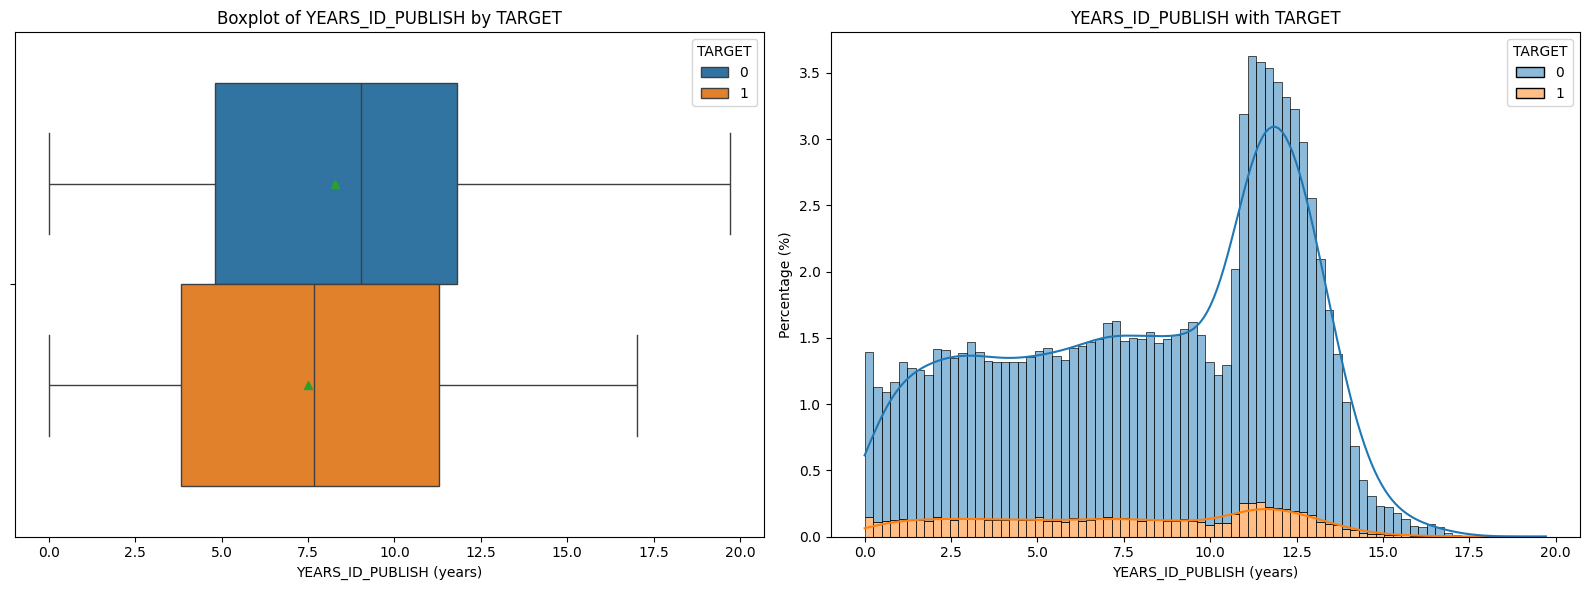

In [79]:
fix, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=train, x='YEARS_ID_PUBLISH', hue='TARGET', showmeans=True, ax=axes[0]).set(title=f'Boxplot of YEARS_ID_PUBLISH by TARGET', xlabel=f'YEARS_ID_PUBLISH (years)');
plot_numerical(train, 'YEARS_ID_PUBLISH', 80, axes[1], 'YEARS_ID_PUBLISH (years)')
plt.tight_layout()
plt.show()

The distribution has a narrow peak between 10-13 years, with a slight right tail. Statistical analysis will indicate if a significant difference between target groups is present.

#### FLAG_DOCUMENT_3

Exploring FLAG_DOCUMENT_3
Missing number        0.0
Missing percentage    0.0
Name: FLAG_DOCUMENT_3, dtype: float64 



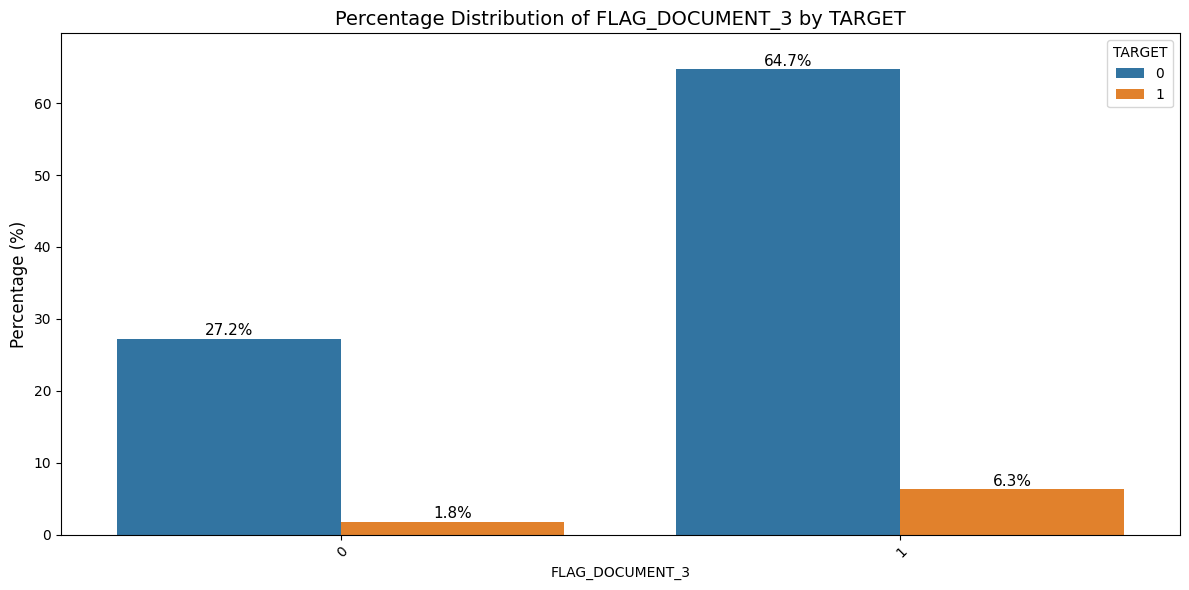

In [80]:
explore_category('FLAG_DOCUMENT_3', is_missing, train)

Most customers did provide document 3.

#### FLAG_EMP_PHONE

Exploring FLAG_EMP_PHONE
Missing number        0.0
Missing percentage    0.0
Name: FLAG_EMP_PHONE, dtype: float64 



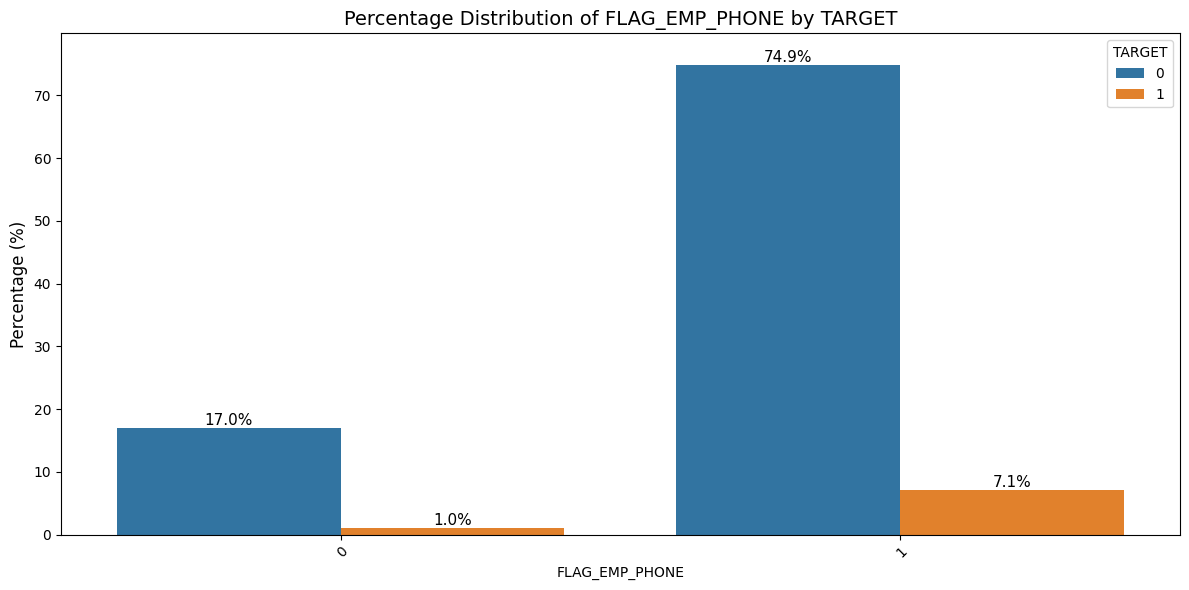

In [81]:
explore_category('FLAG_EMP_PHONE', is_missing, train)

Most customers did provide their work phone number on their application.

### Financial and loan information

Variables to explore relating to a customer's financial and loan information include: 
* Total income, 
* Amout of credit on the loan, 
* Price of goods the loan was used for, 
* The annuity on the loan, 
* The contract type, 
* The number of inquiries to the Credit Bureau one year before a client's application


#### AMT_INCOME_TOTAL

This variable shows the total monthly income of a client. The exact currency and country from where this data originates is not shared in the data description, and is therefore not included in this analysis. 

Exploring AMT_INCOME_TOTAL
Missing number        0.0
Missing percentage    0.0
Name: AMT_INCOME_TOTAL, dtype: float64 



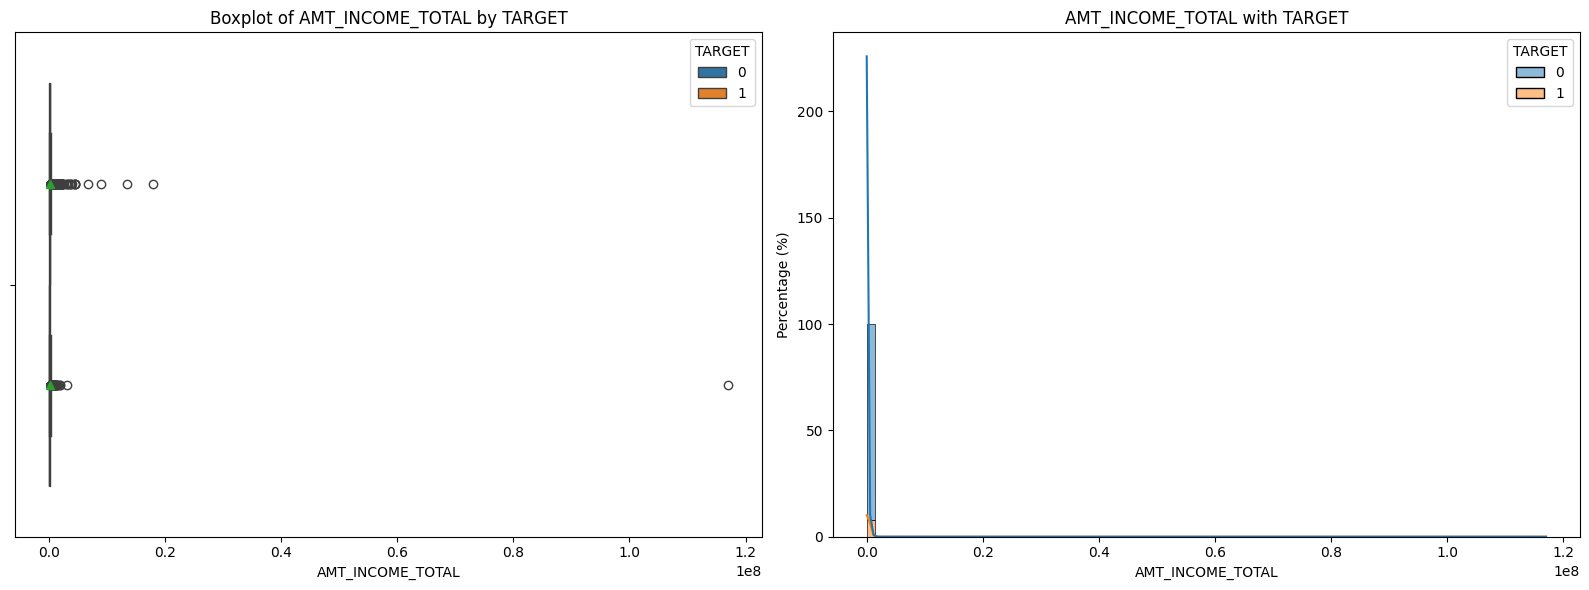

In [82]:
explore_numerical('AMT_INCOME_TOTAL', is_missing, train)

One extreme outlier seems to be present, which likely represents an unrealistic income. This could be an error in data entry, and will be capped at the 99th percentile: 

In [83]:
upper_limit = train['AMT_INCOME_TOTAL'].quantile(0.99)
train['AMT_INCOME_TOTAL'] = train['AMT_INCOME_TOTAL'].clip(upper=upper_limit)

Exploring AMT_INCOME_TOTAL
Missing number        0.0
Missing percentage    0.0
Name: AMT_INCOME_TOTAL, dtype: float64 



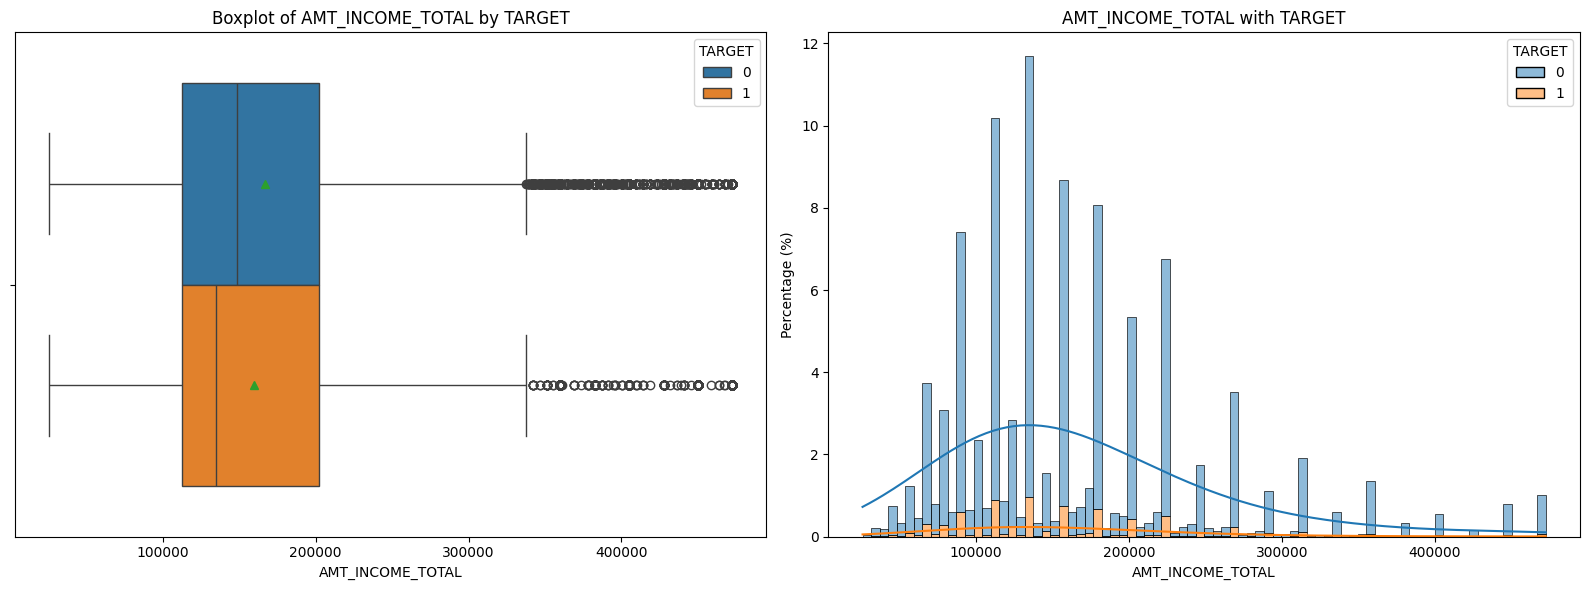

In [84]:
explore_numerical('AMT_INCOME_TOTAL', is_missing, train)

50% of Home Credit customers make between 112 500 and 202 500 of their currency per month. The distribution for this variable is also skewed to the right, with a fairly unimodal distribution and no significant differenct between the two target groups. 

#### AMT_CREDIT

This variable indicates the amount of credit on the loan.

Exploring AMT_CREDIT
Missing number        0.0
Missing percentage    0.0
Name: AMT_CREDIT, dtype: float64 



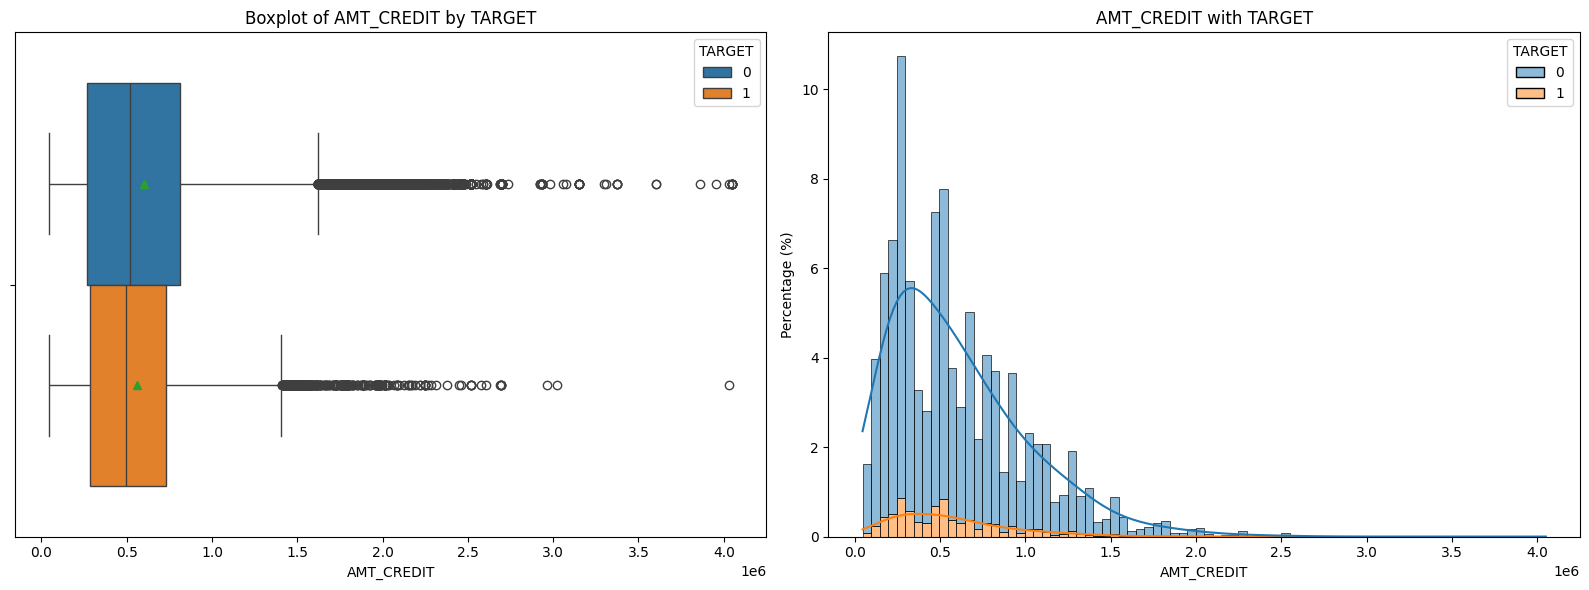

In [85]:
explore_numerical('AMT_CREDIT', is_missing, train)

Generally, customers obtain a loan for 270 000 - 806 500 CURRENCY. No missing values are present for this variable, as it represents the credit amount of the loan that was given. No notable difference is seen between the defaulting and non-defaulting distributions, though the non-defaulting group seems to have more outliers at higher values.

#### AMT_GOODS_PRICE

This variable is the price of goods that the loan was used for.

Exploring AMT_GOODS_PRICE
Missing number        278.000000
Missing percentage      0.090403
Name: AMT_GOODS_PRICE, dtype: float64 



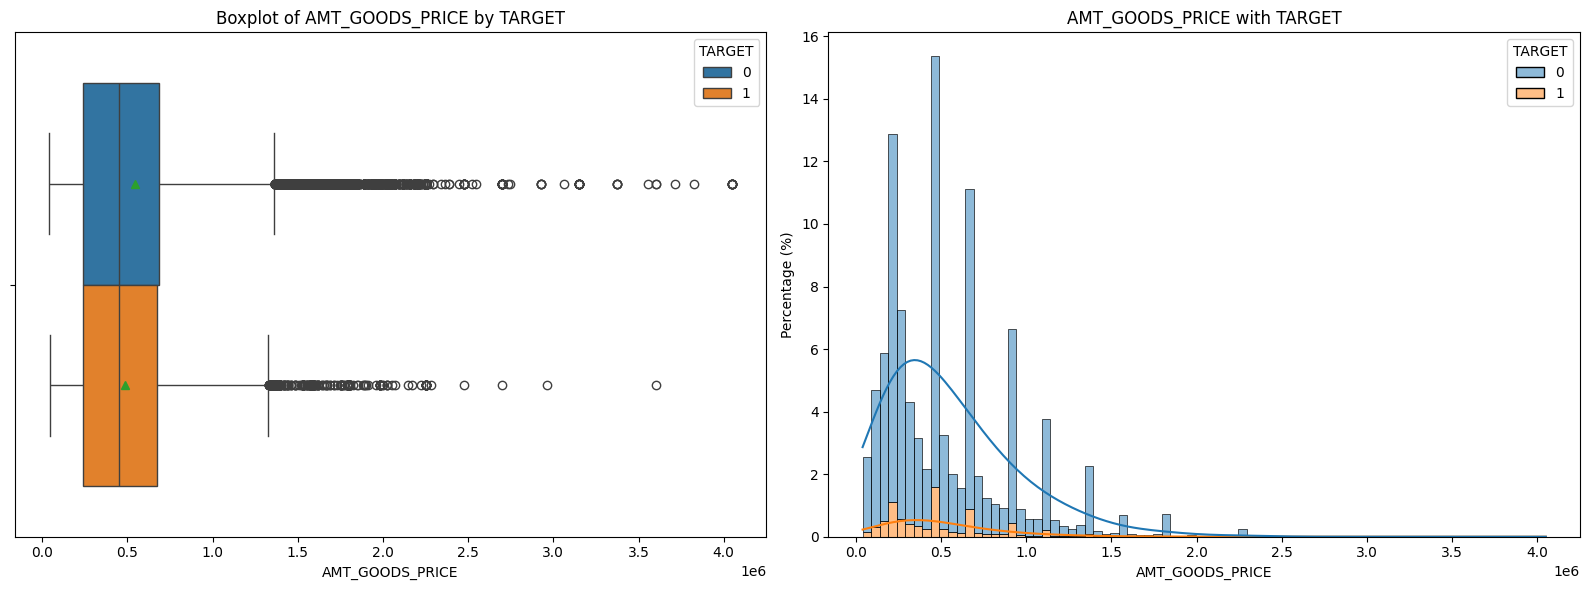

In [86]:
explore_numerical('AMT_GOODS_PRICE', is_missing, train)

This variable represents the cost of consumer goods that a customer applied for a loan to obtain. Barely any missing values are present for this variable, and the distribution seems to follow a unimodal distribution with a right tail. Slightly more outliers are present for applicants who did not default on their loans.

#### AMT_ANNUITY

This is a variable showing the loan's annuity: 

Exploring AMT_ANNUITY
Missing number        12.000000
Missing percentage     0.003902
Name: AMT_ANNUITY, dtype: float64 



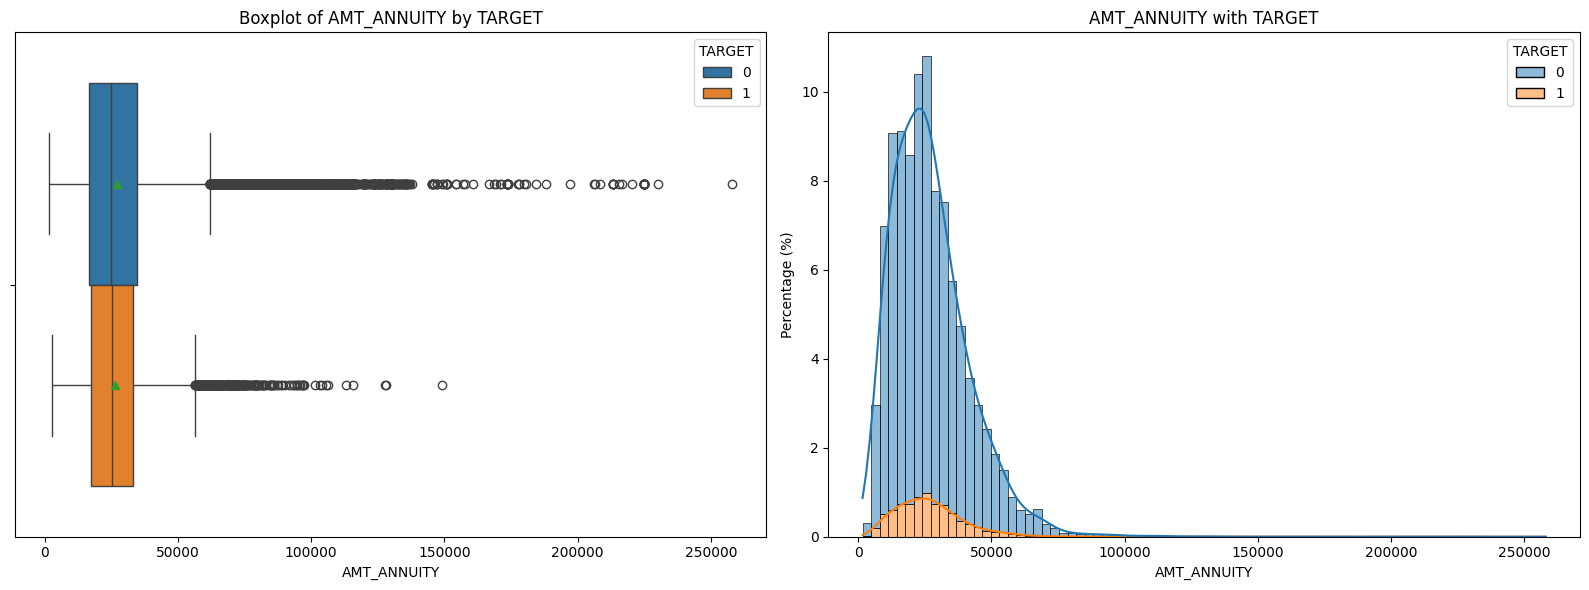

In [87]:
explore_numerical('AMT_ANNUITY', is_missing, train)

Barely any missing values are present in this variable either. This variable has a fairly narrow distribution with a long right tail, especially for non-loan-defaulters. 

#### NAME_CONTRACT_TYPE

This is merely an indicator variable which shows the type of loan: 

Exploring NAME_CONTRACT_TYPE
Missing number        0.0
Missing percentage    0.0
Name: NAME_CONTRACT_TYPE, dtype: float64 



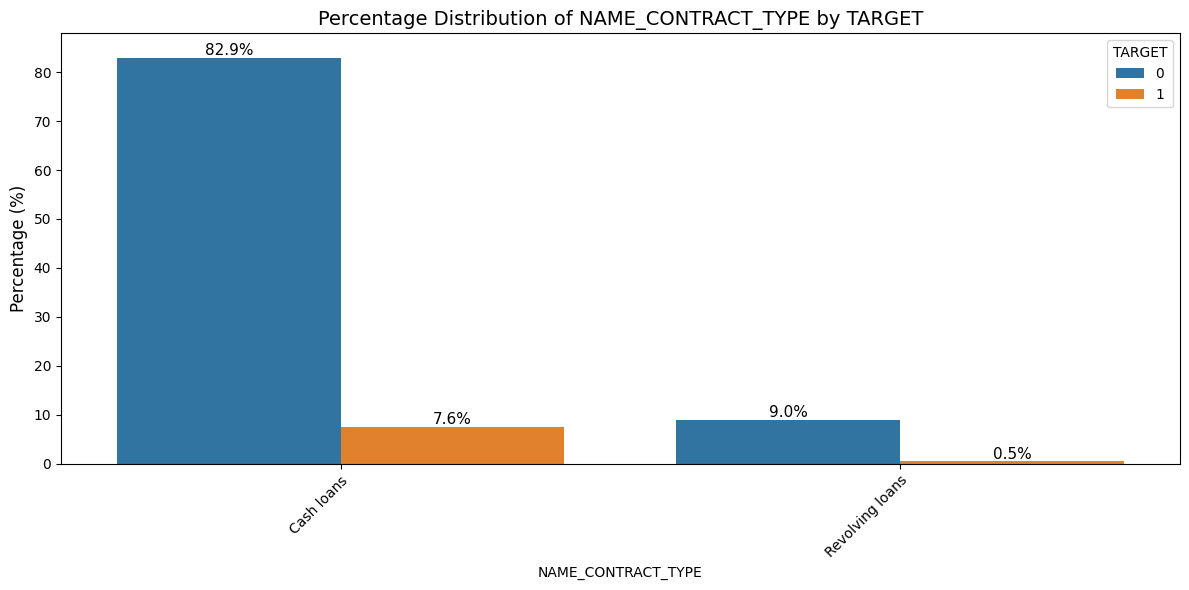

In [88]:
explore_category('NAME_CONTRACT_TYPE', is_missing, train)


Applicants mostly receive cash loans.

#### AMT_REQ_CREDIT_BUREAU_YEAR

This group of variables AMT_REQ_CREDIT_BUREAU_* shows the number of enquiries about a client to the Credit Bureau in the given time span before the loan application was received. For brevity, only the _YEAR variable is examined here: 

Exploring AMT_REQ_CREDIT_BUREAU_YEAR
Missing number        41519.000000
Missing percentage       13.501631
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64 



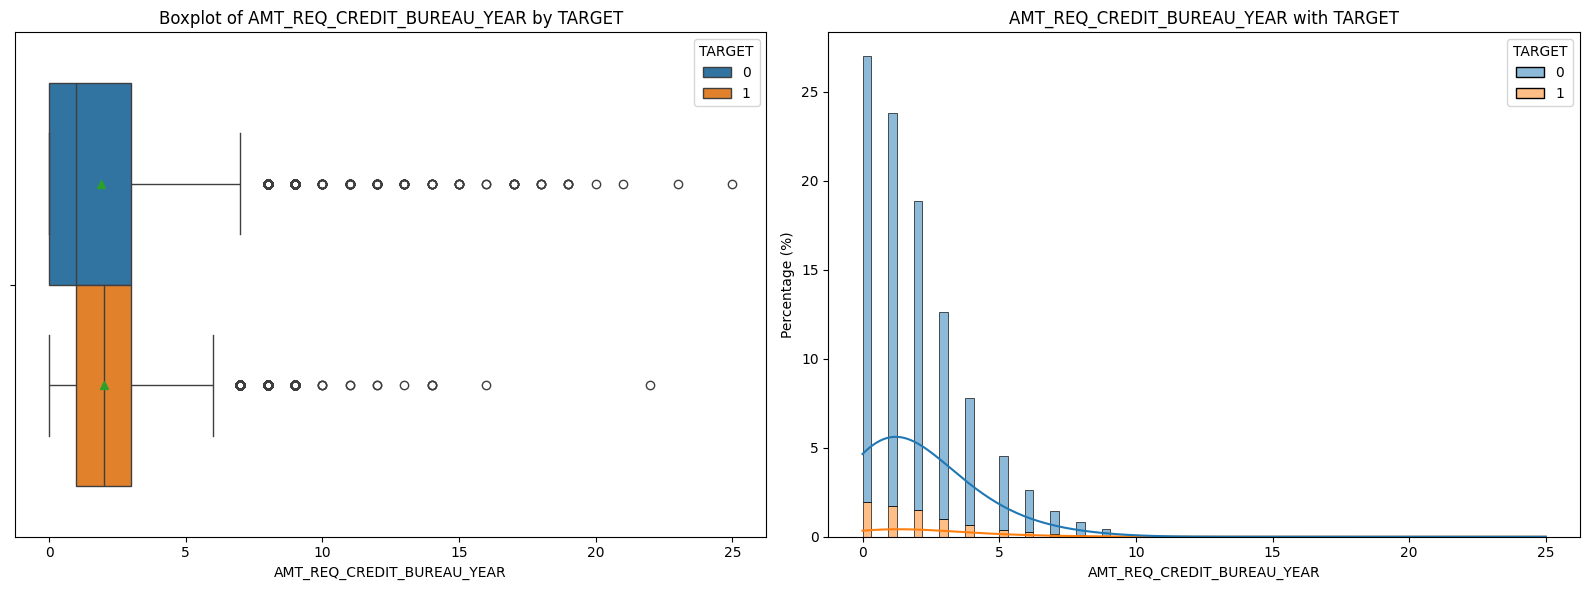

In [89]:
explore_numerical('AMT_REQ_CREDIT_BUREAU_YEAR', is_missing, train)

Generally no more than two enquiries are made to the credit bureau a year before the client applies to a loan. About 13% of this data is missing. Customers who have defaulted on their loan tend to have a smaller range than those who have not defaulted with 1-3 enquiries in the year preceding the loan application. 



### External risk sources

This group of variables external scores for each customer (EXT_SOURCE_*), and Home Credit's rating of the region where each client lives. 

#### EXT_SOURCE_1, _2, _3

These three variables indicate a customer's normalized credit score from an external source.

Exploring EXT_SOURCE_1
Missing number        173378.000000
Missing percentage        56.381073
Name: EXT_SOURCE_1, dtype: float64 



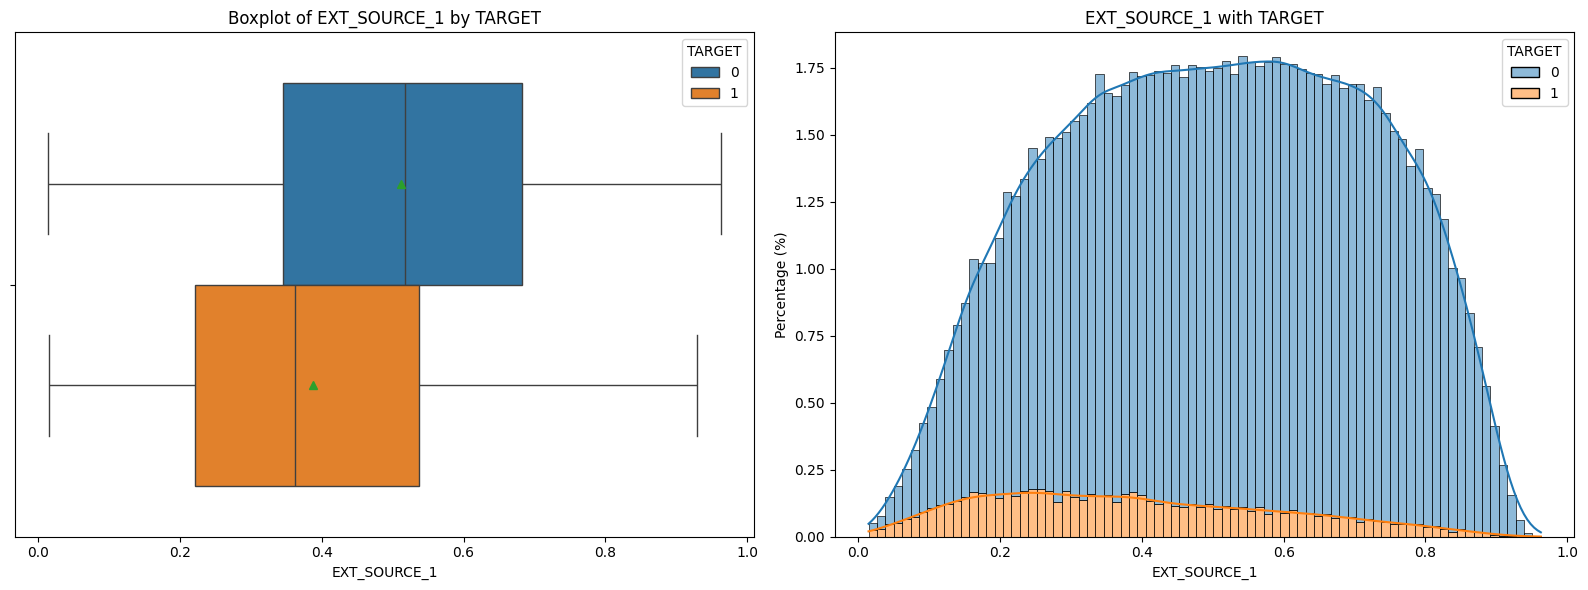

In [90]:
explore_numerical('EXT_SOURCE_1', is_missing, train)

56% of the entries in this normalized variable are missing. It seems that customers who default on their loans generally have lower scores.

Exploring EXT_SOURCE_2
Missing number        660.000000
Missing percentage      0.214626
Name: EXT_SOURCE_2, dtype: float64 



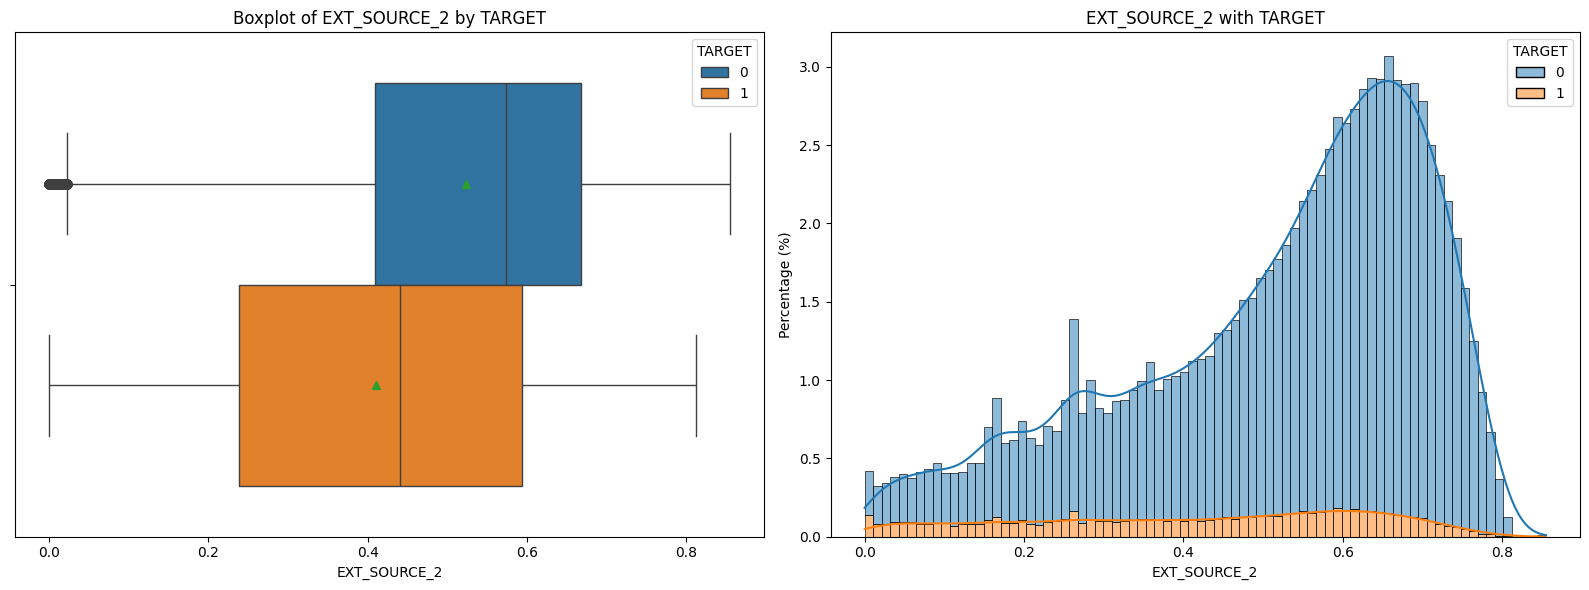

In [91]:
explore_numerical('EXT_SOURCE_2', is_missing, train)

Barealy any missing values are present for this variable. Generally, those who do not default on their loan have higher scores, in a more narrow regrion (about 0.4-0.65). This variable has a left tailed distribution for non-defaulters. The default rate seems farly constant up to about a score of 0.62, where it drops. Customers with with lower normalized score_2 also seem to default more than those with higher scores (above 0.6). 

Exploring EXT_SOURCE_3
Missing number        60965.000000
Missing percentage       19.825307
Name: EXT_SOURCE_3, dtype: float64 



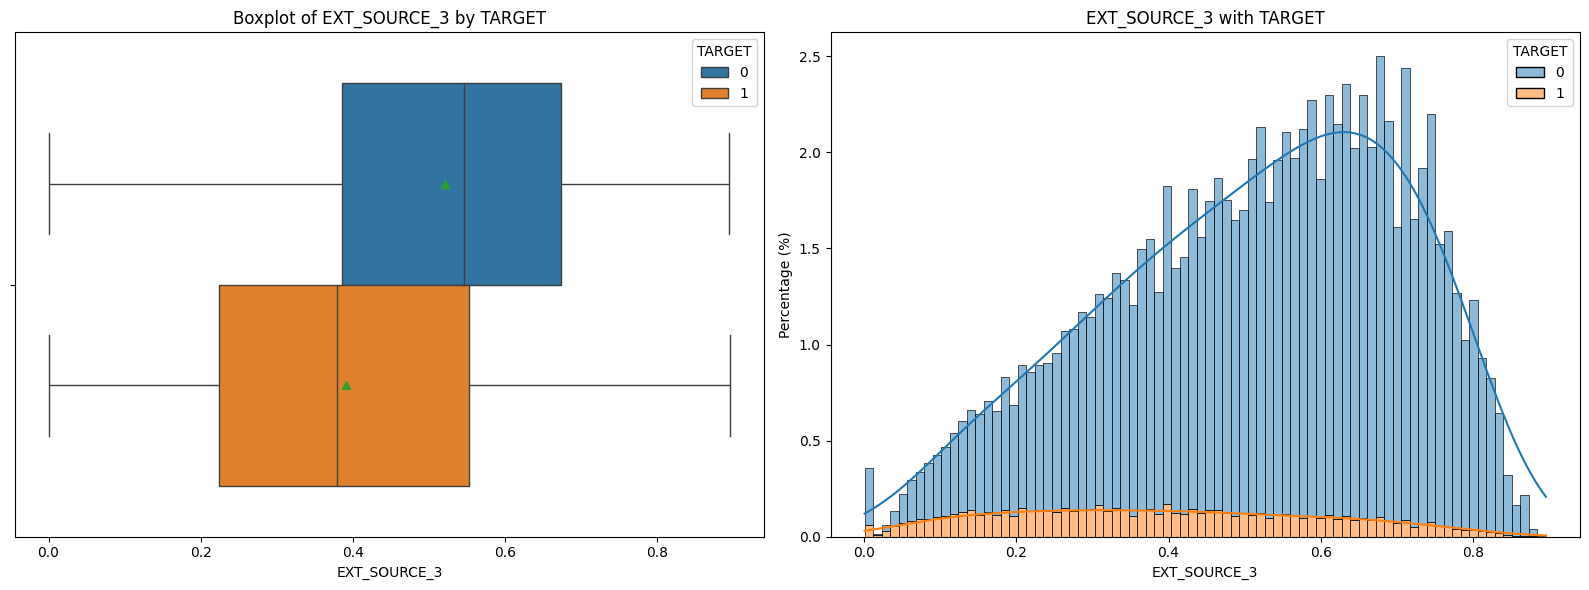

In [92]:
explore_numerical('EXT_SOURCE_3', is_missing, train)

This variable has about 20% of entries missing, with a similar tendency to the EXT_SOURCE_2 and EXT_SOURCE_1 boxplot shapes. Barely any defaulting clients have very high scores (over 0.8). 



#### REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT

These two variables are an internal rating system between 1 and 3 of the client's current region: 

Exploring REGION_RATING_CLIENT_W_CITY
Missing number        0.0
Missing percentage    0.0
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64 



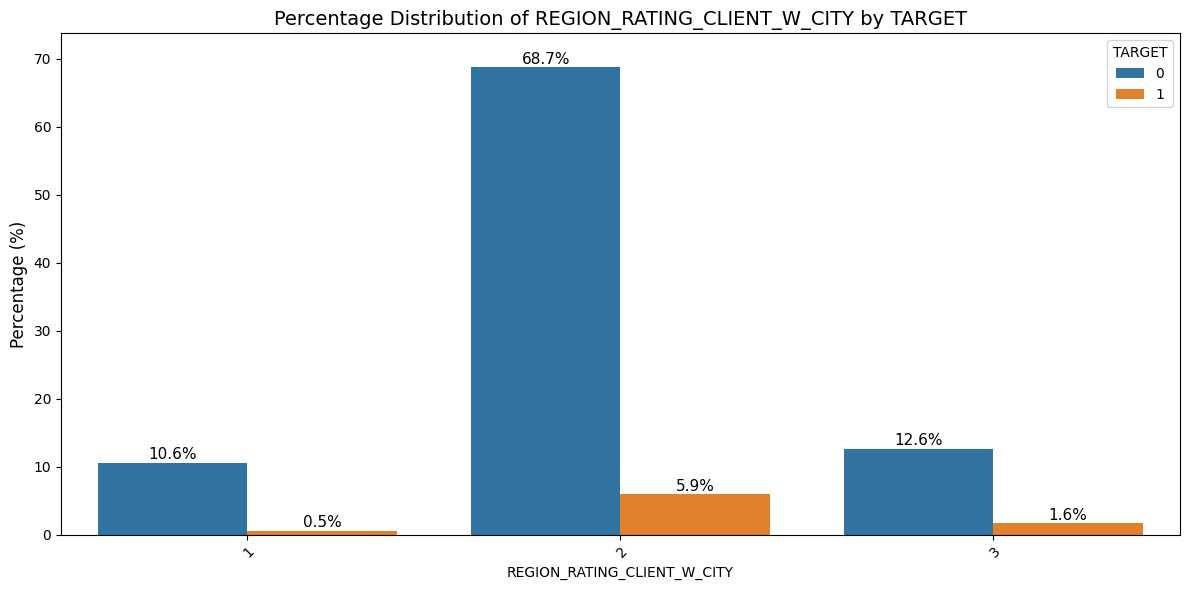

In [93]:
explore_category('REGION_RATING_CLIENT_W_CITY', is_missing, train)

Exploring REGION_RATING_CLIENT
Missing number        0.0
Missing percentage    0.0
Name: REGION_RATING_CLIENT, dtype: float64 



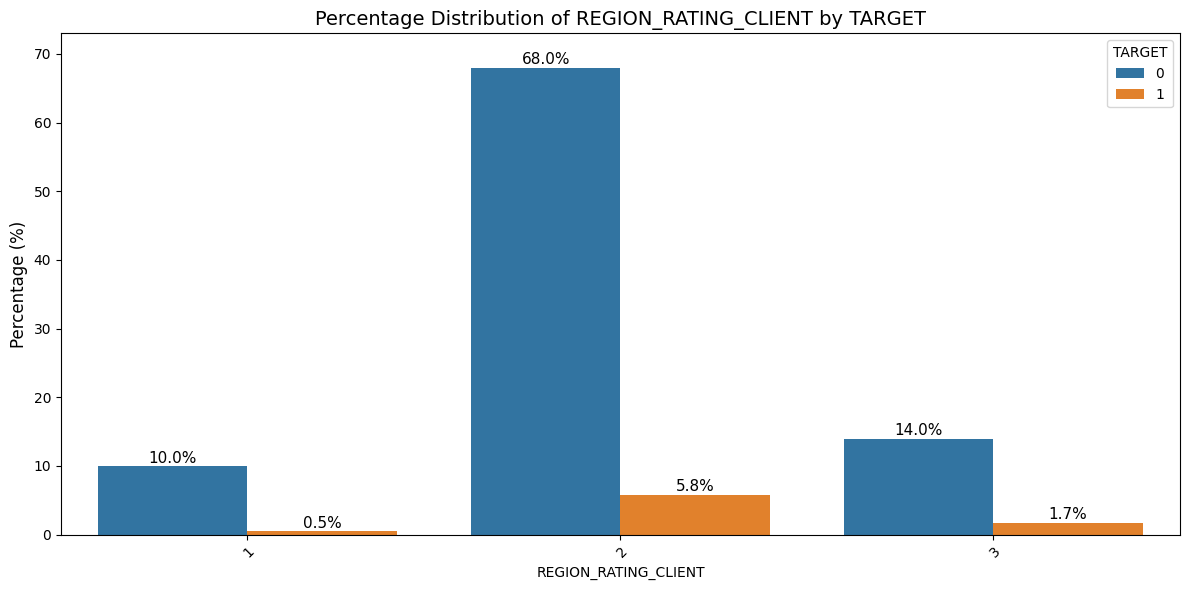

In [94]:
explore_category('REGION_RATING_CLIENT', is_missing, train)

No missing values are present in either of these variables, and the distribution of these variables looks essential the same. Most people live in region 2.

### Client's building information

Quite a few variables are present in this dataset that indicate normalized information about the building where a client lives. A few of these are chosen to examine here, including the housing type, the building's area, number of elevators and apartments.

#### NAME_HOUSING_TYPE

Exploring NAME_HOUSING_TYPE
Missing number        0.0
Missing percentage    0.0
Name: NAME_HOUSING_TYPE, dtype: float64 



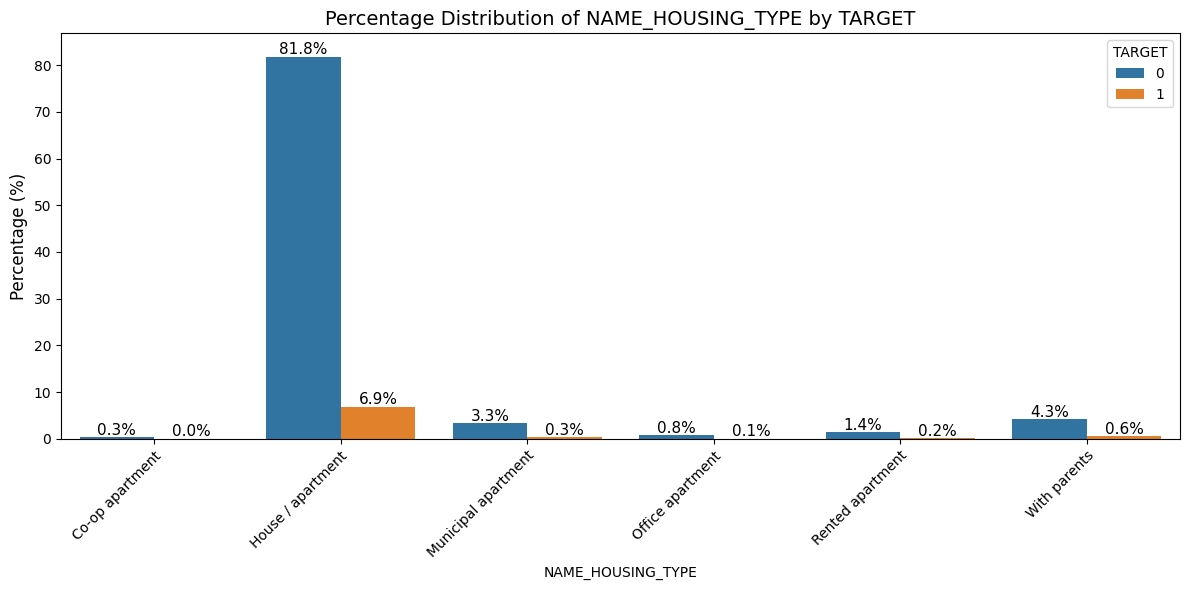

In [95]:
explore_category('NAME_HOUSING_TYPE', is_missing, train)

Most people live in a house or apartment.

#### TOTALAREA

Exploring TOTALAREA_MODE
Missing number        148431.000000
Missing percentage        48.268517
Name: TOTALAREA_MODE, dtype: float64 



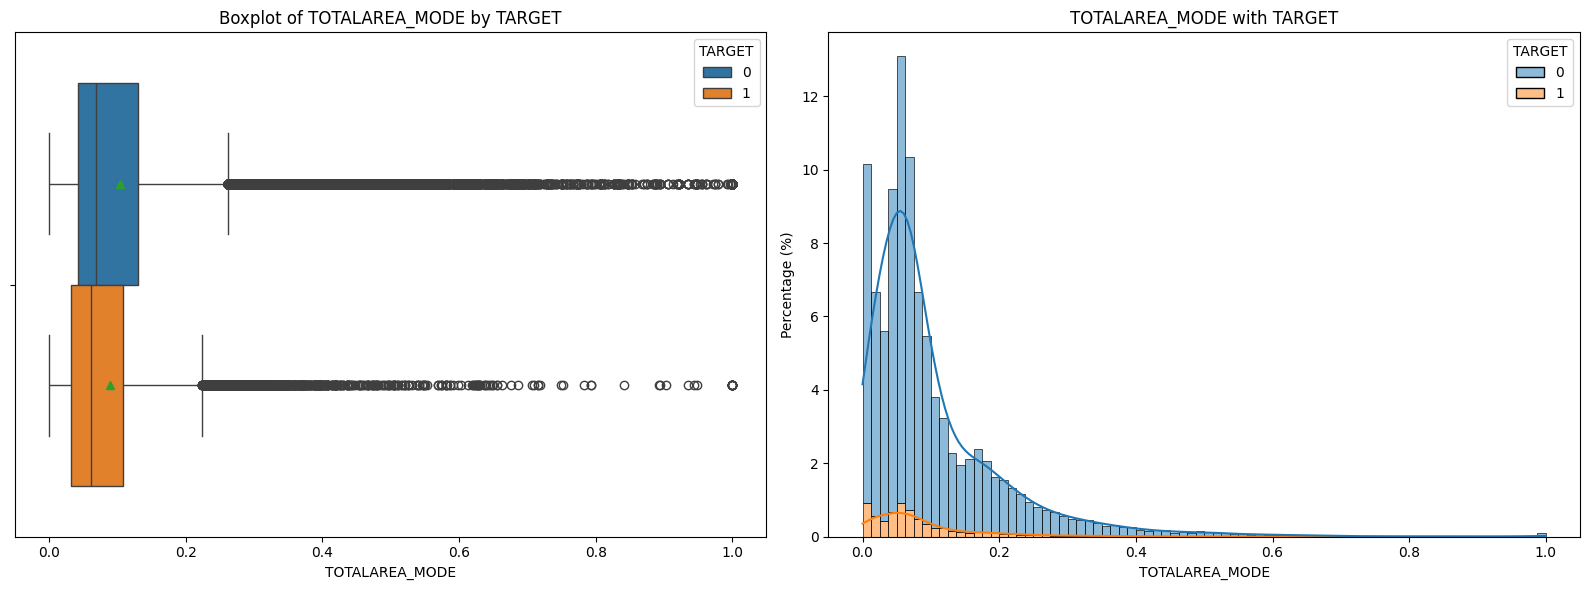

In [96]:
explore_numerical('TOTALAREA_MODE', is_missing, train)

#### FLOORSMAX

The floorsmax variables were identified to have a slight relationship with the target variable, and are explored here: 

Exploring FLOORSMAX_AVG
Missing number        153020.000000
Missing percentage        49.760822
Name: FLOORSMAX_AVG, dtype: float64 



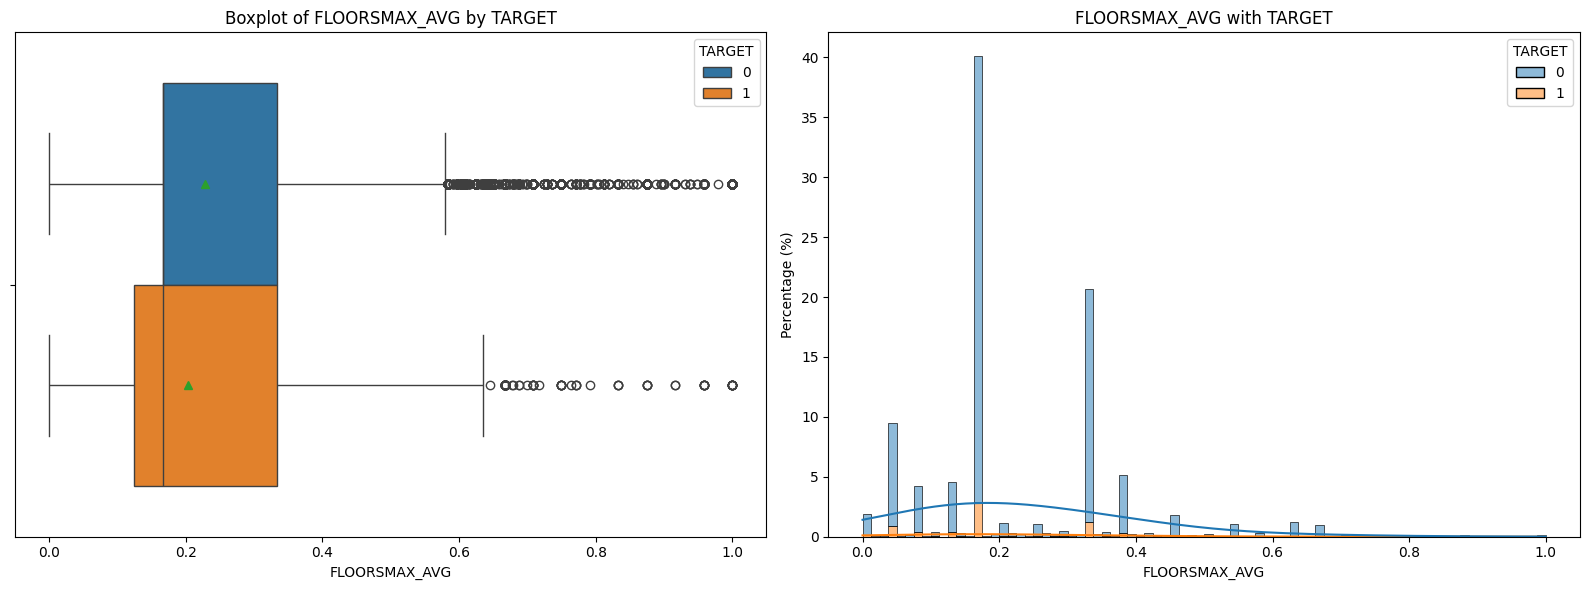

In [97]:
explore_numerical('FLOORSMAX_AVG', is_missing, train)

Exploring FLOORSMAX_MEDI
Missing number        153020.000000
Missing percentage        49.760822
Name: FLOORSMAX_MEDI, dtype: float64 



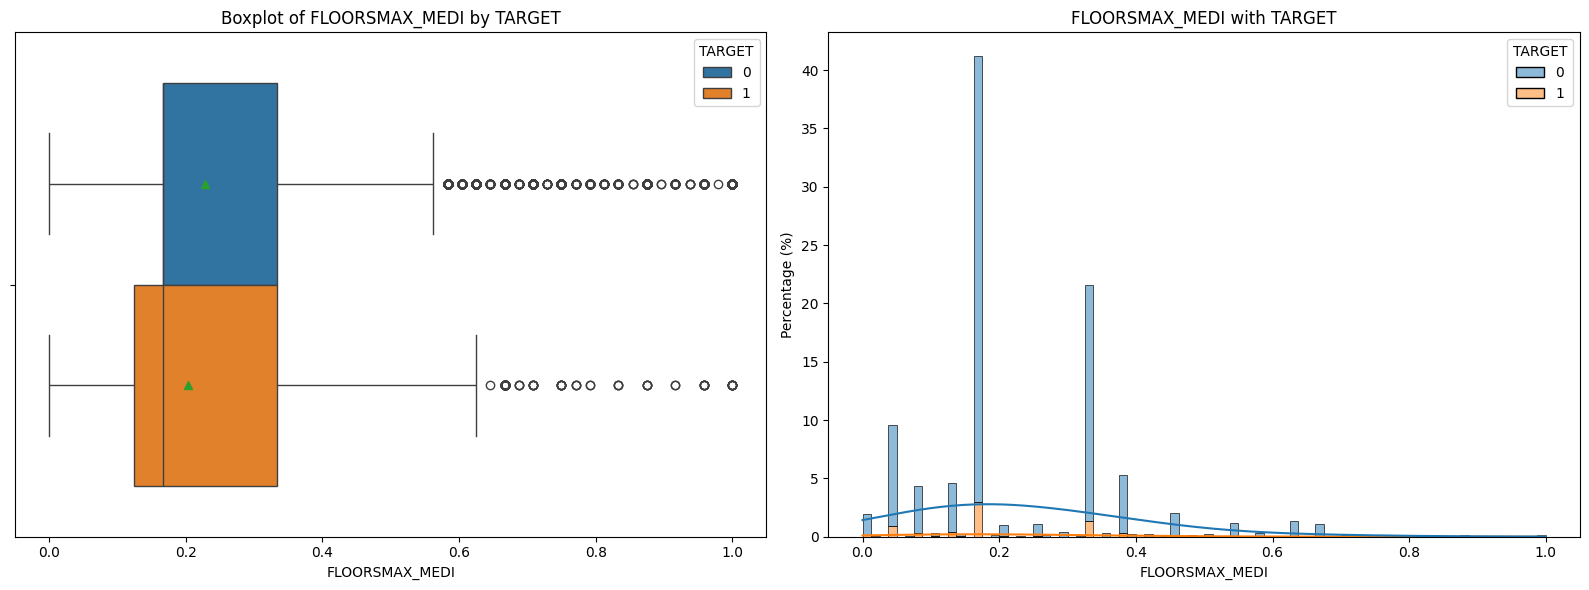

In [98]:
explore_numerical('FLOORSMAX_MEDI', is_missing, train)

Exploring FLOORSMAX_MODE
Missing number        153020.000000
Missing percentage        49.760822
Name: FLOORSMAX_MODE, dtype: float64 



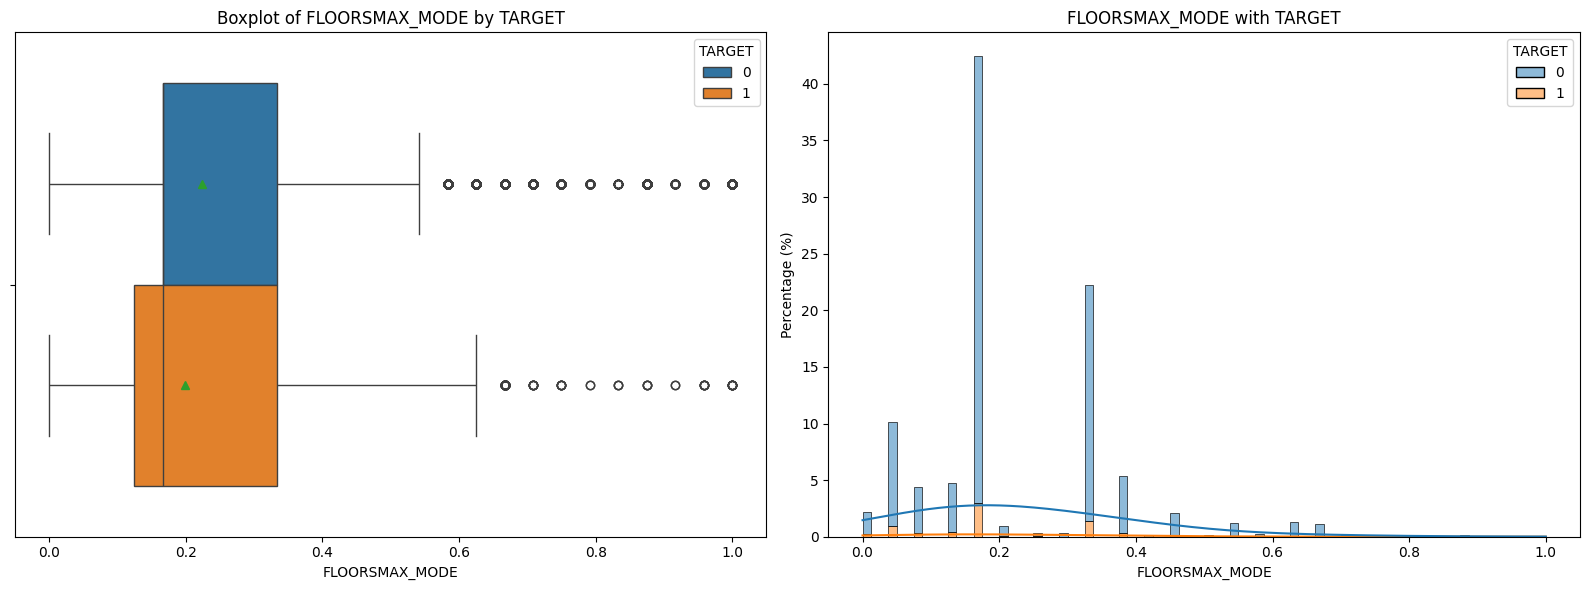

In [99]:
explore_numerical('FLOORSMAX_MODE', is_missing, train)

It seems that the three versions of this variable (_AVG, _MODE, and _MEDI) have essentially the same distributions. These variables all have about half of their content missing, and a more narrow range for non-defaulters. 

#### Summary: 

From these initial observations, a typical Home Credit customer: 
- Is aged between 30 and 55, has gender female, is married with no children, does not own a car, does own realty, and completed secondary (special) school. 
- Often lives in a house or apartment. 
- Generally has been working for 5-10 years with employment as a labourer, in sales, or as core staff in business, the public sector, or are self employed. 
- Has permanent, work, and contact addresses are generally in the same city.
- 50% of Home Credit customers make between 112 500 and 202 500 CURRENCY per year. They obtain mostly cash loans for 270 000 - 806 500 CURRENCY with annuity ranging often from 25 000- 35 000 CURRENCY. 

These customers in general have no more than 4 enquiries to the Credit Bureau in the year preceding their loan application. Home Credit customers have often changed their phone in the year preceding their loan application, but their ID in the 5-10 years preceding the loan application and registration in the 5-20  years preceding their loan application. 

# Variables together

Now, some of the variables that were indicated to be correlated together from the Spearman and Phi-K correlation can be investigated to visualize their relationships.

Looking at the relationship between gender and occupation type: 

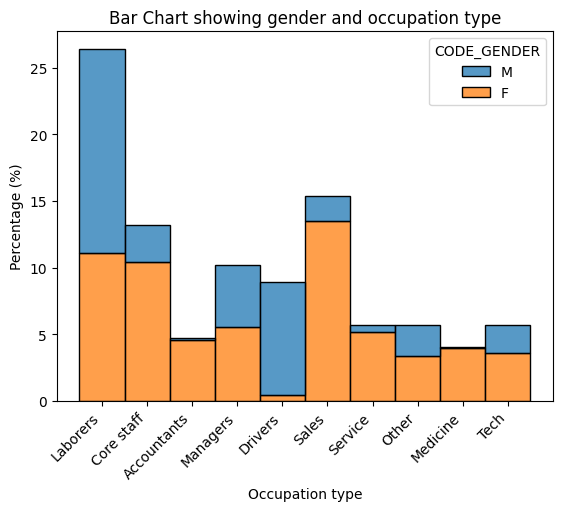

In [100]:
sns.histplot(data=train, hue='CODE_GENDER', x='OCCUPATION_TYPE_GROUPED', multiple='stack', stat='percent', discrete=True).set(title='Bar Chart showing gender and occupation type', xlabel='Occupation type', ylabel='Percentage (%)');
plt.xticks(rotation=45, ha='right');

More women are present in this dataset than men in general. When grouped by occupation type, it is clear that drivers are mostly men, while accountants and those in sales, service, and medicine are mostly females. 

Now, looking at the relationship between age and the external credit score 1: 

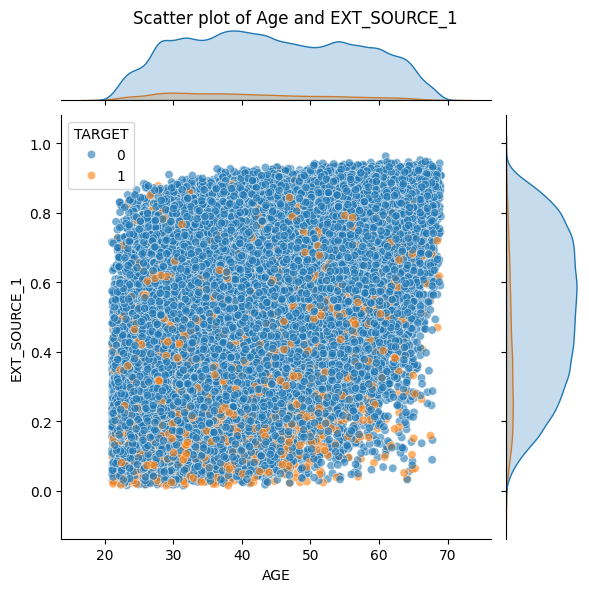

In [101]:
plot = sns.jointplot(data=train, x='AGE', y='EXT_SOURCE_1', hue='TARGET', kind='scatter', alpha=0.6)
plot.figure.suptitle('Scatter plot of Age and EXT_SOURCE_1');
plot.figure.subplots_adjust(top=0.95)

It seems that younger people (less than 50 years old) with lower EXT_SOURCE_1 score also default on their loan more.

Looking at the relationship between age and income type: 

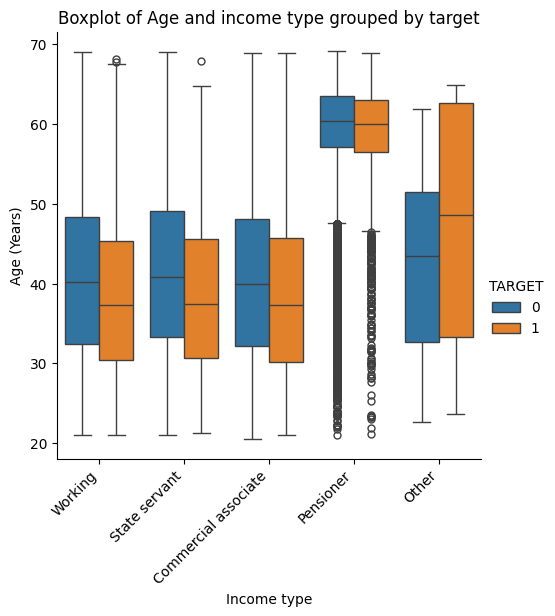

In [102]:
sns.catplot(data=train, x='NAME_INCOME_TYPE_GROUPED', y='AGE', hue='TARGET', kind='box').set(title='Boxplot of Age and income type grouped by target', xlabel='Income type', ylabel='Age (Years)');
plt.xticks(rotation=45, ha='right');

Each income type has lower 25-75% age percentiles for those who have defaulted on their Home Credit loan, except for the 'Other' category, where those of a larger range tend to default more frequently on their loan. Logically, pensioners are older in general. In addition, those with income type 'working', 'state servant', or 'commercial associate' are often aged between 30-45 years old. 



Looking at EXT_SOURCE_1 and YEARS_EMPLOYED gives: 

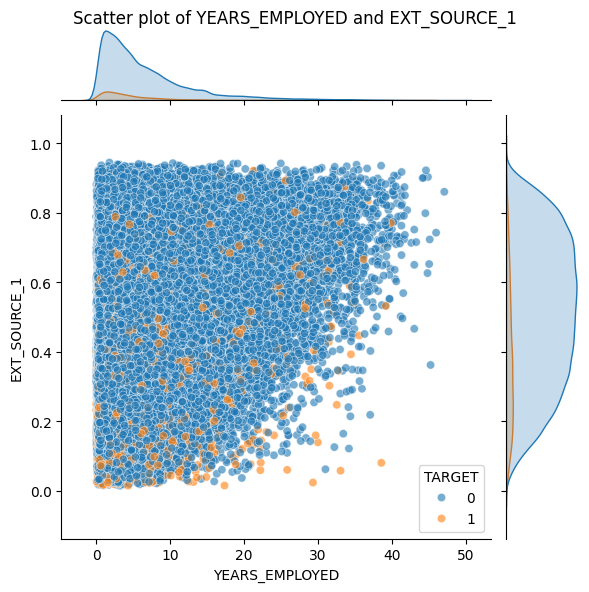

In [103]:
plot = sns.jointplot(data=train, x='YEARS_EMPLOYED', y='EXT_SOURCE_1', hue='TARGET', kind='scatter', alpha=0.6)
plot.figure.suptitle('Scatter plot of YEARS_EMPLOYED and EXT_SOURCE_1');
plot.figure.subplots_adjust(top=0.95)

Ist seems that a similar trend is seen here, where those employed for less time have lower EXT_SOURCE_1 scores, and also tend to default more frequently than those who have higher scores (over 0.5) and have been employed for longer (20 years). 

Now, looking at EXT_SOURCE_1 and FLAG_EMP_PHONE: 

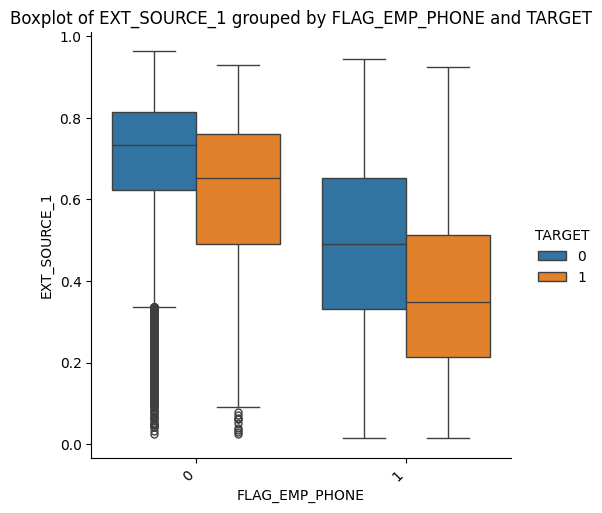

In [104]:
sns.catplot(data=train, x='FLAG_EMP_PHONE', y='EXT_SOURCE_1', hue='TARGET', kind='box').set(title='Boxplot of EXT_SOURCE_1 grouped by FLAG_EMP_PHONE and TARGET', xlabel='FLAG_EMP_PHONE', ylabel='EXT_SOURCE_1');
plt.xticks(rotation=45, ha='right');

Generally, those who provided their work phone have higher EXT_SOURCE_1 scores. This graph agrees with the trend that those with lower EXT_SOURCE_1 scores have higher incidence of defaulting on their loan.

Will a similar trend be seen when EXT_SOURCE_1 is grouped by gender? 

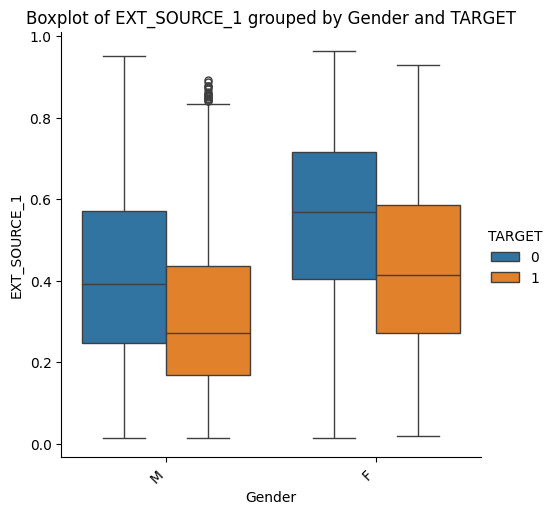

In [105]:
sns.catplot(data=train, x='CODE_GENDER', y='EXT_SOURCE_1', hue='TARGET', kind='box').set(title='Boxplot of EXT_SOURCE_1 grouped by Gender and TARGET', xlabel='Gender', ylabel='EXT_SOURCE_1');
plt.xticks(rotation=45, ha='right');

Lower scores are still seen for customers who defaulted on their loan. Generally, it seems that females have higher EXT_SOURCE_1 scores than males.

Now, looking at length of employment grouped by if a client provided their work phone or not: 

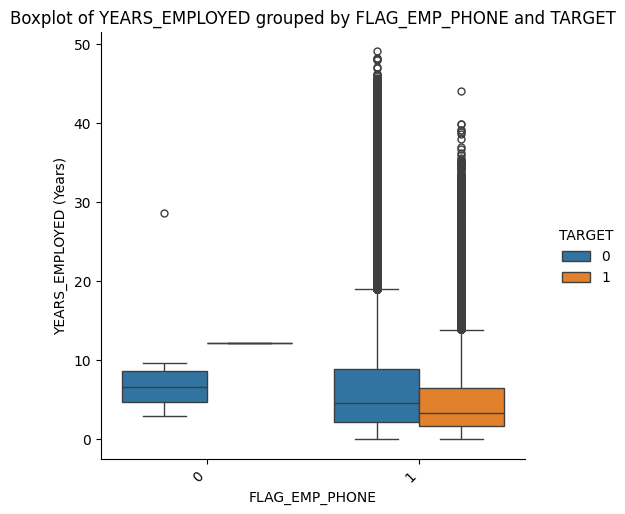

In [106]:
sns.catplot(data=train, x='FLAG_EMP_PHONE', y='YEARS_EMPLOYED', hue='TARGET', kind='box').set(title='Boxplot of YEARS_EMPLOYED grouped by FLAG_EMP_PHONE and TARGET', xlabel='FLAG_EMP_PHONE', ylabel='YEARS_EMPLOYED (Years)');
plt.xticks(rotation=45, ha='right');

Interestingly, all those who defaulted seem to have provided their work phone, and generally seem to have a shorter employment time than those who have not defaulted. 

Looking at a client's employment duration grouped by their organization type: 

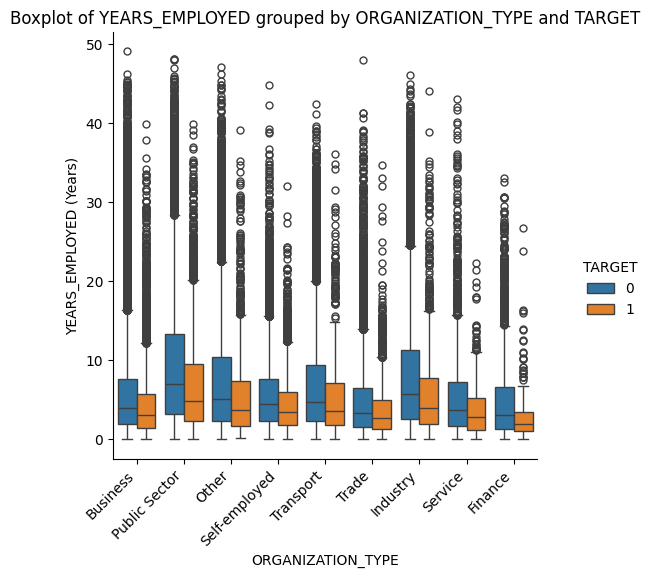

In [107]:
sns.catplot(data=train, x='ORGANIZATION_TYPE_GROUPED', y='YEARS_EMPLOYED', hue='TARGET', kind='box').set(title='Boxplot of YEARS_EMPLOYED grouped by ORGANIZATION_TYPE and TARGET', xlabel='ORGANIZATION_TYPE', ylabel='YEARS_EMPLOYED (Years)');
plt.xticks(rotation=45, ha='right');

In each organization type, customers who have defaulted have generally been employed for shorter amounts of time than those who have not defaulted. All distributions for the length of employment seem right tailed with quite a few outliers.

Now, looking at the AMT_INCOME_TOTAL variable grouped by income type: 

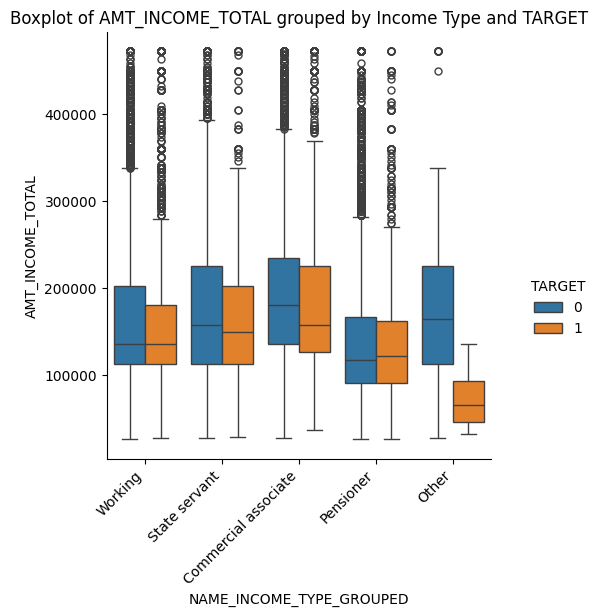

In [108]:
sns.catplot(data=train, x='NAME_INCOME_TYPE_GROUPED', y='AMT_INCOME_TOTAL', hue='TARGET', kind='box').set(title='Boxplot of AMT_INCOME_TOTAL grouped by Income Type and TARGET', xlabel='NAME_INCOME_TYPE_GROUPED', ylabel='AMT_INCOME_TOTAL');
plt.xticks(rotation=45, ha='right');

Customers with income type working, state servant, and commercial associate have similar salaries (around 100 000- 200 000 of their currency per month). Again, those who have defaulted on a loan seem to earn a little less than those who have not defaulted on a loan. This is especally seen in the 'Other' category, and less in the 'Pensioner' category. 

## Summary: 



From visualizing some relationships between variables, it can be said that: 

- More women are present in this dataset than men in general. When grouped by occupation type, it is clear that drivers are mostly men, while accountants and those in sales, service, and medicine are mostly females. 

- Older customers (over 50 years old) with higher EXT_SOURCE_1 score (over about 0.65) are less likely to default on their loan. Similarly, a higher concentration of defaulters is seen with a low EXT_SOURCE_1 score (less than 0.2) and less than 20 years employed. More customers in general that have been employed for longer (over 20 years) also generally have higher EXT_SOURCE_1 scores. 

- Those with income types as working, state servant, or commercial associate are often aged between 30-45 years old, while pensioners are often over 55 years old. Generally, younger customers seem to have a higher chance of defaulting in each income type except for ‘other’. 

- Those who provided their work phone have generally higher EXT_SOURCE_1 scores, which is true for those who identify as a female. In general, it is seen that those with lower EXT_SOURCE_1 scores have higher incidence of defaulting on their loan. 

- Those who did not provide their work phone did not default on their loan. 

- It is commonly seen that those who have shorter employment times per organization type tend to default more on their loan. Additionally, those with smaller total incomes have a slightly higher incidence of defaulting on a loan when grouped by income type. Pensioners earn a little less than those working, state, servants, commercial associates, or other income types that did not default on a loan. 


# Statistical Inference

Before implementing machine learning models, some statistical tests are performed to examine the relationship of variables in the dataset with the stroke variable, or to examine any prominent relationships between other variables in this dataset. The features tested are the ones previously selected and examined one by one (top_features).

Here, the **target population** is the population of Home Credit's customers.

# Selecting features for Statistical Inference: 

Out of the features examined in the first section (in the top_features list), these must be separated into ordinal, categorical, and numerical features to properly perform the correct statistical inference techniques on each feature subset. 

In [109]:
top_numerical = train[top_features].select_dtypes(include=['float64']).columns.to_list()
top_numerical

['EXT_SOURCE_1',
 'DAYS_REGISTRATION',
 'FLOORSMAX_MODE',
 'OWN_CAR_AGE',
 'FLOORSMAX_MEDI',
 'DAYS_LAST_PHONE_CHANGE',
 'FLOORSMAX_AVG',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'CNT_FAM_MEMBERS',
 'AMT_INCOME_TOTAL',
 'DAYS_EMPLOYED',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

The CNT_FAM_MEMBERS and AMT_REQ_CREDIT_BUREAU_YEAR features in this list is actually ordinal features.

In [110]:
top_categorical = train[top_features].select_dtypes(include=['object']).columns.to_list()
top_categorical

['CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY']

These are all categorical features.

In [111]:
top_integer = train[top_features].select_dtypes(include=['int64']).columns
top_integer

Index(['LIVE_CITY_NOT_WORK_CITY', 'DAYS_BIRTH', 'FLAG_DOCUMENT_3',
       'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'DAYS_ID_PUBLISH',
       'REG_CITY_NOT_WORK_CITY', 'TARGET', 'CNT_CHILDREN',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')

These features will be either categorical, numerical, or ordinal, and will be accordingly separated: 

In [112]:
top_ordinal = []

In [113]:
for col in top_integer:
    if len(train[col].value_counts()) < 4:
        print('Categorical feature:', col)
        print(f"Unique values: {train[col].unique()}")
        top_categorical.append(col)
    elif len(train[col].value_counts()) < 25: 
        print('Ordinal feature:', col)
        top_ordinal.append(col)
    else:
        print('Numerical feature:', col)
        top_numerical.append(col)


        

Categorical feature: LIVE_CITY_NOT_WORK_CITY
Unique values: [0 1]
Numerical feature: DAYS_BIRTH
Categorical feature: FLAG_DOCUMENT_3
Unique values: [1 0]
Categorical feature: FLAG_EMP_PHONE
Unique values: [1 0]
Categorical feature: REG_CITY_NOT_LIVE_CITY
Unique values: [0 1]
Numerical feature: DAYS_ID_PUBLISH
Categorical feature: REG_CITY_NOT_WORK_CITY
Unique values: [0 1]
Categorical feature: TARGET
Unique values: [1 0]
Ordinal feature: CNT_CHILDREN
Categorical feature: REGION_RATING_CLIENT
Unique values: [2 1 3]
Categorical feature: REGION_RATING_CLIENT_W_CITY
Unique values: [2 1 3]


Adding the additional variables to the top_ordinal list: 

In [114]:
top_ordinal += ['CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_YEAR']
top_ordinal

['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Removing the ordinal features from the top_numerical list: 

In [115]:
top_numerical = [x for x in top_numerical if x not in top_ordinal]
top_numerical

['EXT_SOURCE_1',
 'DAYS_REGISTRATION',
 'FLOORSMAX_MODE',
 'OWN_CAR_AGE',
 'FLOORSMAX_MEDI',
 'DAYS_LAST_PHONE_CHANGE',
 'FLOORSMAX_AVG',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'AMT_INCOME_TOTAL',
 'DAYS_EMPLOYED',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH']

For the purpose of statistical testing, the transformed YEARS variable will be used instead of the DAYS version for ease of understanding: 

In [116]:
top_numerical = ['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'YEARS_REGISTRATION',
 'FLOORSMAX_MODE',
 'YEARS_LAST_PHONE_CHANGE',
 'FLOORSMAX_MEDI',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'AMT_INCOME_TOTAL',
 'YEARS_EMPLOYED',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'YEARS_ID_PUBLISH',
 'AGE']

Now, all features are properly sorted. 

# Numerical variables

Numerical variables (Age, EXT_SOURCE_*, ...) will first be examined for normality using a QQ plot, and then with a Kolmogoriv-Smirnov test. Then, these will be compared with the stroke variable using either a student t-test or a Mann-Whitney U test, in the case of non-normal data. For all tests, a 95% confidence interval will be used. 


For the purpose of statistical testing, missing values will be simply imputed with the median of each group: 

In [117]:
train[top_numerical] = train[top_numerical].fillna(train[top_numerical].median())
train[top_ordinal] = train[top_ordinal].fillna(train[top_ordinal].median())

## Normality tests for the distributions: 
- QQ Plot
- Shapiro-Wilk or Kolmogoriv-Smirnov


Starting with numerical variables, and checking for normality for the age and group variables with a QQ plot: 

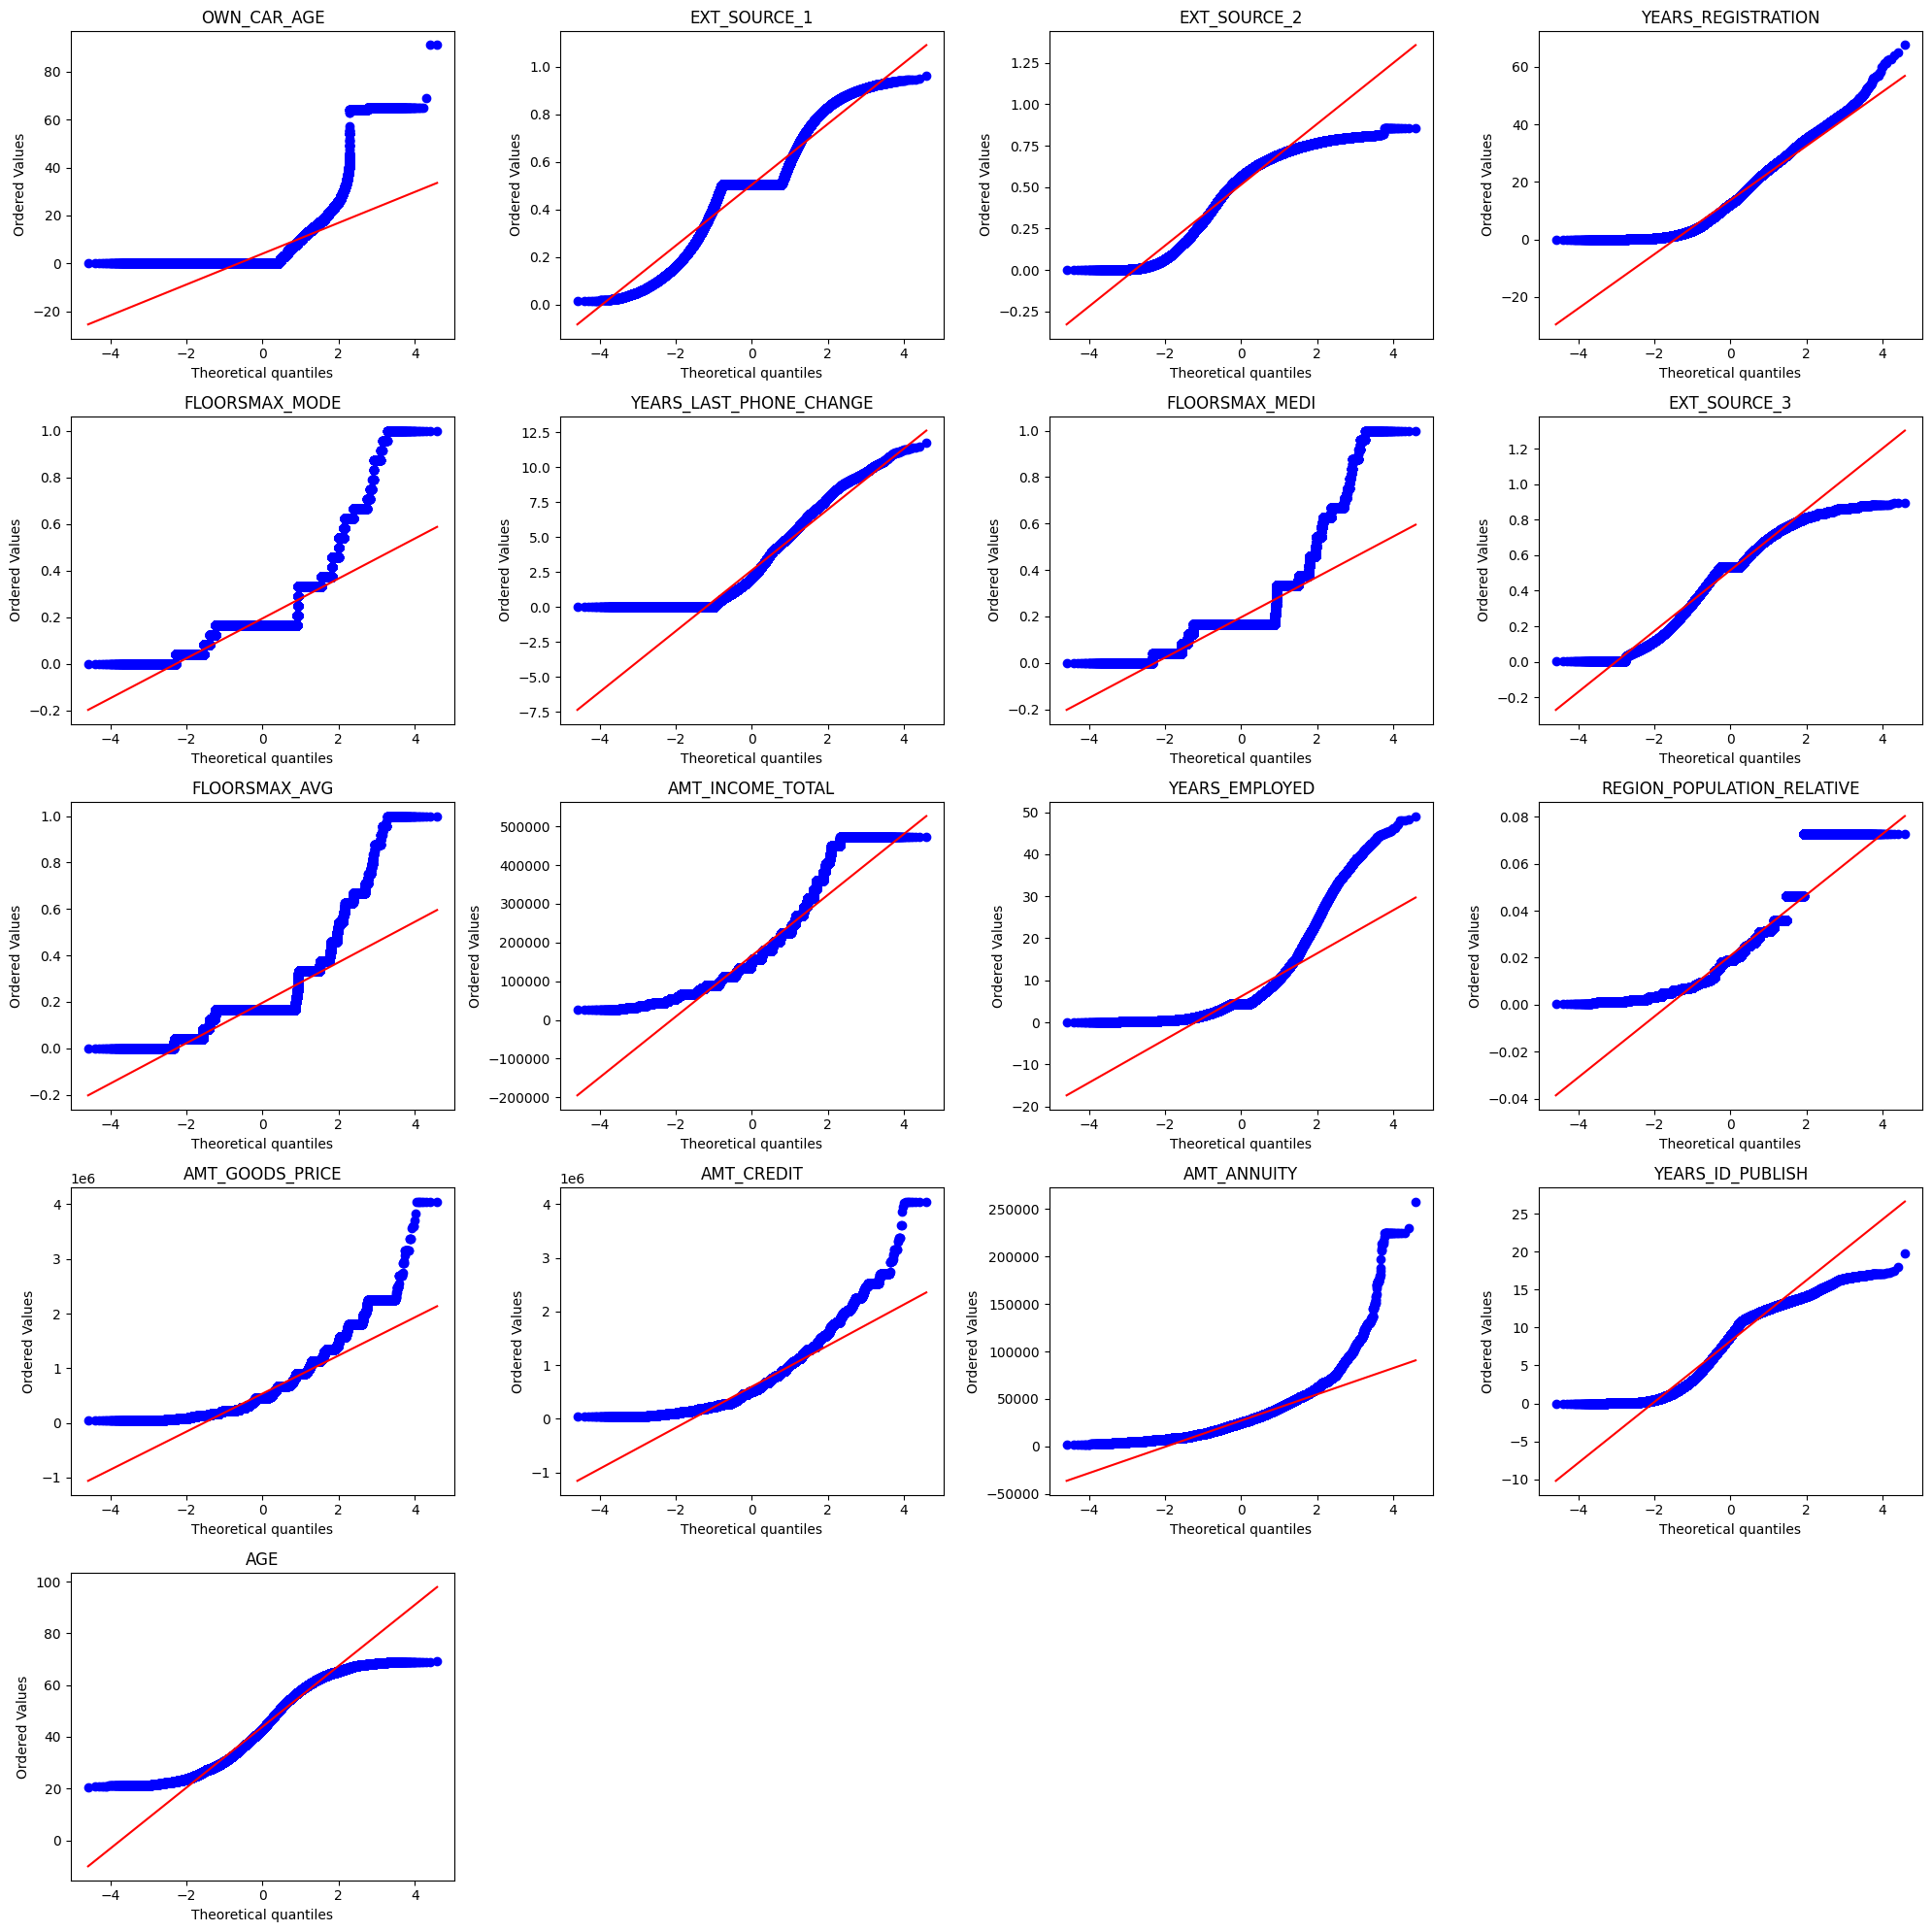

In [118]:
plot_multiple_qq(top_numerical, train)


As seen in these plots, none of these raw variables seem to follow a completely normal distribution. The DAYS_REGISTRATION or DAYS_BIRTH variables seem to be almost normally distributed in the middle, but leave the normality line at the tails of their distributions. The non-normality of these variables can be further corroborated with a Kolmogorov-Smirnov test for normality, as this dataset is larger than 50 samples (otherwise the Shapiro-Wilk test could be used). 

In this case, the **null hypothesis** (H0) is that the distribution is normally distributed. 

The **alternative hypothesis** (Ha) is that the distribution does not follow a normal distribution. 

This will be done at the 95% confidence level. 

In [119]:
alpha = 0.05
for f in top_numerical: 
    print(f)
    stat, p = kstest(train[f'{f}'], 'norm')
    print(f"Kolmogorov-Smirnov Test for Age: p-value = {p}")
    if p < alpha:
        print(f"Reject the null hypothesis; the distribution for {f} is not normally distributed.")
        print()
    else: 
        print(f"Fail to reject the null hypothesis; there is no evidence against normality for the {f} variable.")
        print()


OWN_CAR_AGE
Kolmogorov-Smirnov Test for Age: p-value = 0.0
Reject the null hypothesis; the distribution for OWN_CAR_AGE is not normally distributed.

EXT_SOURCE_1
Kolmogorov-Smirnov Test for Age: p-value = 0.0
Reject the null hypothesis; the distribution for EXT_SOURCE_1 is not normally distributed.

EXT_SOURCE_2
Kolmogorov-Smirnov Test for Age: p-value = 0.0
Reject the null hypothesis; the distribution for EXT_SOURCE_2 is not normally distributed.

YEARS_REGISTRATION
Kolmogorov-Smirnov Test for Age: p-value = 0.0
Reject the null hypothesis; the distribution for YEARS_REGISTRATION is not normally distributed.

FLOORSMAX_MODE
Kolmogorov-Smirnov Test for Age: p-value = 0.0
Reject the null hypothesis; the distribution for FLOORSMAX_MODE is not normally distributed.

YEARS_LAST_PHONE_CHANGE
Kolmogorov-Smirnov Test for Age: p-value = 0.0
Reject the null hypothesis; the distribution for YEARS_LAST_PHONE_CHANGE is not normally distributed.

FLOORSMAX_MEDI
Kolmogorov-Smirnov Test for Age: p-va

According to the Kolmogorov-Smirnov tests, none of these variables have normal distributions. Therefore, Mann-Whitney U tests will be used to see if the relationship with a variable and the TARGET is statistically significant.

## Mann-Whitney U test: 

As seen in the QQ plot, the numerical variables cannot be said to have normal distributions. Therefore, a Mann-Whitney U test will be performed to test significance with the TARGET variable, as the samples are assumed to be independent. 

For the Mann-Whitney U test, the hypotheses are: 

**Null hypothesis (H0)**: there is no relationship between the numerical variable and whether the client has defaulted or not (the people who have defaulted have the same distribution as those who have not). 

**Alternative hypothesis (Ha)**: there is a statistically significant difference between the distribution for the people who have defaulted and the distribution for the people who have not. 

In [120]:
for f in top_numerical:
    print(f)
    lower_bound, upper_bound = mann_whitney_test(train, 'TARGET', f'{f}')
    print()


OWN_CAR_AGE
U-statistic: 3595348004.5
P-value: 1.4514632138795127e-14
Reject the null hypothesis - There is a relationship between 'TARGET' and 'OWN_CAR_AGE'.
95% Confidence Interval for Mann-Whitney U statistic: (3573430484.12, 3615590380.21)

EXT_SOURCE_1
U-statistic: 4084119594.5
P-value: 0.0
Reject the null hypothesis - There is a relationship between 'TARGET' and 'EXT_SOURCE_1'.
95% Confidence Interval for Mann-Whitney U statistic: (4062710329.96, 4107160386.74)

EXT_SOURCE_2
U-statistic: 4602996113.5
P-value: 0.0
Reject the null hypothesis - There is a relationship between 'TARGET' and 'EXT_SOURCE_2'.
95% Confidence Interval for Mann-Whitney U statistic: (4575830658.93, 4628050699.24)

YEARS_REGISTRATION
U-statistic: 3807567984.0
P-value: 6.304065912692225e-110
Reject the null hypothesis - There is a relationship between 'TARGET' and 'YEARS_REGISTRATION'.
95% Confidence Interval for Mann-Whitney U statistic: (3782174381.93, 3834596733.66)

FLOORSMAX_MODE
U-statistic: 3721138665.0

In this case, a relationship is seen all variables and the target. Therefore, this test can be repeated with alternative='greater' to see if the sample of people who have not defaulted on their loans tend towards larger values than those who have. 

Now, the **null hypothesis (H0)** is that the distribution of the numerical variable for people who have not defaulted is less than or equal than the numerical value for people who have defaulted. 

The **alternative hypothesis (Ha)** is that the numerical variable distribution for people who have not defaulted tends towards higher values than the numerical value for people who have defaulted. 

In [121]:
for f in top_numerical:
    print(f)
    lower_bound, upper_bound = mann_whitney_alt_greater(train, 'TARGET', f'{f}')
    print()


OWN_CAR_AGE
U-statistic: 3595348004.5
P-value: 7.257316069397564e-15
Reject the null hypothesis - group 1 tends toward larger values than group 0 in the distribution of the variable.
95% Confidence Interval for Mann-Whitney U statistic: (3573532774.68, 3617777384.66)

EXT_SOURCE_1
U-statistic: 4084119594.5
P-value: 0.0
Reject the null hypothesis - group 1 tends toward larger values than group 0 in the distribution of the variable.
95% Confidence Interval for Mann-Whitney U statistic: (4060802771.61, 4107962200.64)

EXT_SOURCE_2
U-statistic: 4602996113.5
P-value: 0.0
Reject the null hypothesis - group 1 tends toward larger values than group 0 in the distribution of the variable.
95% Confidence Interval for Mann-Whitney U statistic: (4578245644.20, 4627843966.93)

YEARS_REGISTRATION
U-statistic: 3807567984.0
P-value: 3.1520329563461124e-110
Reject the null hypothesis - group 1 tends toward larger values than group 0 in the distribution of the variable.
95% Confidence Interval for Mann-Wh

Here, it seems that the sample of people who have not defaulted for all numerical variables except for AMT_ANNUITY is generally smaller than those who have not defaulted, which agrees with observations in the Spearman correlation matrix and in the variable exploration section.  In each case, the fact that the 95% confidence interval is quite large indicates that the results from the Mann-Whitney U test are reliable, as this is a measure of the frequency of one group having higher values than the other.

## Kolmogorov-Smirnov test

To corroborate these findings, another Kolmogorov-Smirnov (KS) test can be used to compare the defaulting and non-defaulting distributions of the numerical variables. The same null and alternative hypotheses are used as for the Mann-Whitney U test, and these tests are done at the 95% confidence level. 

The KS statistic represents the maximum vertical distance between the cumulative distribution functions for a numerical variable. A larger KS statistic means that the difference between two distributions is greater. 

In [122]:
alpha = 0.05
for f in top_numerical:
    print(f)
    stat, p_value = ks_2samp(train[train['TARGET'] == 0][f'{f}'],
         train[train['TARGET'] == 1][f'{f}'])
    print(f"KS-statistic: {stat}")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print(
            f"Reject the null hypothesis - There is a relationship between {f} and TARGET. \n"
        )
    else:
        print(
            f"Fail to reject the null hypothesis - There is no relationship between {f} and TARGET \n"
        )


OWN_CAR_AGE
KS-statistic: 0.03687434919285537
P-value: 2.13818691963906e-27
Reject the null hypothesis - There is a relationship between OWN_CAR_AGE and TARGET. 

EXT_SOURCE_1
KS-statistic: 0.11022331404554853
P-value: 6.238362972095246e-242
Reject the null hypothesis - There is a relationship between EXT_SOURCE_1 and TARGET. 

EXT_SOURCE_2
KS-statistic: 0.2232901822489069
P-value: 0.0
Reject the null hypothesis - There is a relationship between EXT_SOURCE_2 and TARGET. 

YEARS_REGISTRATION
KS-statistic: 0.06743683929330524
P-value: 1.110888817490321e-90
Reject the null hypothesis - There is a relationship between YEARS_REGISTRATION and TARGET. 

FLOORSMAX_MODE
KS-statistic: 0.05728739852264131
P-value: 1.529526259320009e-65
Reject the null hypothesis - There is a relationship between FLOORSMAX_MODE and TARGET. 

YEARS_LAST_PHONE_CHANGE
KS-statistic: 0.09679908158251083
P-value: 1.4191687590660701e-186
Reject the null hypothesis - There is a relationship between YEARS_LAST_PHONE_CHANGE

Again, each of these variables seems to have a relationship with the TARGET variable. These differences can be visualized with a cumulative distribution plot: 

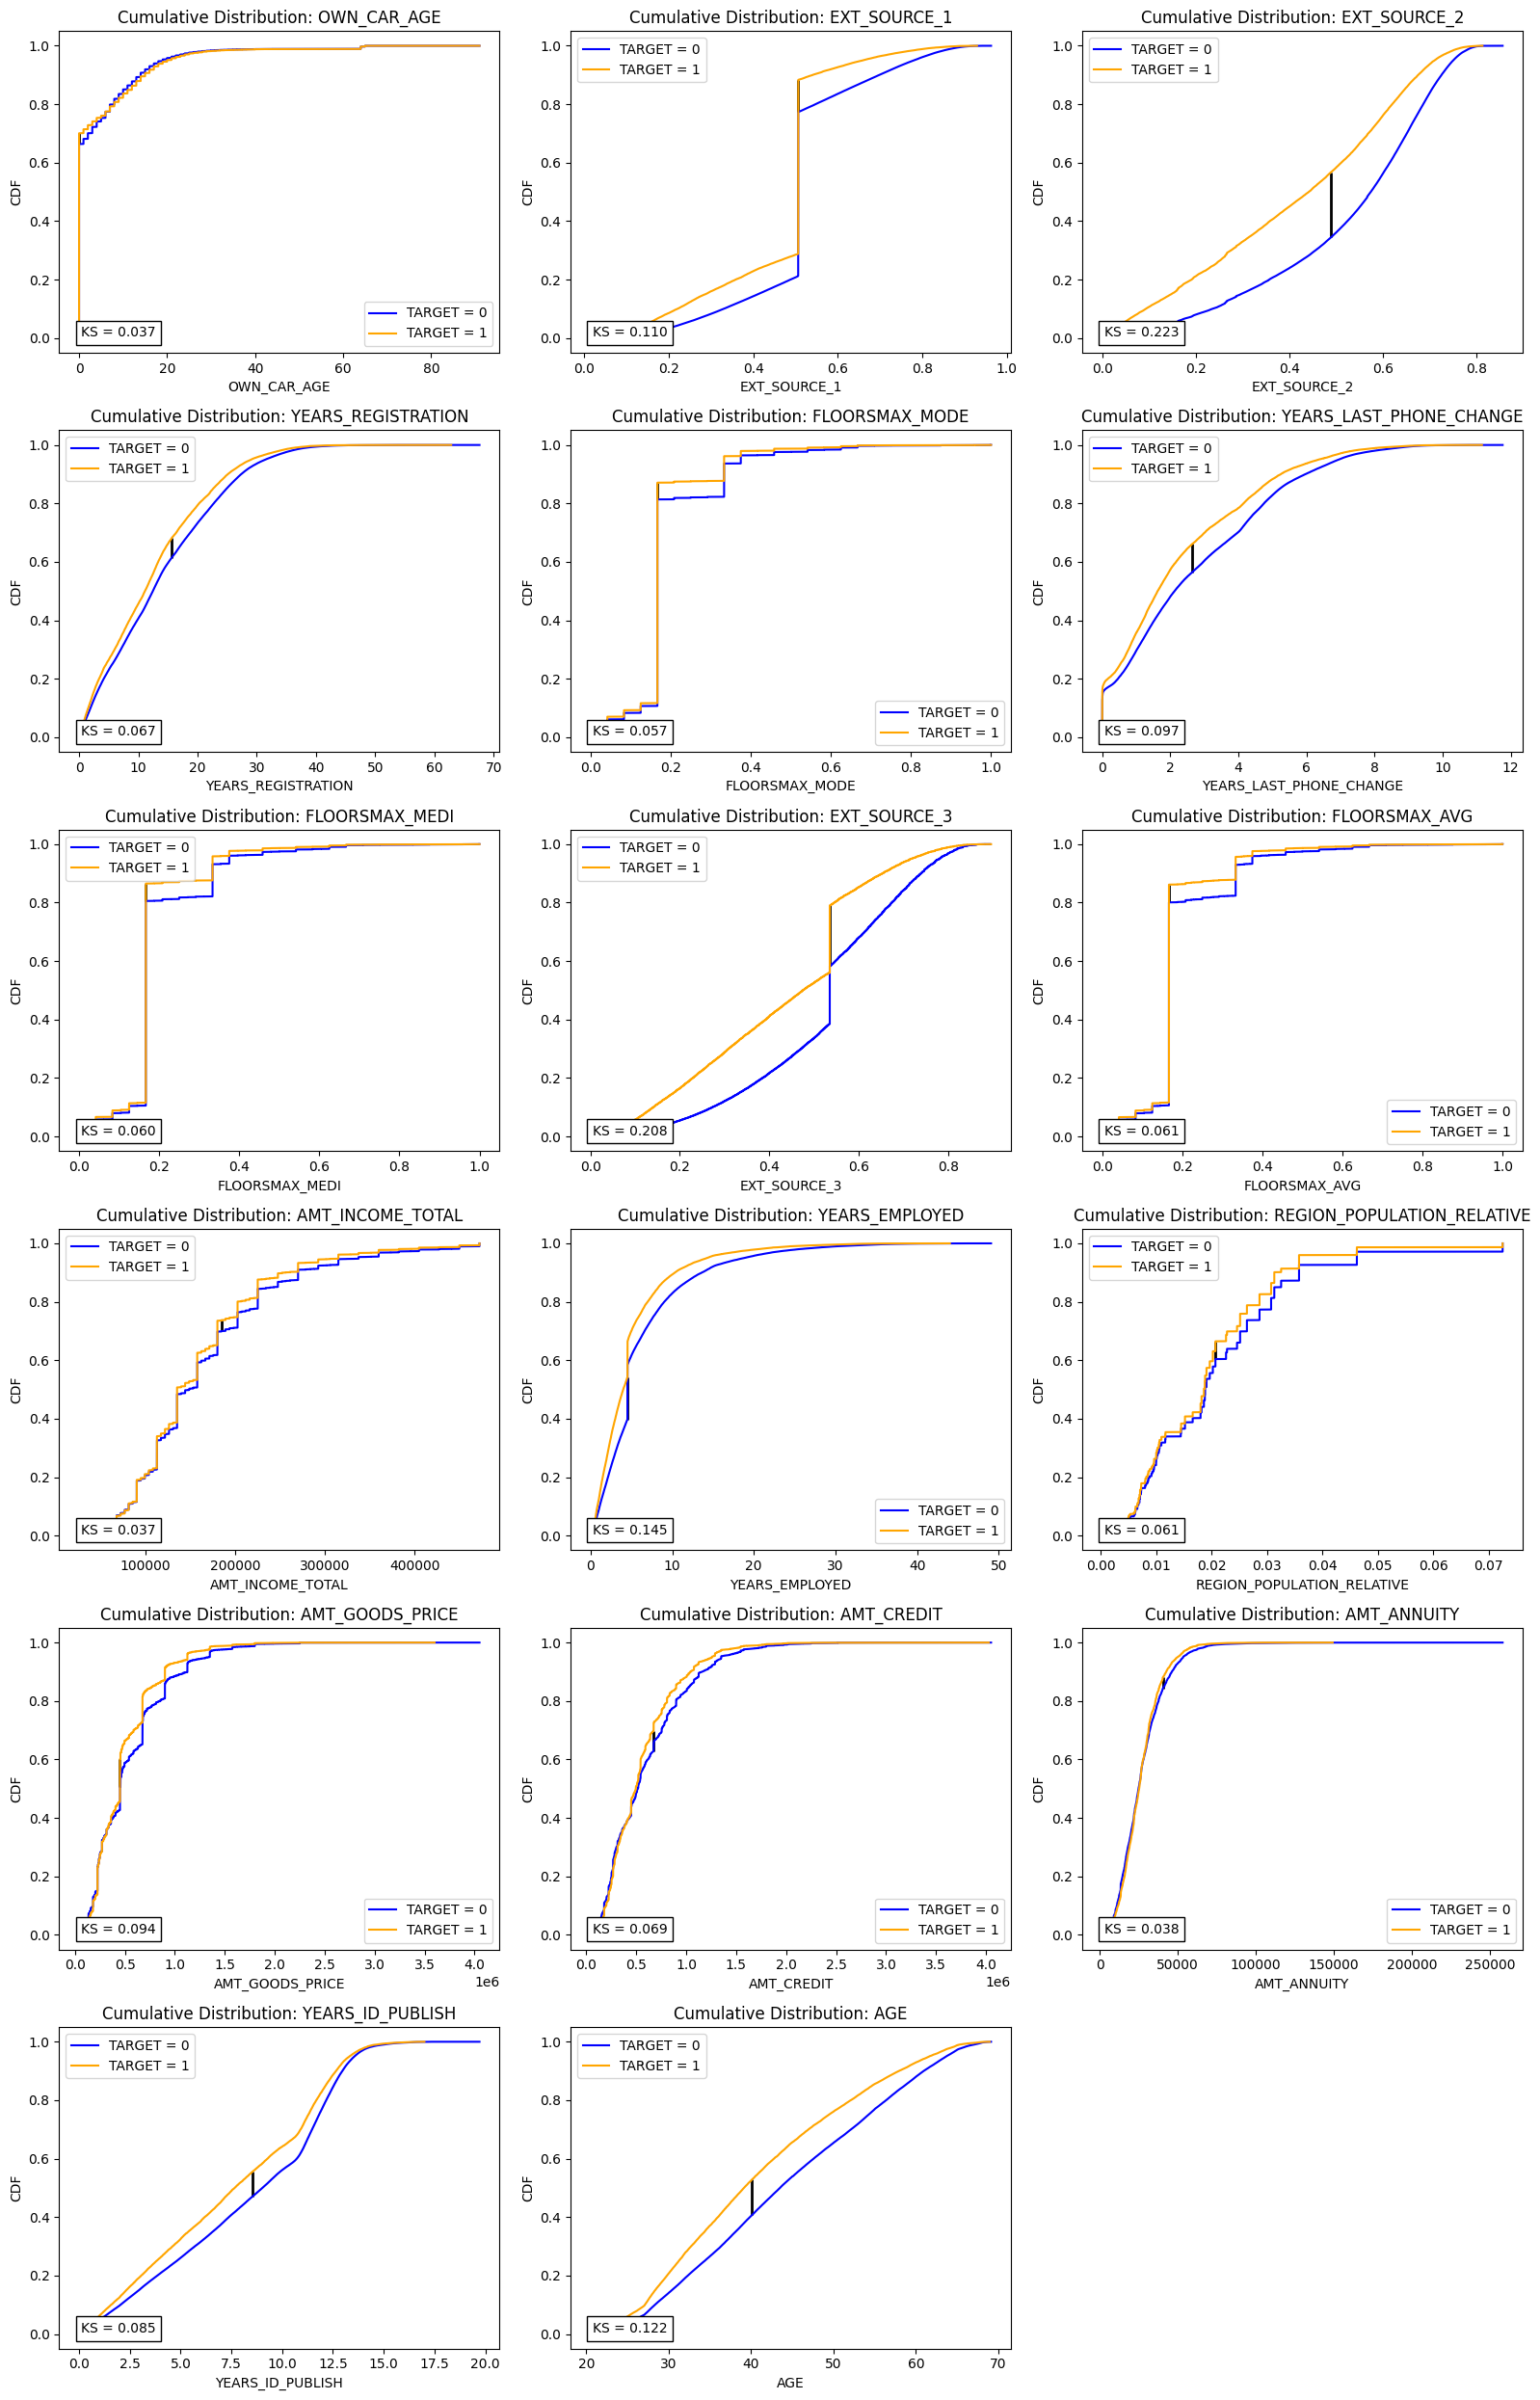

In [123]:
features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AGE']
fig, axes = plt.subplots(6, 3, figsize=(16, 25))

for i, feature in enumerate(top_numerical):
    plot_cdf_by_target(train, feature, ax=axes.flat[i])

axes.flat[-1].axis('off')
plt.tight_layout()
plt.show()


From examining these distribution plots, the distribution for defaulters is consistently higher on the graph than the distribution for non-defaulters. This in an indication that the defaulting group generally has lower values in each numerical variable than the non-defaulting group. For example, in the EXT_SOURCE_* variables, the cumulative distribution curve for defaulters is higher than the one for non-defaulters, which is an indication that more non-defaulters have higher scores that defaulters. The maximum separation for the EXT_SOURCE_2 and _3 variables is each around 0.2, which is one of the highest KS statistics found here. 

Now, the KS test can be performed again with alternative='greater' to see if the distributions for non-defaulters is smaller than that of defaulters. 

Now, the **null hypothesis (H0)** is that the distribution of the numerical variable for people who have defaulted is the same as the distribution for people who have not defaulted. 

The **alternative hypothesis (Ha)** is that the cumulative density function for those who have not defaulted is larger than the cumulative density function for those have have defaulted for some value x. 

In [124]:
alpha = 0.05
for f in top_numerical:
    print(f)
    stat, p_value = ks_2samp(train[train['TARGET'] == 0][f'{f}'],
         train[train['TARGET'] == 1][f'{f}'], alternative='greater')
    print(f"KS-statistic: {stat}")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print(
            f"Reject the null hypothesis - There is a relationship between {f} and TARGET. Non-defaulters tend to have lower CDF than defaulters. \n"
        )
    else:
        print(
            f"Fail to reject the null hypothesis - There is no evidence that non-defaulters tend towards lower CDF than defaulters. \n"
        )


OWN_CAR_AGE
KS-statistic: 0.015520263787464406
P-value: 1.6613119059811152e-05
Reject the null hypothesis - There is a relationship between OWN_CAR_AGE and TARGET. Non-defaulters tend to have lower CDF than defaulters. 

EXT_SOURCE_1
KS-statistic: 3.537493897823026e-06
P-value: 0.9999968801350517
Fail to reject the null hypothesis - There is no evidence that non-defaulters tend towards lower CDF than defaulters. 

EXT_SOURCE_2
KS-statistic: 7.074987795646052e-06
P-value: 0.9999926179767923
Fail to reject the null hypothesis - There is no evidence that non-defaulters tend towards lower CDF than defaulters. 

YEARS_REGISTRATION
KS-statistic: 2.9669492123240992e-05
P-value: 0.9999384479246134
Fail to reject the null hypothesis - There is no evidence that non-defaulters tend towards lower CDF than defaulters. 

FLOORSMAX_MODE
KS-statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis - There is no evidence that non-defaulters tend towards lower CDF than defaulters. 

YEARS_LAST_PHON

AMT_ANNUITY is the only variable where non-defaulters tend to have lower values than defaulters. The same test can be repeated with alternative='less' to see if non-defaulters generally have higher values than defaulters. 

Now, the **null hypothesis (H0)** is that the distribution of the numerical variable for people who have defaulted is the same as the distribution for people who have not defaulted. 

The **alternative hypothesis (Ha)** is that the cumulative density function for those who have not defaulted is smaller than the cumulative density function for those have have defaulted for some value x. 

In [125]:
alpha = 0.05
for f in top_numerical:
    print(f)
    stat, p_value = ks_2samp(train[train['TARGET'] == 0][f'{f}'],
         train[train['TARGET'] == 1][f'{f}'], alternative='less')
    print(f"KS-statistic: {stat}")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print(
            f"Reject the null hypothesis - There is a relationship between {f} and TARGET. Non-defaulters tend to have lower CDF than defaulters. \n"
        )
    else:
        print(
            f"Fail to reject the null hypothesis - There is no evidence that non-defaulters tend towards lower CDF than defaulters. \n"
        )


OWN_CAR_AGE
KS-statistic: 0.03687434919285537
P-value: 1.086814369321344e-27
Reject the null hypothesis - There is a relationship between OWN_CAR_AGE and TARGET. Non-defaulters tend to have lower CDF than defaulters. 

EXT_SOURCE_1
KS-statistic: 0.11022331404554853
P-value: 1.395182704708876e-241
Reject the null hypothesis - There is a relationship between EXT_SOURCE_1 and TARGET. Non-defaulters tend to have lower CDF than defaulters. 

EXT_SOURCE_2
KS-statistic: 0.2232901822489069
P-value: 0.0
Reject the null hypothesis - There is a relationship between EXT_SOURCE_2 and TARGET. Non-defaulters tend to have lower CDF than defaulters. 

YEARS_REGISTRATION
KS-statistic: 0.06743683929330524
P-value: 6.82186151553665e-91
Reject the null hypothesis - There is a relationship between YEARS_REGISTRATION and TARGET. Non-defaulters tend to have lower CDF than defaulters. 

FLOORSMAX_MODE
KS-statistic: 0.05728739852264131
P-value: 8.49888473431618e-66
Reject the null hypothesis - There is a relati

All other numerical variables examined have been found to have lower cumulative density functions for non-defaulters than for defaulters. This means that non defaulters generally tend towards higher values than defaulters for almost all numerical variables, as higher CDF implies that more of a group has smaller values than the other group. Both the Mann-Whitney U test and the Kolmogorov-Smirnov tests agree with each other.

# Chi squared test for categorical and ordinal variables: 

Categorical variables will be compared with the transported variable using chi-squared tests, as the dataset is large enough to have at lease 5 observations in each category. In this case, the hypotheses are: 

**Null hypothesis (H0)**: there is no relationship between the categorical variable and whether the customer has defaulted or not. 

**Alternative hypothesis (Ha)**: The corresponding alternative hypothesis is that the categorical variable is related to the incidence of a customer defaulting. 

For the purpose of statistical testing, missing values are filled in here: 

In [126]:
for c in top_categorical:
    train[f'{c}'] = train[f'{c}'].fillna('Missing')


Now, chi-squared tests can be applied to these categorical variables: 

In [127]:
for c in top_categorical + top_ordinal:
    print(c)
    chi_squared_test(train, c, 'TARGET')
    print()

CODE_GENDER
Contingency table:
 TARGET            0      1
CODE_GENDER               
F            188278  14170
M             94404  10655
Missing           4      0
Chi-Squared Statistic: 920.7913
P-value: 0.0000
Degrees of Freedom: 2
Reject the null hypothesis - There is a significant relationship between 'CODE_GENDER' and 'TARGET'.

NAME_FAMILY_STATUS
Contingency table:
 TARGET                     0      1
NAME_FAMILY_STATUS                 
Civil marriage         26814   2961
Married               181582  14850
Separated              18150   1620
Single / not married   40987   4457
Unknown                    2      0
Widow                  15151    937
Chi-Squared Statistic: 504.6941
P-value: 0.0000
Degrees of Freedom: 5
Reject the null hypothesis - There is a significant relationship between 'NAME_FAMILY_STATUS' and 'TARGET'.

NAME_INCOME_TYPE
Contingency table:
 TARGET                     0      1
NAME_INCOME_TYPE                   
Businessman               10      0
Commercial

The chi-squared tests show a statistically significant relationship between the TARGET variable and each categorical variable. This test does not show the direction of the relationship. It is possible to re-examine the phi-k correlation coefficients with these categorical and ordinal variables and the target variable to corroborate these relationships: 

In [128]:
pk = phik_overview[['TARGET']]
category_target_phik = pk.loc[pk.index.isin(top_categorical+top_ordinal)].sort_values(by='TARGET', ascending=False)
category_target_phik

TARGET
TARGET                       1.000000
OCCUPATION_TYPE              0.102846
CODE_GENDER                  0.085766
NAME_INCOME_TYPE             0.084831
REG_CITY_NOT_WORK_CITY       0.079946
FLAG_EMP_PHONE               0.072087
ORGANIZATION_TYPE            0.070016
REG_CITY_NOT_LIVE_CITY       0.069588
FLAG_DOCUMENT_3              0.069525
NAME_FAMILY_STATUS           0.056043
LIVE_CITY_NOT_WORK_CITY      0.050956
NAME_EDUCATION_TYPE          0.046954
REGION_RATING_CLIENT_W_CITY  0.036699
REGION_RATING_CLIENT         0.035450
FLAG_OWN_CAR                 0.034179
CNT_CHILDREN                 0.025906
AMT_REQ_CREDIT_BUREAU_YEAR   0.021445
CNT_FAM_MEMBERS              0.016143
FLAG_OWN_REALTY              0.009212

The only variable with phi-k correlation coefficient over 0.1 is OCCUPATION_TYPE. Therefore, while weak statistical relationships may be present with these categorical and ordinal variables and with the TARGET, it is possible that their importance is low overall. 

The spearman correlation coefficient can also be reviewed for ordinal variables: 

In [129]:
sp = spearman_corr[['TARGET']]
ord_spearman = sp.loc[sp.index.isin(top_ordinal)].sort_values(by='TARGET', ascending=False)
ord_spearman

TARGET
CNT_CHILDREN                0.020074
AMT_REQ_CREDIT_BUREAU_YEAR  0.019461
CNT_FAM_MEMBERS             0.007006

All the ordinal variables have a very weak positive correlation with the target variable. 

# Variance Inflation Factor

Finally, the variance inflation factor (VIF) is checked with the ordinal and numerical subset features to further examine potential multicollinearity. Initially, this gives: 

In [130]:
train[top_ordinal + top_numerical].dtypes.value_counts()

float64    19
int64       1
Name: count, dtype: int64

In [131]:
evaluate_vif(train[top_ordinal+top_numerical])

feature         VIF multicollinearity_warning_strength
0                  OWN_CAR_AGE    1.226452                              small
1   AMT_REQ_CREDIT_BUREAU_YEAR    2.072014                              small
2               YEARS_EMPLOYED    2.260553                              small
3      YEARS_LAST_PHONE_CHANGE    2.552477                              small
4           YEARS_REGISTRATION    3.439633                              small
5   REGION_POPULATION_RELATIVE    3.749145                              small
6             YEARS_ID_PUBLISH    5.441959                           moderate
7                 CNT_CHILDREN    5.607865                           moderate
8             AMT_INCOME_TOTAL    6.866658                           moderate
9                 EXT_SOURCE_2    9.039992                           moderate
10                EXT_SOURCE_3    9.488690                           moderate
11                 AMT_ANNUITY   12.257494                             severe
12                EXT_SOURCE_1   15.672173                             severe
13                         AGE   20.621104                             severe
14             CNT_FAM_MEMBERS   22.537069                             severe
15             AMT_GOODS_PRICE  121.487874                             severe
16                  AMT_CREDIT  122.760441                             severe
17              FLOORSMAX_MODE  201.860758                             severe
18               FLOORSMAX_AVG  806.580539                             severe
19              FLOORSMAX_MEDI  971.850235                             severe

One by one, variables are removed until all VIF levels are under 5. This results in: 

In [132]:
v = train[top_ordinal+top_numerical].drop(['FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'AMT_CREDIT', 'CNT_FAM_MEMBERS', 'AGE', 'AMT_ANNUITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_INCOME_TOTAL'], axis=1)
evaluate_vif(v)

feature       VIF multicollinearity_warning_strength
0                 OWN_CAR_AGE  1.196935                              small
1                CNT_CHILDREN  1.330447                              small
2  AMT_REQ_CREDIT_BUREAU_YEAR  1.938246                              small
3              YEARS_EMPLOYED  2.129153                              small
4     YEARS_LAST_PHONE_CHANGE  2.412562                              small
5          YEARS_REGISTRATION  2.877902                              small
6             AMT_GOODS_PRICE  2.954856                              small
7  REGION_POPULATION_RELATIVE  3.376974                              small
8              FLOORSMAX_MODE  4.072344                              small
9            YEARS_ID_PUBLISH  4.117980                              small

Using these variables, a logistic regression model could be used. However, this would likely not give a very good model, as some variables that showed multicollinearity also had some of the strongest correlations with the target variable (for example, the EXT_SOURCE_* variables). Calculating the variance inflation factor can be repeated later, if a logistic regression model is used.